# Dataset divided with ['Is Attack IP'] == True | ['Is Account Takeover'] == True | ['Login Successful'] == False

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

safe = pd.read_csv('divided-chunks/3096534_safe_dataset.csv', dtype={"Login Timestamp": object, "User ID": float, "IP Address": object, "Country": object, "ASN": float, "Browser Name and Version": object, "OS Name and Version": object, "Device Type": object, "Login Successfull": bool, "Is Attack IP": bool, "Is Account Takeover": bool})
susp = pd.read_csv('divided-chunks/suspicious_dataset_3m.csv', low_memory=False)

In [2]:
safe['Login Timestamp'] =  pd.to_datetime(safe['Login Timestamp'], infer_datetime_format=True)
susp['Login Timestamp'] =  pd.to_datetime(susp['Login Timestamp'], infer_datetime_format=True)
susp.dropna(axis = 0, how = 'all', inplace = True)
safe.dropna(axis = 0, how = 'all', inplace = True)

In [3]:
susp['IP Address'] = susp['IP Address'].apply(lambda x: str(x))
# susp["IP Address"] = susp["IP Address"].apply(lambda x: x.split("."))
safe['IP Address'] = safe['IP Address'].apply(lambda x: str(x))
# safe["IP Address"] = safe["IP Address"].apply(lambda x: x.split("."))

In [4]:
susp = susp.reset_index(drop=True)
safe = safe.reset_index(drop=True)

In [5]:
susp[susp.isna().any(axis=1)].count

<bound method DataFrame.count of               ASN Browser Name and Version Country Device Type  \
3331     137308.0          134 Browser 1.0      ID         NaN   
18071    137308.0          134 Browser 1.0      ID         NaN   
24814    137308.0          134 Browser 1.0      ID         NaN   
29269    137308.0          134 Browser 1.0      ID         NaN   
29848    393398.0          134 Browser 1.0      US         NaN   
...           ...                      ...     ...         ...   
3049346   24521.0          134 Browser 1.0      ID         NaN   
3054103  398986.0          134 Browser 1.0      US         NaN   
3058057  393398.0          134 Browser 1.0      US         NaN   
3072558   24521.0          134 Browser 1.0      ID         NaN   
3085431   24521.0          134 Browser 1.0      ID         NaN   

              IP Address Is Account Takeover Is Attack IP Login Successful  \
3331      103.108.187.47               False         True            False   
18071     103.108.

In [6]:
safe[safe.isna().any(axis=1)].count

<bound method DataFrame.count of                 Login Timestamp       User ID      IP Address Country  \
12062   2020-04-22 17:32:16.256 -4.324476e+18   170.39.78.117      US   
16945   2020-06-25 00:30:53.856 -4.324476e+18  23.137.225.204      US   
44975   2021-02-02 03:55:55.213 -4.324476e+18  185.112.224.98      DK   
45154   2020-12-06 10:33:56.092 -4.324476e+18   46.254.120.61      DE   
84621   2020-10-18 13:29:39.817 -4.324476e+18    170.39.77.11      US   
...                         ...           ...             ...     ...   
2946972 2020-07-01 16:27:41.949 -4.324476e+18     91.200.44.0      RU   
2956874 2020-03-18 15:01:40.283 -4.324476e+18    152.93.30.73      NO   
2965495 2020-07-01 17:45:49.284 -4.324476e+18    10.4.128.230      ID   
2968845 2020-05-16 21:55:14.176 -4.324476e+18      10.3.82.21      HU   
2994978 2020-07-09 01:02:45.421 -4.324476e+18    10.4.129.199      BE   

              ASN Browser Name and Version OS Name and Version Device Type  \
12062    393

In [7]:
searchfor = ['CN', 'VN', 'RU', 'BR', 'US', 'IN', 'IR', 'ID', 'KR', 'TW', 'FR', 'UA']
safe["Blacklisted"] = np.where(safe["Country"].str.contains('|'.join(searchfor)), True, False)
safe.head()

Login Timestamp       User ID       IP Address Country       ASN  \
0 2020-05-07 15:44:17.514  4.082766e+18   92.220.144.172      NO   29695.0   
1 2021-01-12 15:32:20.734 -3.387022e+18      170.39.78.9      US  393398.0   
2 2020-03-17 09:08:19.990 -8.464135e+18  158.248.195.127      NO   29695.0   
3 2020-08-17 01:33:03.445 -4.324476e+18     8.39.144.119      AU   55256.0   
4 2020-03-29 11:56:02.314  8.134007e+18   51.174.219.108      NO   29695.0   

  Browser Name and Version OS Name and Version Device Type  Login Successful  \
0      Firefox 20.0.0.1604            iOS 13.4      mobile              True   
1      Iron 66.0.3450.1084          iOS 11.2.6      mobile             False   
2         Chrome 73.0.3654    Mac OS X 10.14.6     desktop              True   
3      Firefox Mobile 84.0         Android 4.1      mobile             False   
4      Firefox 20.0.0.1673            iOS 13.4      mobile              True   

   Is Attack IP  Is Account Takeover  Blacklisted  
0         False                False        False  
1         False                False         True  
2         False                False        False  
3         False                False        False  
4         False                False        False

In [8]:
susp["Blacklisted"] = np.where(susp["Country"].str.contains('|'.join(searchfor)), True, False)
susp.head()

ASN         Browser Name and Version Country Device Type  \
0  398986.0  Chrome Mobile WebView 85.0.4183      US      mobile   
1  393398.0  Chrome Mobile WebView 85.0.4183      US      mobile   
2  393398.0          Chrome Mobile 51.0.2704      US      mobile   
3  393398.0          Chrome Mobile 84.0.4147      US      mobile   
4  266433.0           Chrome 69.0.3497.17.19      BR     desktop   

        IP Address Is Account Takeover Is Attack IP Login Successful  \
0        10.0.0.47               False         True            False   
1  209.236.123.126               False         True            False   
2    38.135.39.102               False         True            False   
3  209.236.117.198               False         True             True   
4     170.82.7.240               False         True            False   

          Login Timestamp OS Name and Version       User ID  Blacklisted  
0 2020-02-03 12:43:59.396         Android 2.2 -4.618854e+18         True  
1 2020-02-03 12:44:05.160         Android 4.1 -4.324476e+18         True  
2 2020-02-03 12:44:40.204         Android 4.1  9.133471e+18         True  
3 2020-02-03 12:45:13.655   Windows Phone 8.1 -3.522289e+18         True  
4 2020-02-03 12:45:16.478    Mac OS X 10.14.6 -6.623218e+18         True

In [9]:
cleanup_devices = {"Device Type": {"tablet": "T", "mobile": "M", "desktop": "D", "bot": "B", "unknown": "U", np.nan: "NAN"}}
safe = safe.replace(cleanup_devices)
safe.head()

Login Timestamp       User ID       IP Address Country       ASN  \
0 2020-05-07 15:44:17.514  4.082766e+18   92.220.144.172      NO   29695.0   
1 2021-01-12 15:32:20.734 -3.387022e+18      170.39.78.9      US  393398.0   
2 2020-03-17 09:08:19.990 -8.464135e+18  158.248.195.127      NO   29695.0   
3 2020-08-17 01:33:03.445 -4.324476e+18     8.39.144.119      AU   55256.0   
4 2020-03-29 11:56:02.314  8.134007e+18   51.174.219.108      NO   29695.0   

  Browser Name and Version OS Name and Version Device Type  Login Successful  \
0      Firefox 20.0.0.1604            iOS 13.4           M              True   
1      Iron 66.0.3450.1084          iOS 11.2.6           M             False   
2         Chrome 73.0.3654    Mac OS X 10.14.6           D              True   
3      Firefox Mobile 84.0         Android 4.1           M             False   
4      Firefox 20.0.0.1673            iOS 13.4           M              True   

   Is Attack IP  Is Account Takeover  Blacklisted  
0         False                False        False  
1         False                False         True  
2         False                False        False  
3         False                False        False  
4         False                False        False

In [10]:
susp = susp.replace(cleanup_devices)
susp.head()

ASN         Browser Name and Version Country Device Type  \
0  398986.0  Chrome Mobile WebView 85.0.4183      US           M   
1  393398.0  Chrome Mobile WebView 85.0.4183      US           M   
2  393398.0          Chrome Mobile 51.0.2704      US           M   
3  393398.0          Chrome Mobile 84.0.4147      US           M   
4  266433.0           Chrome 69.0.3497.17.19      BR           D   

        IP Address Is Account Takeover Is Attack IP Login Successful  \
0        10.0.0.47               False         True            False   
1  209.236.123.126               False         True            False   
2    38.135.39.102               False         True            False   
3  209.236.117.198               False         True             True   
4     170.82.7.240               False         True            False   

          Login Timestamp OS Name and Version       User ID  Blacklisted  
0 2020-02-03 12:43:59.396         Android 2.2 -4.618854e+18         True  
1 2020-02-03 12:44:05.160         Android 4.1 -4.324476e+18         True  
2 2020-02-03 12:44:40.204         Android 4.1  9.133471e+18         True  
3 2020-02-03 12:45:13.655   Windows Phone 8.1 -3.522289e+18         True  
4 2020-02-03 12:45:16.478    Mac OS X 10.14.6 -6.623218e+18         True

In [11]:
safe["Browser Type"] = (np.where(safe["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(safe["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
safe = safe.replace(cleanup_browser)
safe.head()

Login Timestamp       User ID       IP Address Country       ASN  \
0 2020-05-07 15:44:17.514  4.082766e+18   92.220.144.172      NO   29695.0   
1 2021-01-12 15:32:20.734 -3.387022e+18      170.39.78.9      US  393398.0   
2 2020-03-17 09:08:19.990 -8.464135e+18  158.248.195.127      NO   29695.0   
3 2020-08-17 01:33:03.445 -4.324476e+18     8.39.144.119      AU   55256.0   
4 2020-03-29 11:56:02.314  8.134007e+18   51.174.219.108      NO   29695.0   

  Browser Name and Version OS Name and Version Device Type  Login Successful  \
0      Firefox 20.0.0.1604            iOS 13.4           M              True   
1      Iron 66.0.3450.1084          iOS 11.2.6           M             False   
2         Chrome 73.0.3654    Mac OS X 10.14.6           D              True   
3      Firefox Mobile 84.0         Android 4.1           M             False   
4      Firefox 20.0.0.1673            iOS 13.4           M              True   

   Is Attack IP  Is Account Takeover  Blacklisted Browser Type  
0         False                False        False            F  
1         False                False         True            O  
2         False                False        False            C  
3         False                False        False            F  
4         False                False        False            F

In [12]:
susp["Browser Type"] = (np.where(susp["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(susp["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
susp = susp.replace(cleanup_browser)
susp.tail()

ASN         Browser Name and Version Country Device Type  \
3097036  500035.0                      Linkbot 1.0      ID           B   
3097037  208653.0     Chrome Mobile 81.0.4044.1947      DE           M   
3097038   22612.0             Chrome 72.0.3626.116      ID           D   
3097039  393398.0     Chrome Mobile 81.0.4044.1933      US           M   
3097040  197175.0  Chrome Mobile WebView 43.0.2357      CA           M   

              IP Address Is Account Takeover Is Attack IP Login Successful  \
3097036      10.0.37.160               False         True            False   
3097037    5.183.138.218               False         True            False   
3097038  199.188.207.122               False         True            False   
3097039  209.236.125.108               False         True            False   
3097040      10.0.16.204               False         True            False   

                Login Timestamp OS Name and Version       User ID  \
3097036 2021-02-28 23:57:00.409              Other  -4.324476e+18   
3097037 2021-02-28 23:57:20.002         Android 4.1 -4.324476e+18   
3097038 2021-02-28 23:58:04.017    Mac OS X 10.14.6 -4.324476e+18   
3097039 2021-02-28 23:58:44.011            iOS 13.4 -4.324476e+18   
3097040 2021-02-28 23:59:22.608          iOS 12.4.6 -4.324476e+18   

         Blacklisted Browser Type  
3097036         True            O  
3097037        False            C  
3097038         True            C  
3097039         True            C  
3097040        False            C

**Preparing dataset is done.**

### ATO 10/500

In [13]:
# random sample for ML part with 10/500 ato
s = susp.loc[susp['Is Account Takeover'] == True]
df = pd.concat([susp.tail(300), safe.head(190), s.head(10)], ignore_index=True, sort=False)
# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)

In [14]:
df.to_csv('new_modified_sample_dataset500.csv', encoding='utf-8', index=False)

In [15]:
df1 = df.copy()
df1.drop("OS Name and Version", inplace=True, axis=1)
df1.drop("Browser Name and Version", inplace=True, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ASN                  500 non-null    float64       
 1   Country              500 non-null    object        
 2   Device Type          500 non-null    object        
 3   IP Address           500 non-null    object        
 4   Is Account Takeover  500 non-null    object        
 5   Is Attack IP         500 non-null    object        
 6   Login Successful     500 non-null    object        
 7   Login Timestamp      500 non-null    datetime64[ns]
 8   User ID              500 non-null    float64       
 9   Blacklisted          500 non-null    bool          
 10  Browser Type         500 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(7)
memory usage: 39.7+ KB


In [16]:
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  500 non-null    float64 
 1   Country              500 non-null    category
 2   Device Type          500 non-null    category
 3   IP Address           500 non-null    category
 4   Is Account Takeover  500 non-null    bool    
 5   Is Attack IP         500 non-null    bool    
 6   Login Successful     500 non-null    bool    
 7   Login Timestamp      500 non-null    category
 8   User ID              500 non-null    float64 
 9   Blacklisted          500 non-null    bool    
 10  Browser Type         500 non-null    category
dtypes: bool(4), category(5), float64(2)
memory usage: 45.9 KB


In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


## XGB Classifier - EXPERIMENTAL
##### https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  500 non-null    float64 
 1   Country              500 non-null    category
 2   Device Type          500 non-null    category
 3   IP Address           500 non-null    category
 4   Is Attack IP         500 non-null    bool    
 5   Login Successful     500 non-null    bool    
 6   Login Timestamp      500 non-null    category
 7   User ID              500 non-null    float64 
 8   Blacklisted          500 non-null    bool    
 9   Browser Type         500 non-null    category
 10  Is Account Takeover  500 non-null    bool    
dtypes: bool(4), category(5), float64(2)
memory usage: 45.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------     

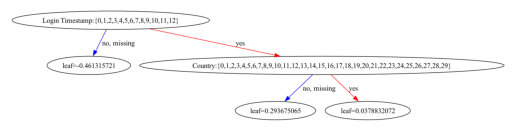

In [19]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]
X.info()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model.json")
# #eval results
# clf.evals_result_
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("./caterogical-model-graph.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
print("Feature importances:")
print(clf.feature_importances_)

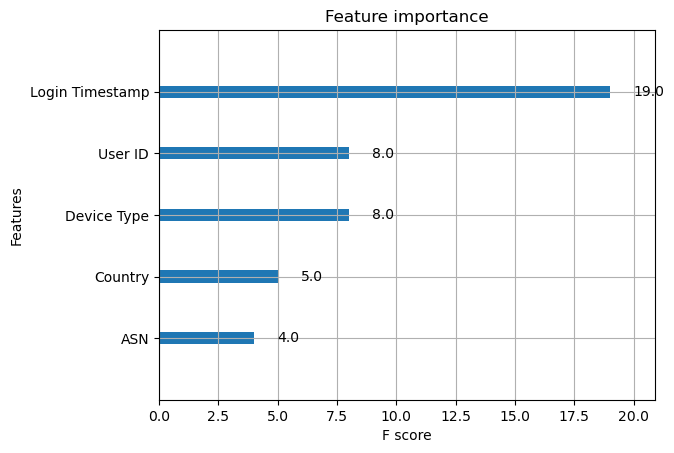

In [20]:
from matplotlib import pyplot
from xgboost import plot_importance

plot_importance(clf)
pyplot.show()

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [21]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  500 non-null    float64
 1   Country              500 non-null    int8   
 2   Device Type          500 non-null    int8   
 3   IP Address           500 non-null    int16  
 4   Is Account Takeover  500 non-null    bool   
 5   Is Attack IP         500 non-null    bool   
 6   Login Successful     500 non-null    bool   
 7   Login Timestamp      500 non-null    int16  
 8   User ID              500 non-null    float64
 9   Blacklisted          500 non-null    bool   
 10  Browser Type         500 non-null    int8   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 13.3 KB


ASN  Country  Device Type  IP Address  Is Account Takeover  \
0   15599.0       33            0          59                False   
1   29492.0       29            3          95                False   
2  208653.0       11            2         247                False   
3   29695.0       29            2         251                False   
4  393398.0       39            2         270                False   

   Is Attack IP  Login Successful  Login Timestamp       User ID  Blacklisted  \
0         False             False              166 -4.324476e+18         True   
1         False              True              199 -7.798963e+18        False   
2          True             False              416 -4.324476e+18        False   
3         False              True               40  8.134007e+18        False   
4          True             False              300 -4.324476e+18         True   

   Browser Type  
0             2  
1             2  
2             0  
3             1  
4             2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 99.39%
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       162
        True       1.00      0.67      0.80         3

    accuracy                           0.99       165
   macro avg 

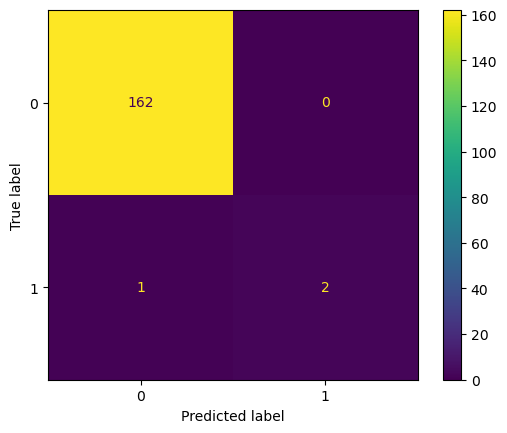

In [22]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
# tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
# print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 400
The number of records in the test dataset is 100
The training dataset has 392 records for the majority class and 8 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        98
        True       0.02      1.00      0.04         2

    accuracy                           0.02       100
   macro avg       0.01      0.50      0.02       100
weighted avg       0.00      0.02      0.00       100

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.98      1.00      0.99        98
        True       0.00      0.00      0.00         2

    accuracy                           0.98       100
   macro avg       0.49      0.50      0.49       100
weighted avg       0.96      0.98      0.97       100

[[ 0 98]
 [ 0  2]]


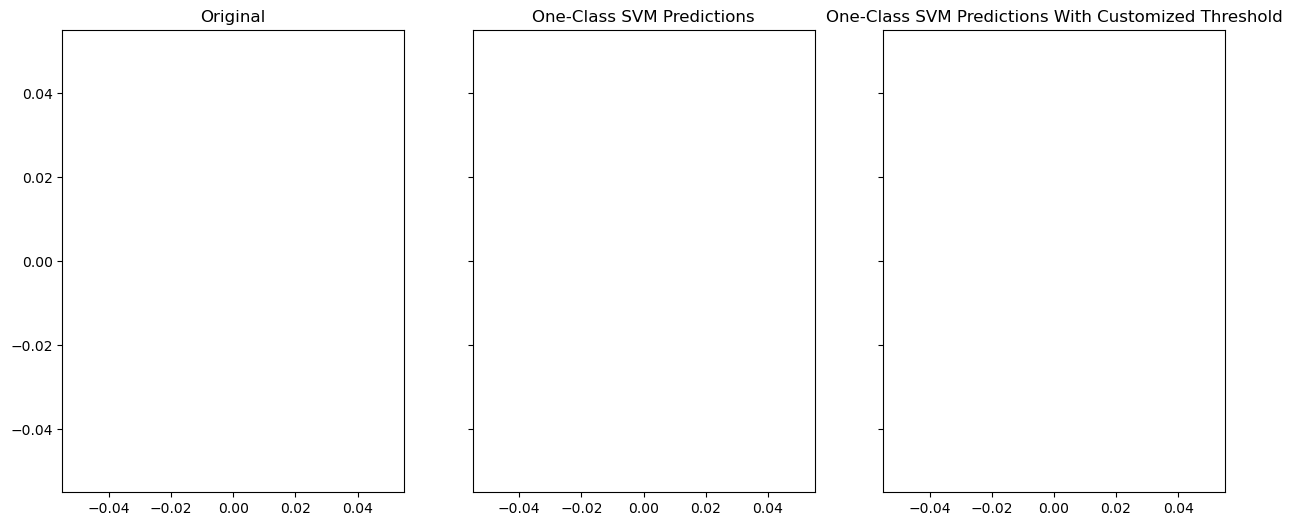

In [23]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 350
The number of records in the test dataset is 150
The training dataset has 342 records for the majority class and 8 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       148
        True       0.01      1.00      0.03         2

    accuracy                           0.01       150
   macro avg       0.01      0.50      0.01       150
weighted avg       0.00      0.01      0.00       150

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       148
        True       0.00      0.00      0.00         2

    accuracy                           0.99       150
   macro avg       0.49      0.50      0.50       150
weighted avg       0.97      0.99      0.98       150

[[  0 148]
 [  0   2]]


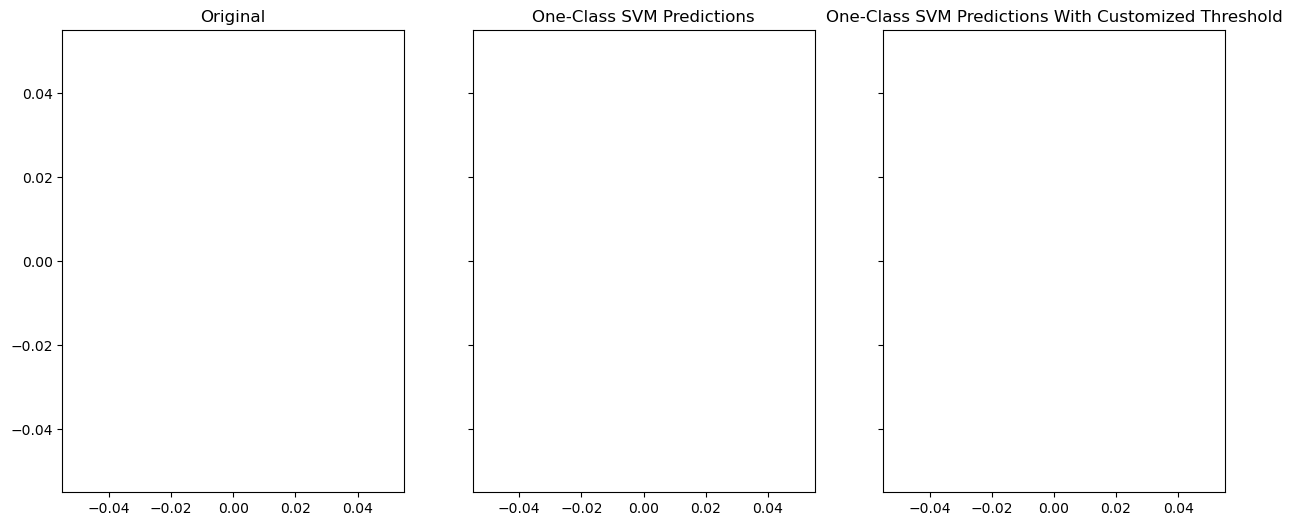

In [24]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Login Timestamp'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 250
The number of records in the test dataset is 250
The training dataset has 243 records for the majority class and 7 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       247
        True       0.01      1.00      0.02         3

    accuracy                           0.01       250
   macro avg       0.01      0.50      0.01       250
weighted avg       0.00      0.01      0.00       250

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       247
        True       0.00      0.00      0.00         3

    accuracy                           0.99       250
   macro avg       0.49      0.50      0.50       250
weighted avg       0.98      0.99      0.98       250

[[  0 247]
 [  0   3]]


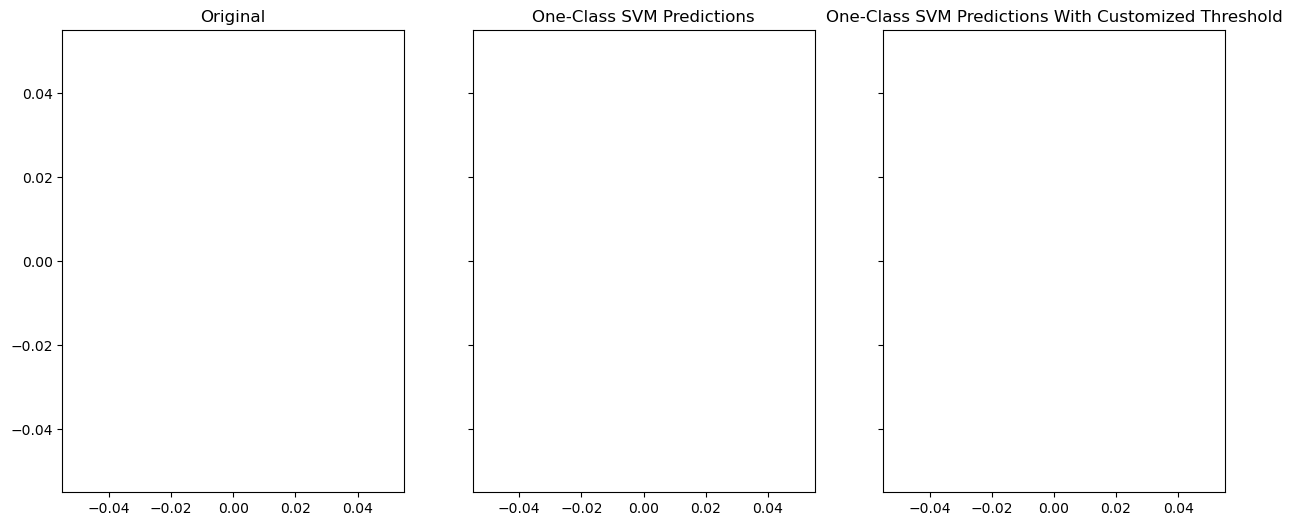

In [25]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Login Timestamp'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Login Timestamp'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

In [26]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Is Attack IP  Blacklisted  anomaly_scores  anomaly  Is Account Takeover
0           False         True        0.000000        1                False
1           False        False        0.043080        1                False
2            True        False        0.050989        1                False
3           False        False        0.043080        1                False
4            True         True        0.056549        1                False
..            ...          ...             ...      ...                  ...
495         False        False        0.043080        1                False
496         False         True        0.000000        1                False
497          True         True        0.056549        1                False
498          True         True        0.056549        1                False
499          True        False        0.050989        1                False

[500 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 10
Number of non anomalous values  490
Total Number of Values: 500


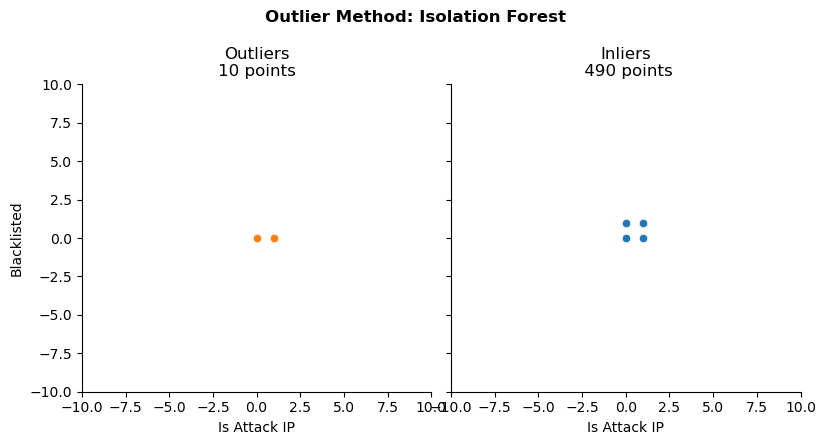

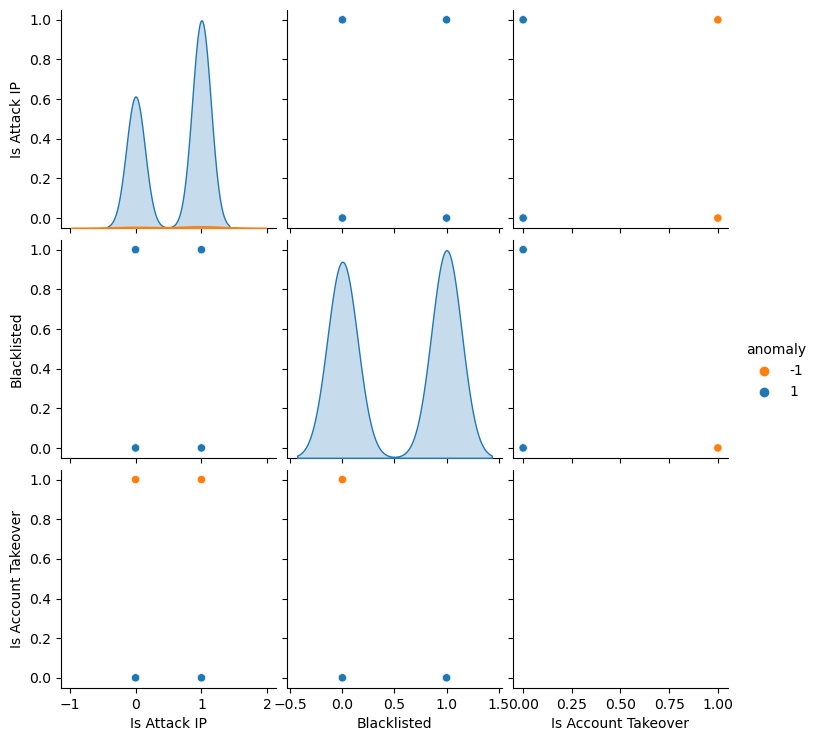

In [27]:
def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 85
Number of non anomalous values  415
Total Number of Values: 500


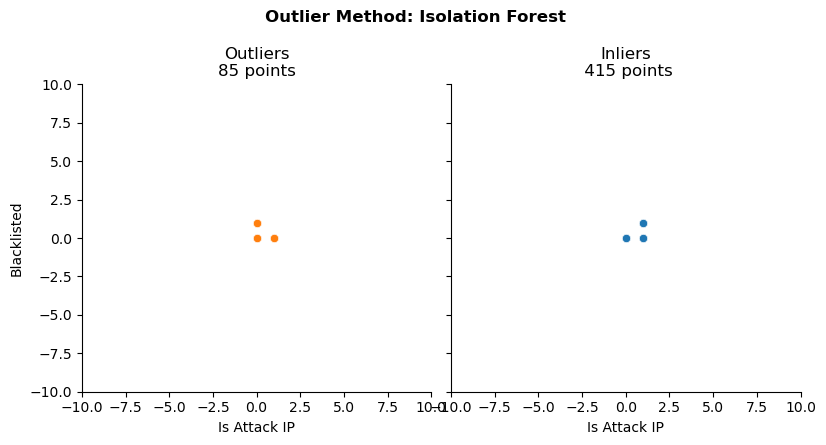

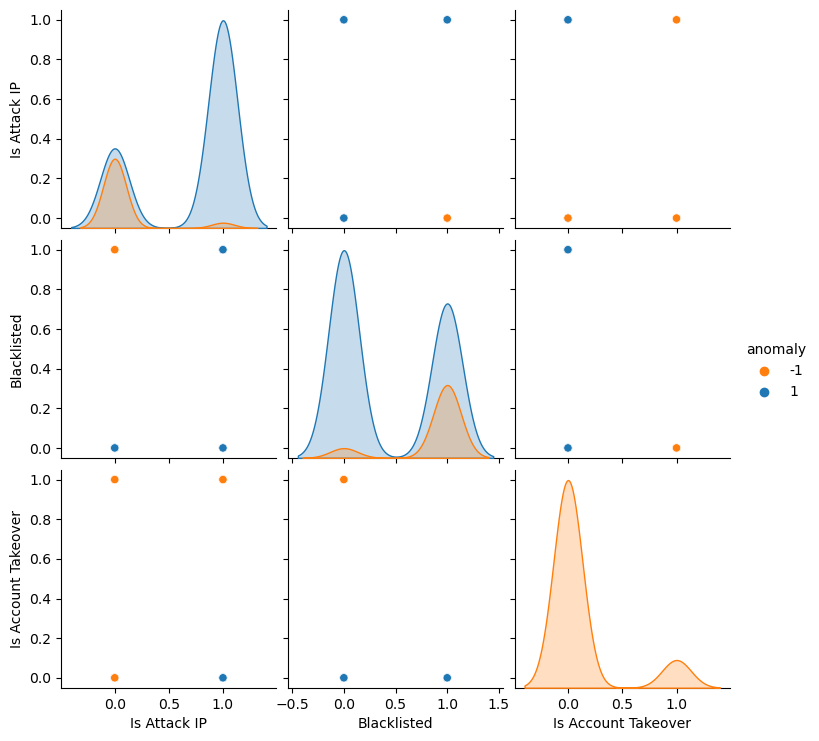

In [28]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 200
Number of non anomalous values  300
Total Number of Values: 500


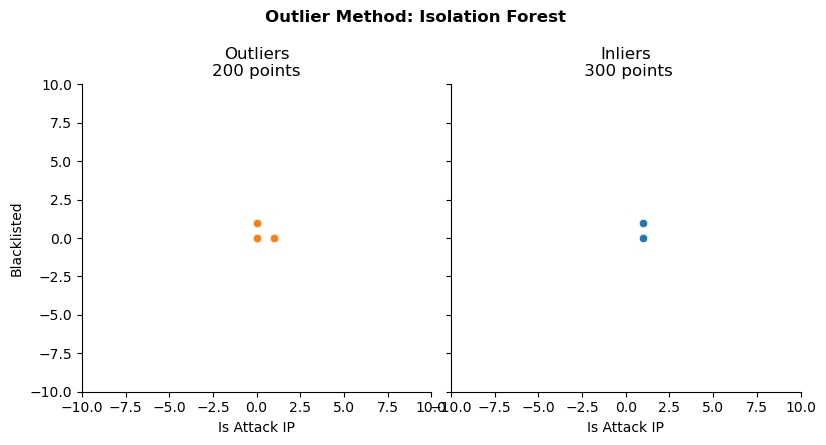

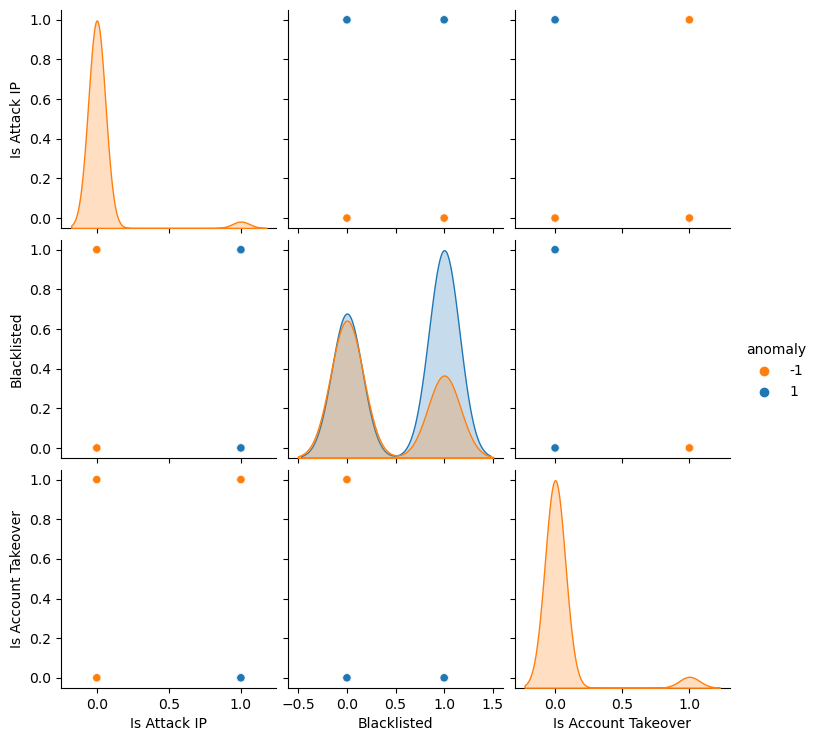

In [29]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [30]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Browser Type', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Browser Type','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Login Successful  Browser Type  anomaly_scores  anomaly  \
0               False             2        0.013713        1   
1                True             2        0.000000        1   
2               False             0        0.131123        1   
3                True             1       -0.095016       -1   
4               False             2        0.013713        1   
..                ...           ...             ...      ...   
495             False             0        0.131123        1   
496              True             2        0.000000        1   
497             False             0        0.131123        1   
498             False             0        0.131123        1   
499             False             2        0.013713        1   

     Is Account Takeover  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
..                   ...  
495                False  
496                False  
497                False  
498                False  
499                False  

[500 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 42
Number of non anomalous values  458
Total Number of Values: 500


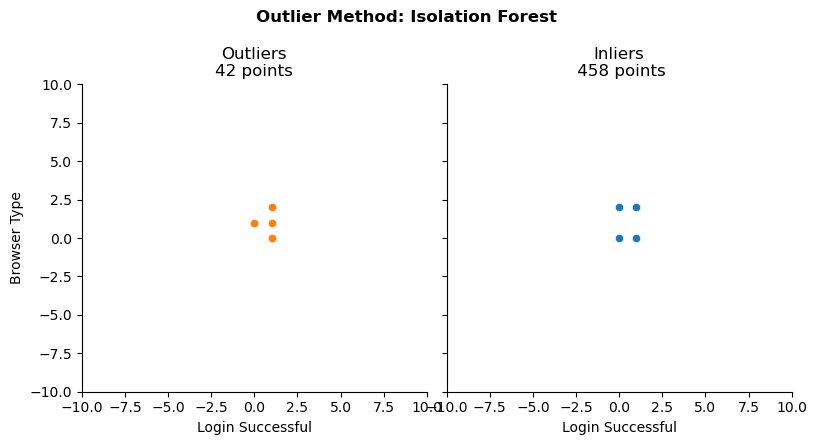

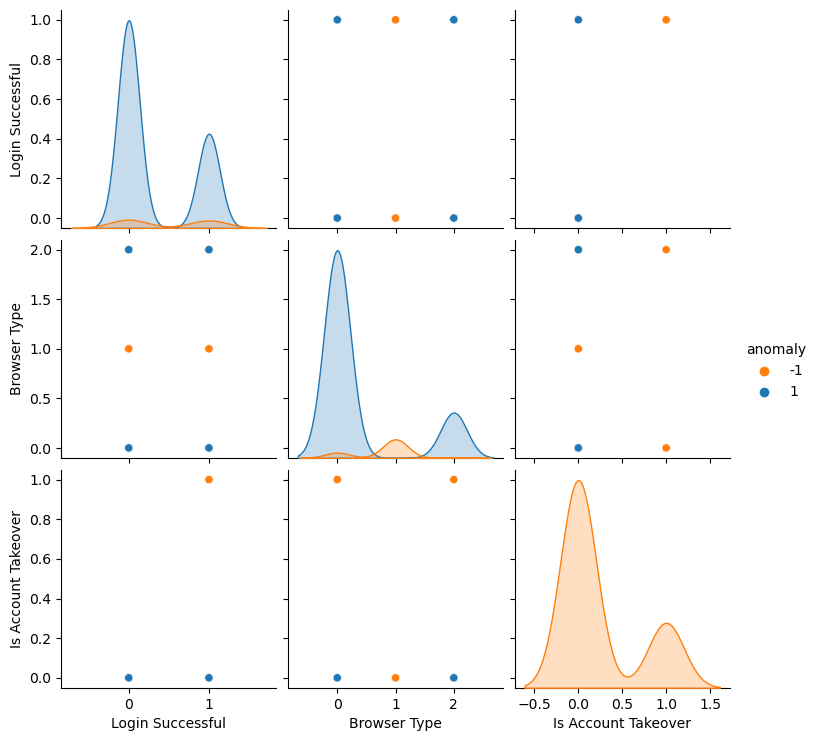

In [31]:
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 124
Number of non anomalous values  376
Total Number of Values: 500


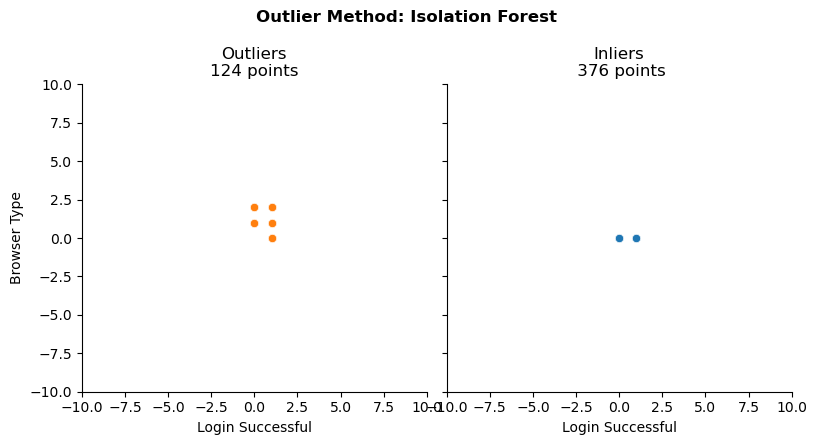

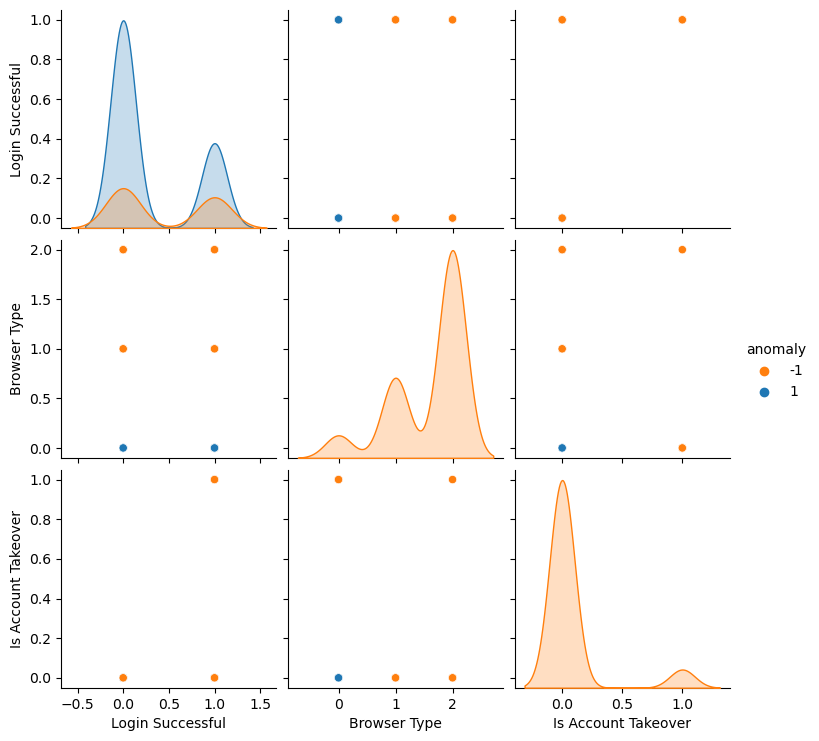

In [32]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 233
Number of non anomalous values  267
Total Number of Values: 500


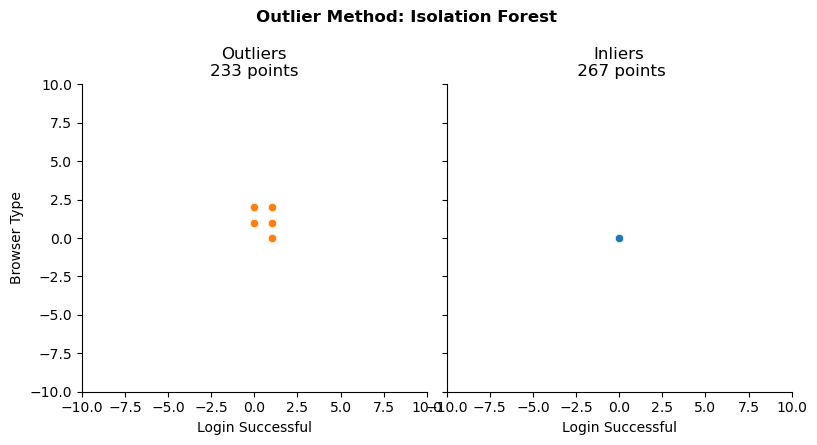

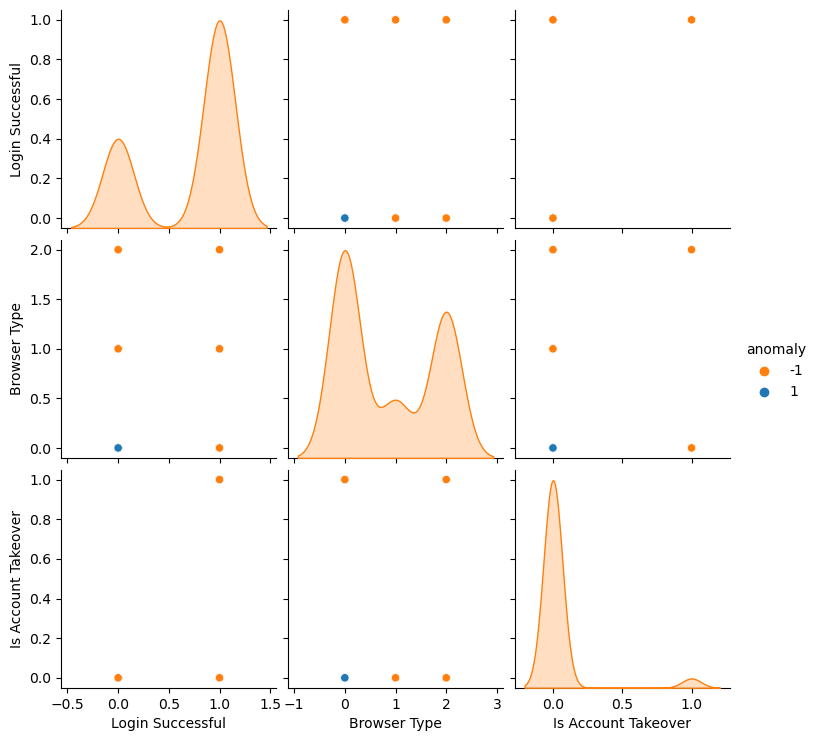

In [33]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 10
Number of non anomalous values  490
Total Number of Values: 500


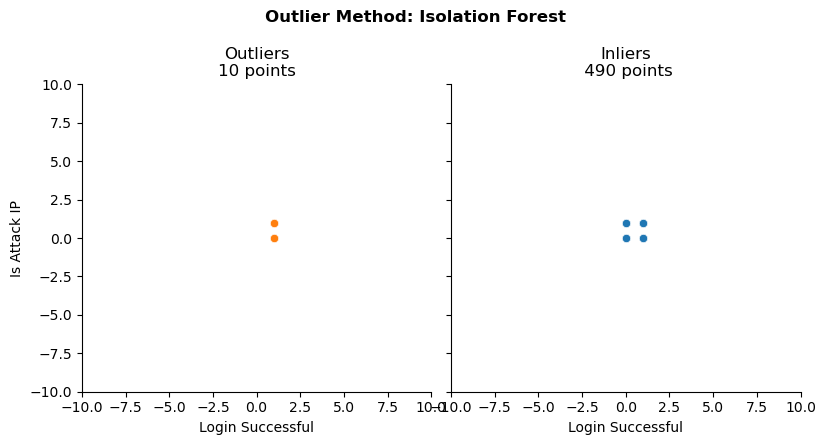

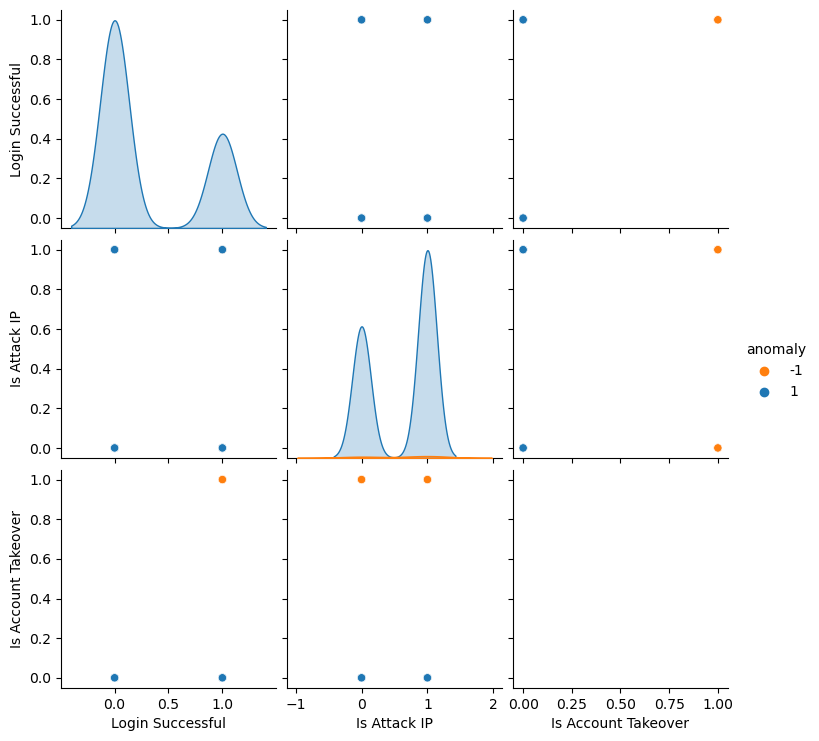

In [34]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 73
Number of non anomalous values  427
Total Number of Values: 500


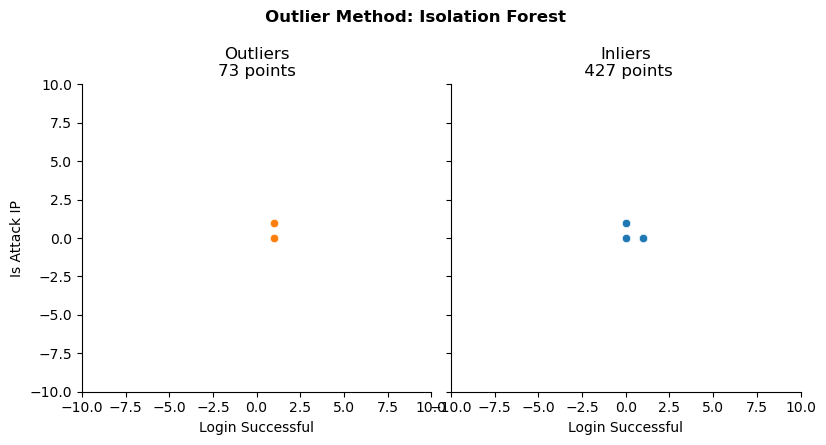

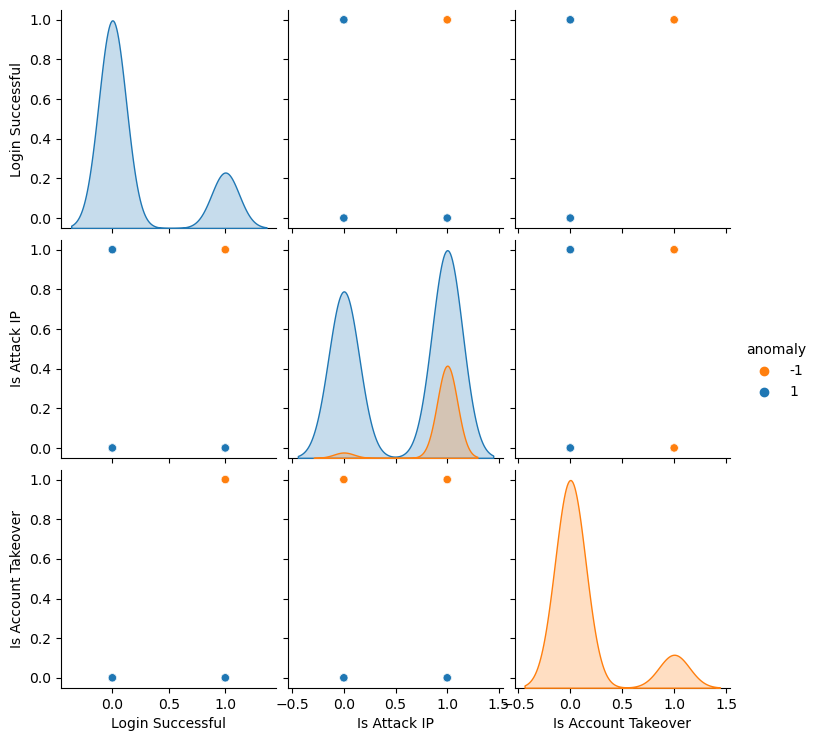

In [35]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 173
Number of non anomalous values  327
Total Number of Values: 500


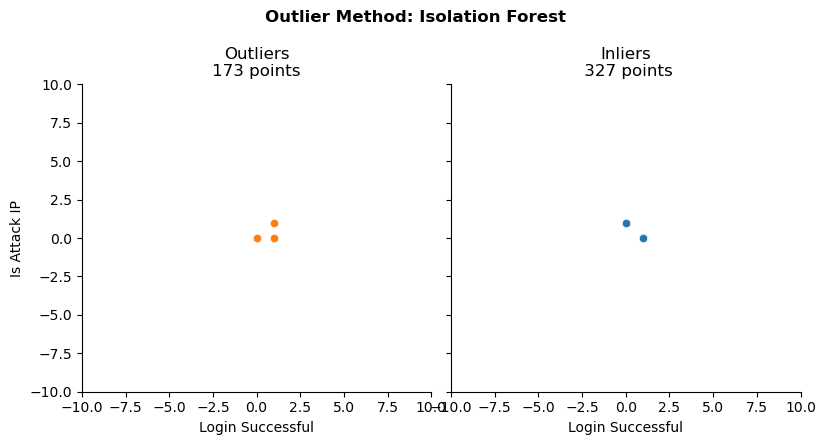

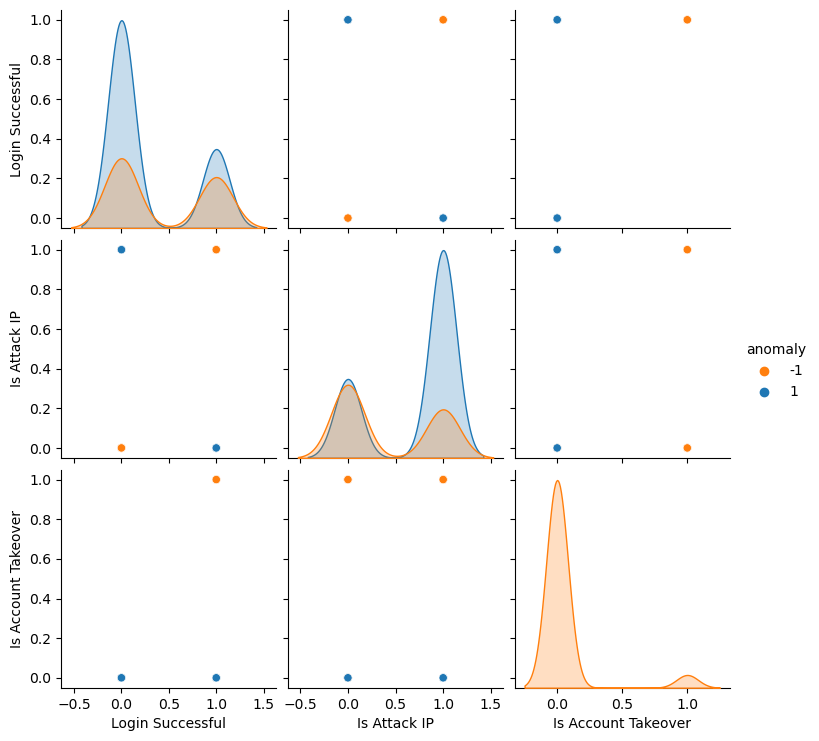

In [36]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### iForest, Local Outlier Factor, Support Vector Machine

Text(0, 0.5, 'Frequency')

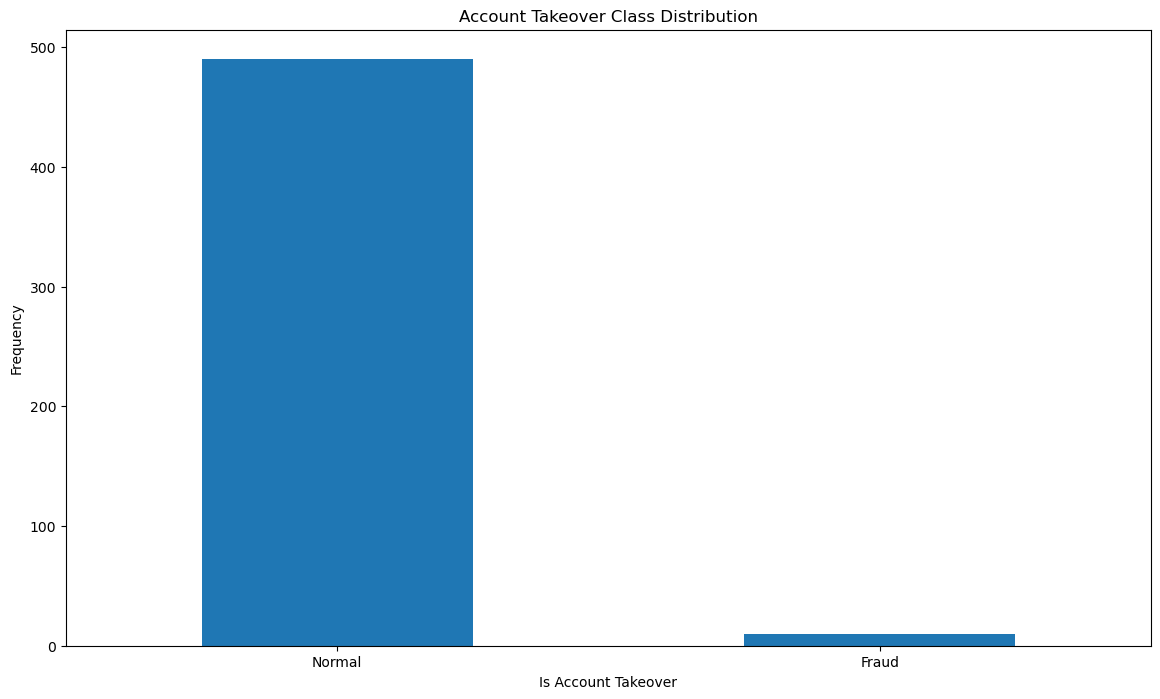

In [37]:
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

In [38]:
fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

(10, 11) (490, 11)


In [39]:
outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

(500, 10)
(500,)
Isolation Forest: 21
Accuracy Score :
0.958
Classification Report :
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       490
        True       0.00      0.00      0.00        10

    accuracy                           0.96       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.96      0.96      0.96       500

Local Outlier Factor: 19
Accuracy Score :
0.962
Classification Report :
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       490
        True       0.09      0.10      0.10        10

    accuracy                           0.96       500
   macro avg       0.54      0.54      0.54       500
weighted avg       0.96      0.96      0.96       500

Support Vector Machine: 322
Accuracy Score :
0.356
Classification Report :
              precision    recall  f1-score   support

       False       0.95      0.36      0.52       490
     

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding

In [40]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 896 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(890)
memory usage: 444.5 KB


ASN  Is Account Takeover  Is Attack IP  Login Successful  \
0   15599.0                False         False             False   
1   29492.0                False         False              True   
2  208653.0                False          True             False   
3   29695.0                False         False              True   
4  393398.0                False          True             False   

        User ID  Blacklisted  cntr_AM  cntr_AR  cntr_AU  cntr_BA  ...  \
0 -4.324476e+18         True        0        0        0        0  ...   
1 -7.798963e+18        False        0        0        0        0  ...   
2 -4.324476e+18        False        0        0        0        0  ...   
3  8.134007e+18        False        0        0        0        0  ...   
4 -4.324476e+18         True        0        0        0        0  ...   

   lgnt_2021-02-28 23:56:23.148  lgnt_2021-02-28 23:56:44.382  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:57:00.409  lgnt_2021-02-28 23:57:20.002  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:58:04.017  lgnt_2021-02-28 23:58:44.011  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:59:22.608  brw_C  brw_F  brw_O  
0                             0      0      0      1  
1                             0      0      0      1  
2                             0      1      0      0  
3                             0      0      1      0  
4                             0      0      0      1  

[5 rows x 896 columns]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 98.79%
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       162
        True       1.00      0.33      0.50         3

    accuracy                           0.99       165
   macro avg 

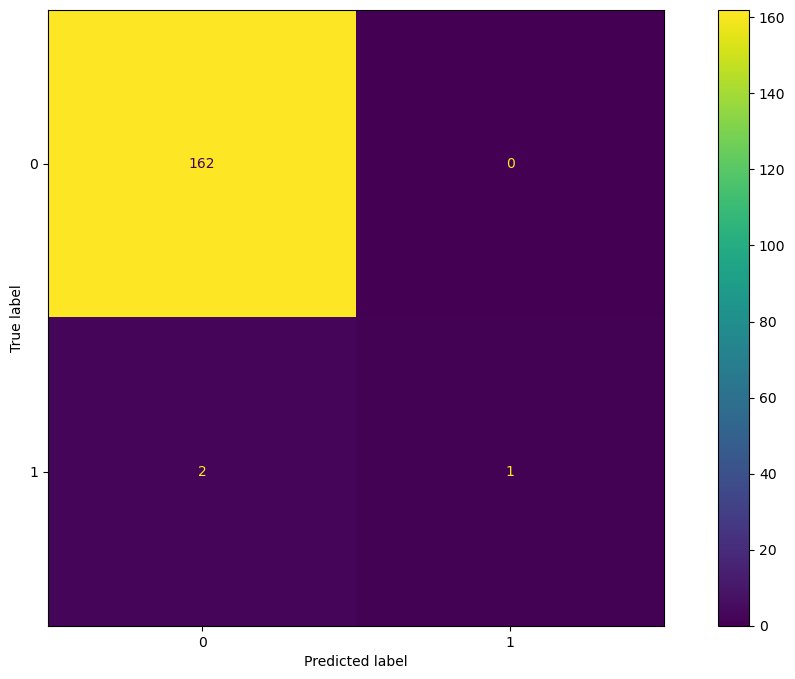

In [41]:
# XGBoost 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:895]
Y = dataset.iloc[:,895]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 400
The number of records in the test dataset is 100
The training dataset has 392 records for the majority class and 8 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.02      0.04        98
        True       0.02      1.00      0.04         2

    accuracy                           0.04       100
   macro avg       0.51      0.51      0.04       100
weighted avg       0.98      0.04      0.04       100

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.98      1.00      0.99        98
        True       0.00      0.00      0.00         2

    accuracy                           0.98       100
   macro avg       0.49      0.50      0.49       100
weighted avg       0.96      0.98      0.97       100

[[ 2 96]
 [ 0  2]]


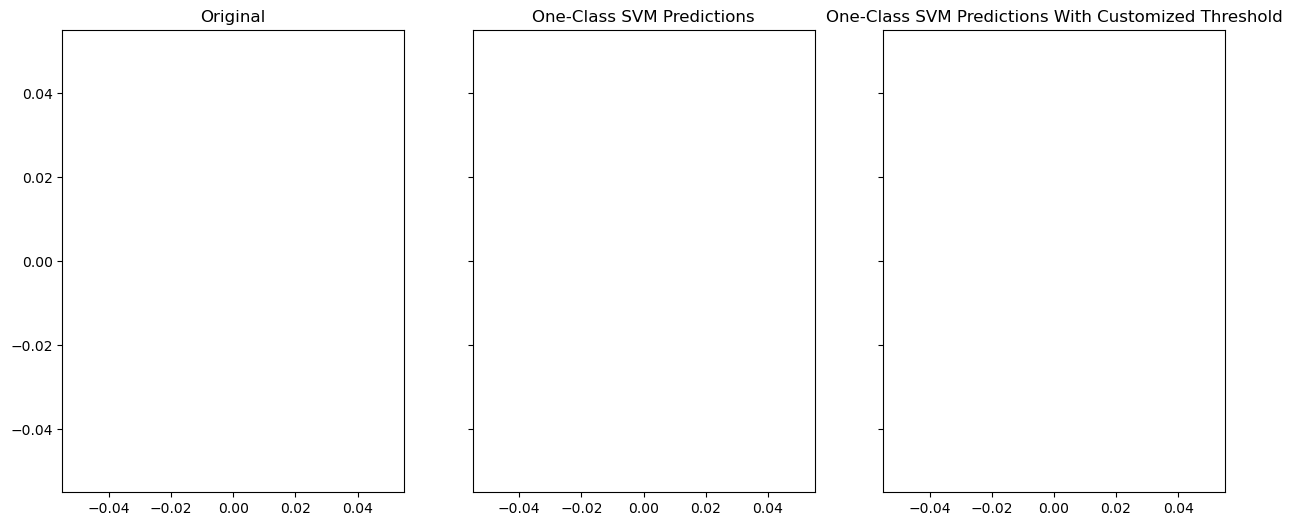

In [42]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:895]
Y = dataset.iloc[:,895]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 350
The number of records in the test dataset is 150
The training dataset has 342 records for the majority class and 8 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.21      0.35       148
        True       0.02      1.00      0.03         2

    accuracy                           0.22       150
   macro avg       0.51      0.60      0.19       150
weighted avg       0.99      0.22      0.34       150

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       148
        True       0.00      0.00      0.00         2

    accuracy                           0.99       150
   macro avg       0.49      0.50      0.50       150
weighted avg       0.97      0.99      0.98       150

[[ 31 117]
 [  0   2]]


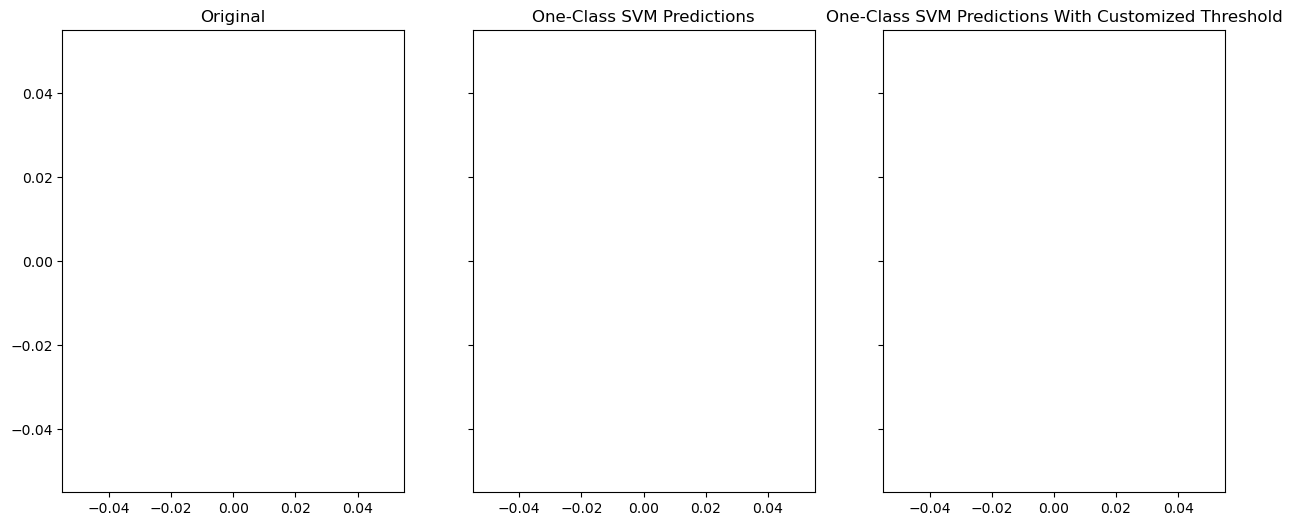

In [43]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:895]
Y = dataset.iloc[:,895]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 250
The number of records in the test dataset is 250
The training dataset has 243 records for the majority class and 7 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       247
        True       0.01      1.00      0.02         3

    accuracy                           0.01       250
   macro avg       0.01      0.50      0.01       250
weighted avg       0.00      0.01      0.00       250

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       247
        True       0.00      0.00      0.00         3

    accuracy                           0.99       250
   macro avg       0.49      0.50      0.50       250
weighted avg       0.98      0.99      0.98       250

[[  0 247]
 [  0   3]]


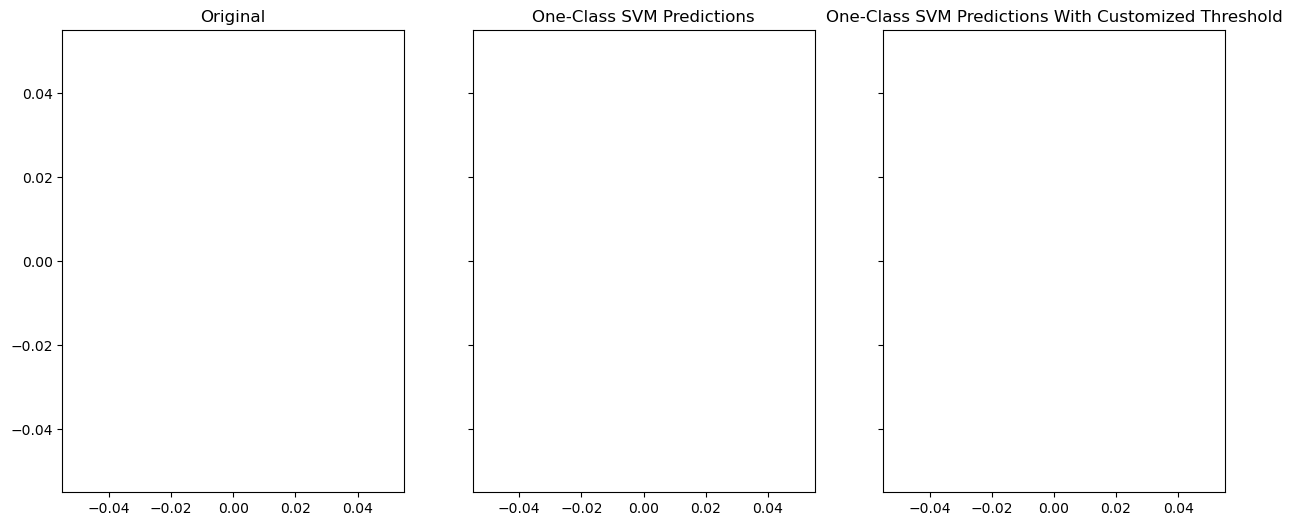

In [44]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:895]
Y = dataset.iloc[:,895]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

In [45]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Is Attack IP  Blacklisted  anomaly_scores  anomaly  Is Account Takeover
0           False         True        0.000000        1                False
1           False        False        0.043080        1                False
2            True        False        0.050989        1                False
3           False        False        0.043080        1                False
4            True         True        0.056549        1                False
..            ...          ...             ...      ...                  ...
495         False        False        0.043080        1                False
496         False         True        0.000000        1                False
497          True         True        0.056549        1                False
498          True         True        0.056549        1                False
499          True        False        0.050989        1                False

[500 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 10
Number of non anomalous values  490
Total Number of Values: 500


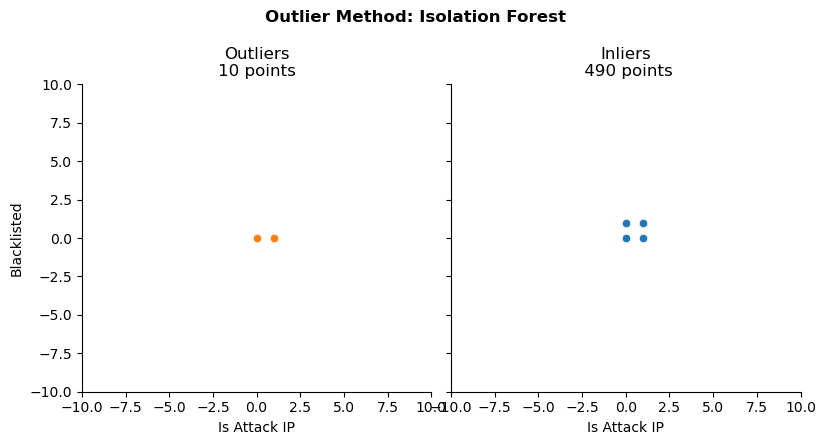

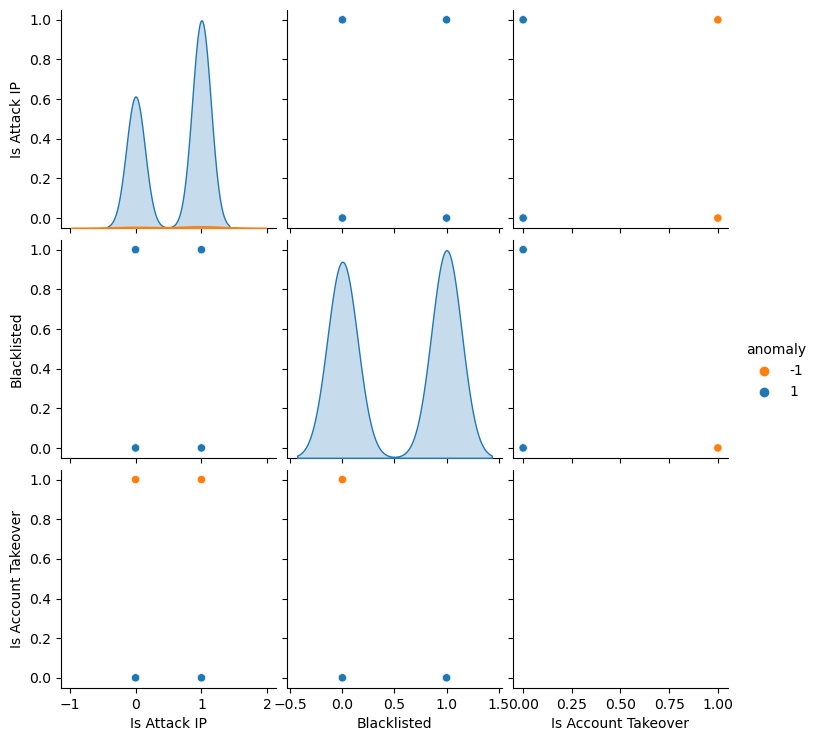

In [46]:
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 85
Number of non anomalous values  415
Total Number of Values: 500


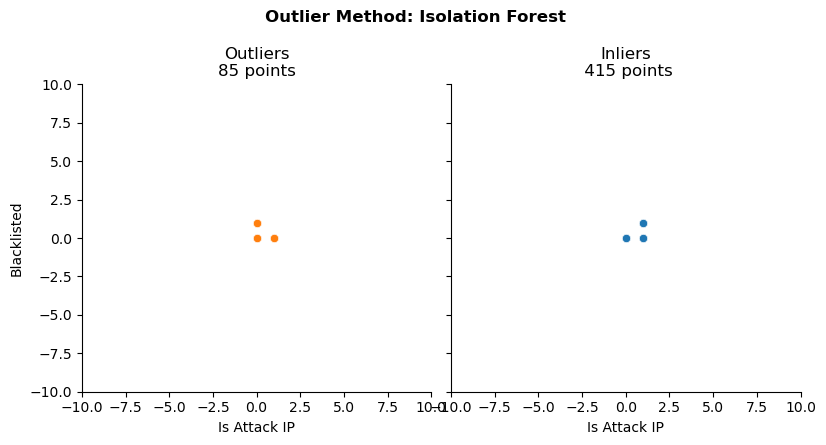

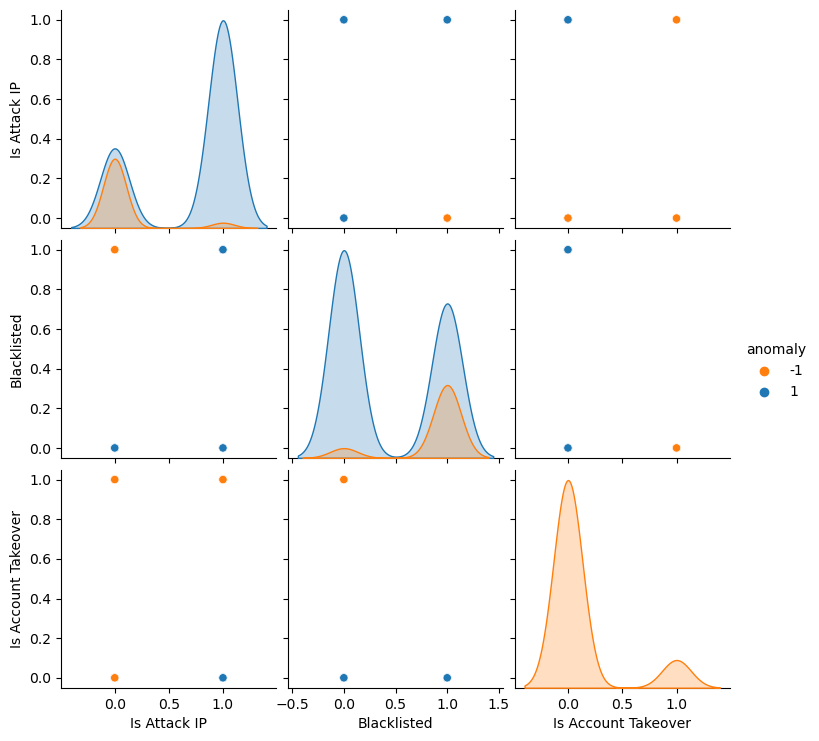

In [47]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 200
Number of non anomalous values  300
Total Number of Values: 500


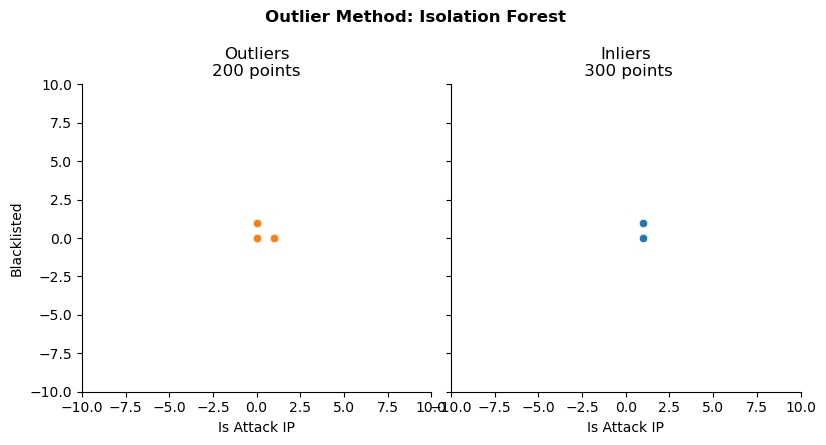

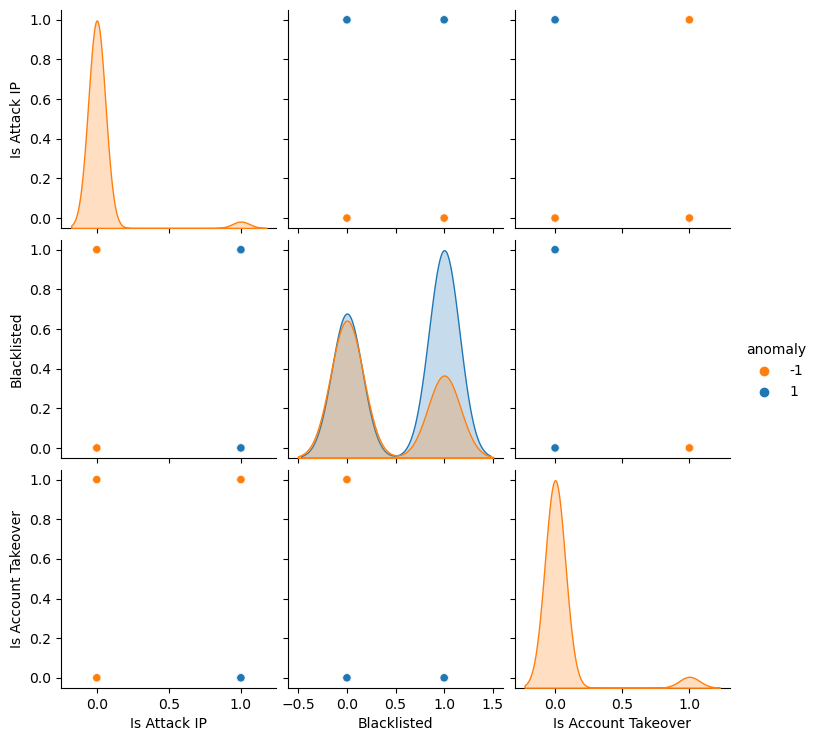

In [48]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [49]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'brw_O', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'brw_O','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Login Successful  brw_O  anomaly_scores  anomaly  Is Account Takeover
0               False      1        0.000000        1                False
1                True      1       -0.013385       -1                False
2               False      0        0.127721        1                False
3                True      0        0.087763        1                False
4               False      1        0.000000        1                False
..                ...    ...             ...      ...                  ...
495             False      0        0.127721        1                False
496              True      1       -0.013385       -1                False
497             False      0        0.127721        1                False
498             False      0        0.127721        1                False
499             False      1        0.000000        1                False

[500 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 44
Number of non anomalous values  456
Total Number of Values: 500


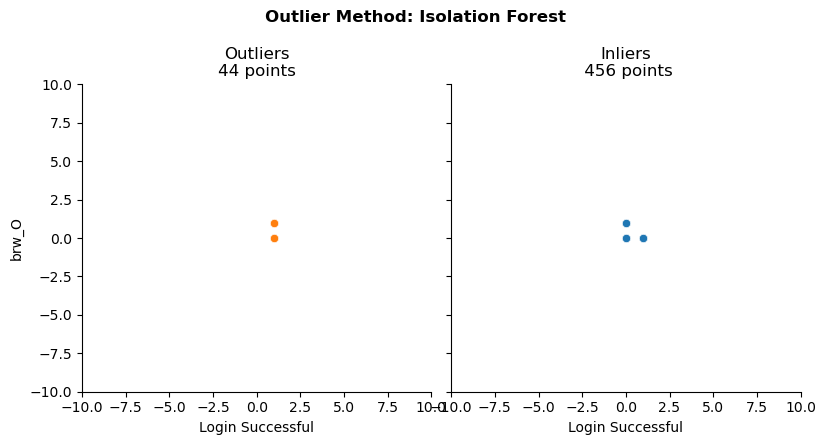

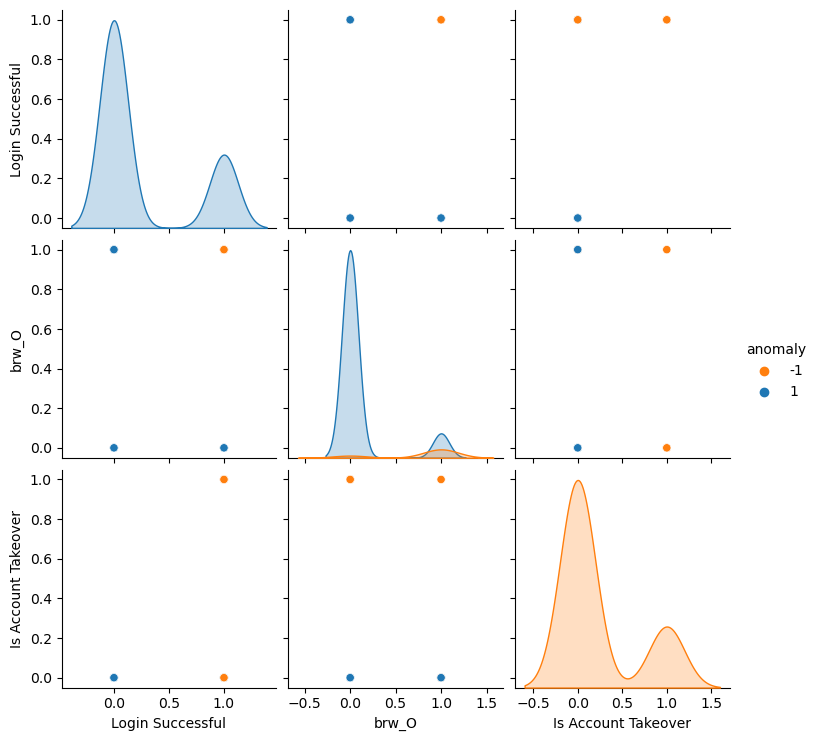

In [50]:
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 92
Number of non anomalous values  408
Total Number of Values: 500


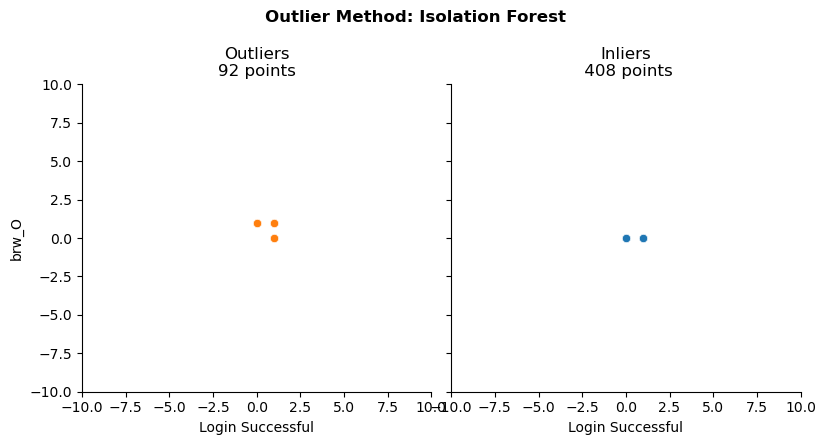

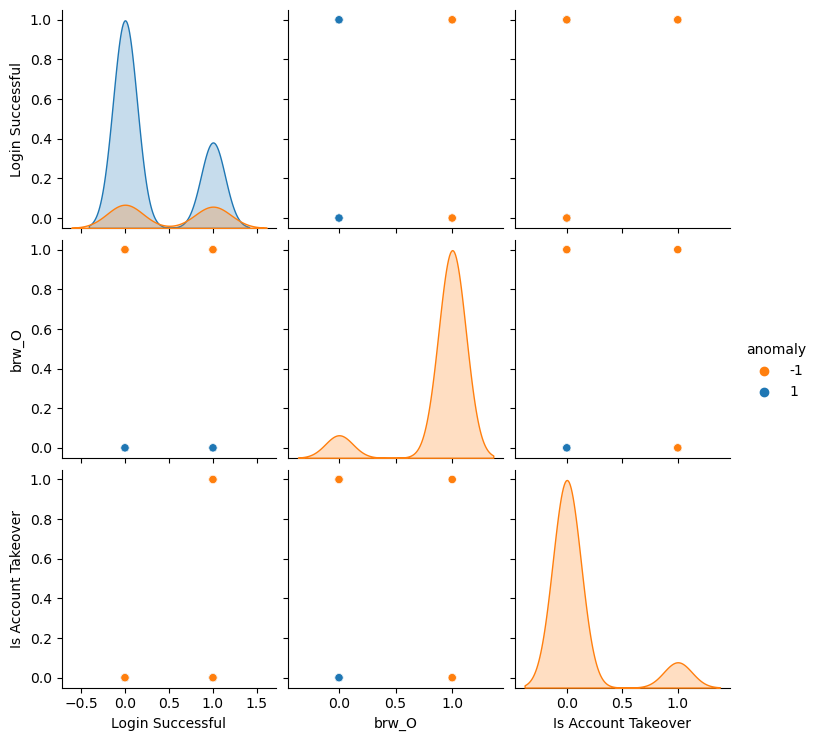

In [51]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 211
Number of non anomalous values  289
Total Number of Values: 500


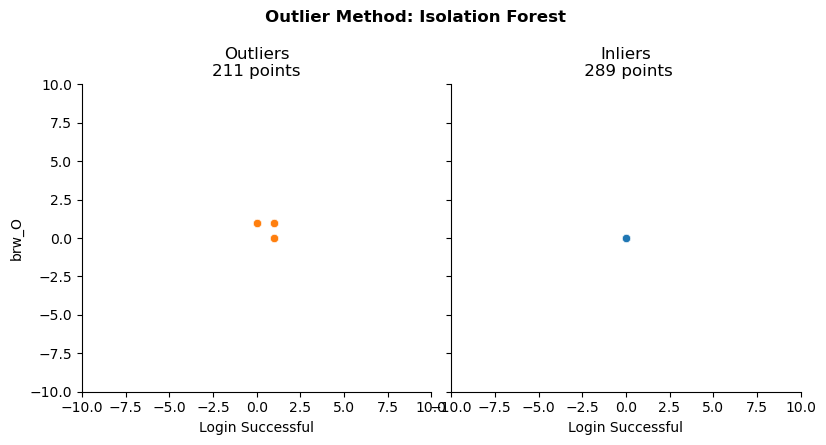

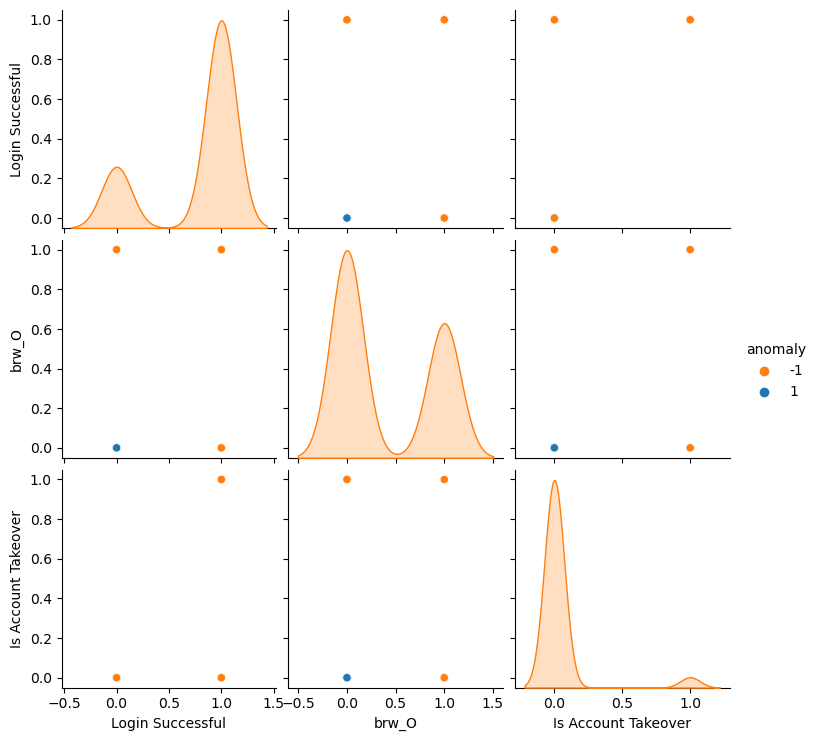

In [52]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 10
Number of non anomalous values  490
Total Number of Values: 500


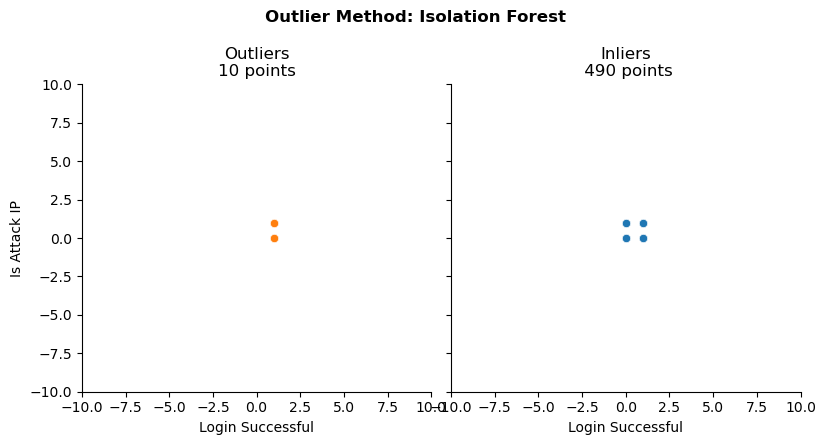

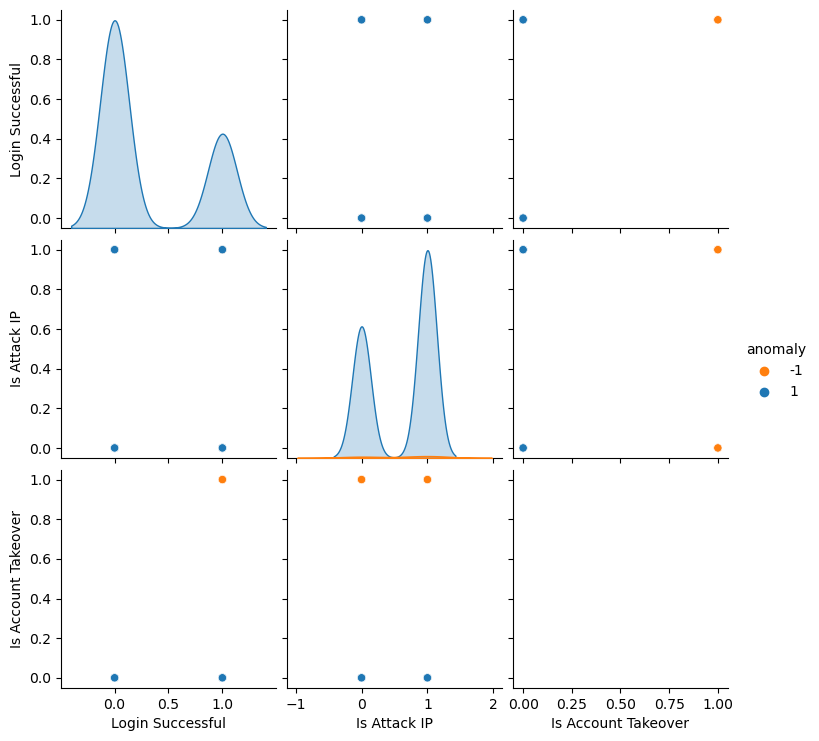

In [53]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 73
Number of non anomalous values  427
Total Number of Values: 500


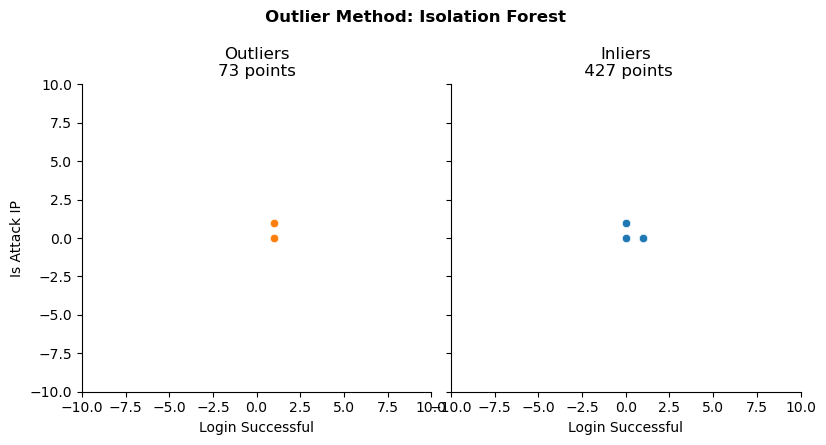

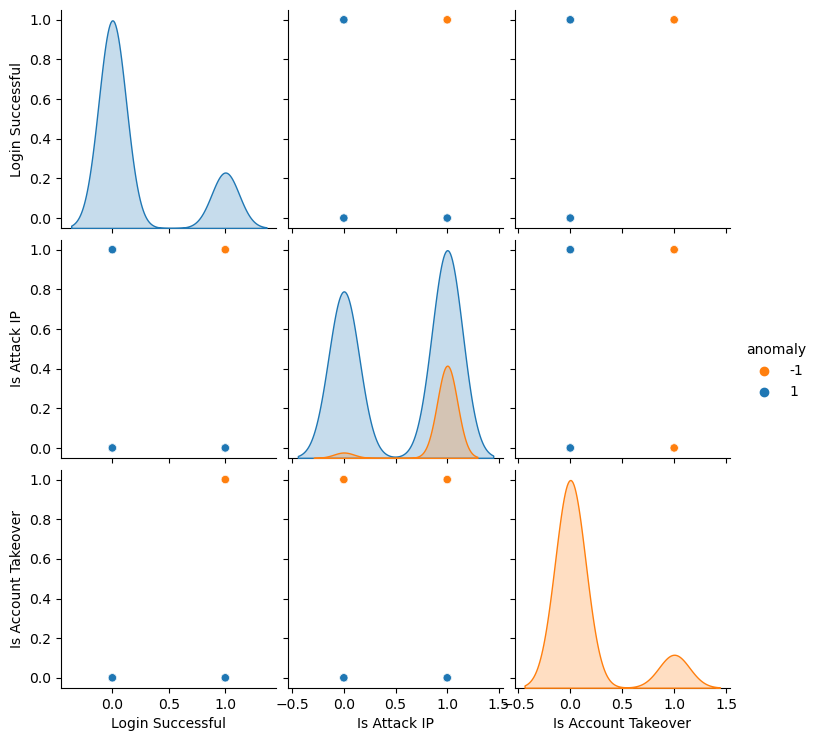

In [54]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 173
Number of non anomalous values  327
Total Number of Values: 500


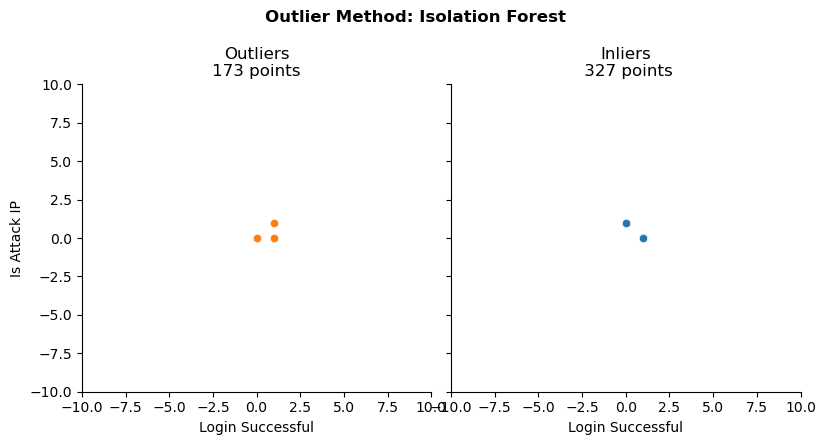

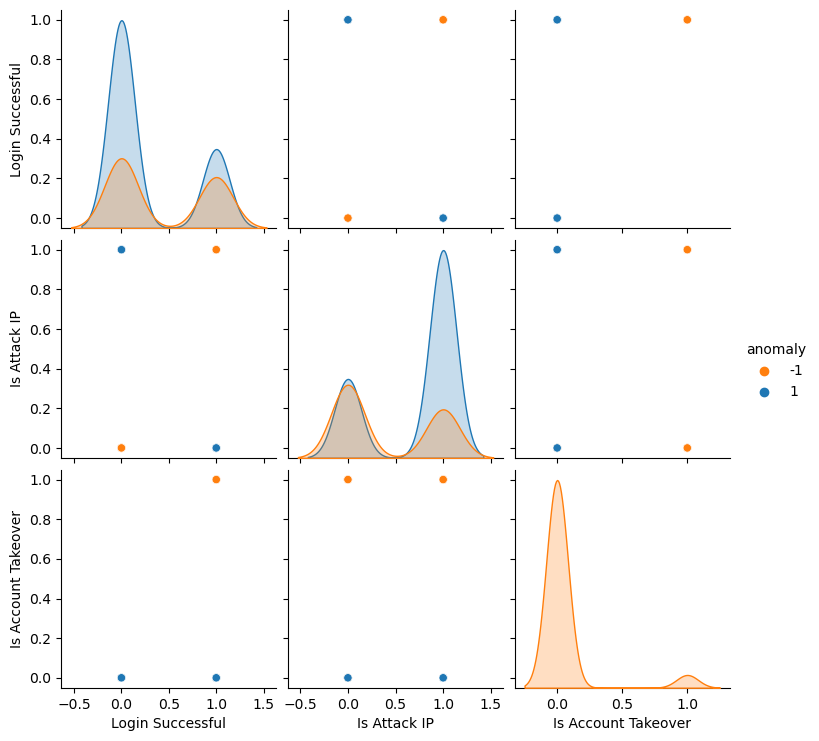

In [55]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### iForest, Local Outlier Factor, Support Vector Machine

Text(0, 0.5, 'Frequency')

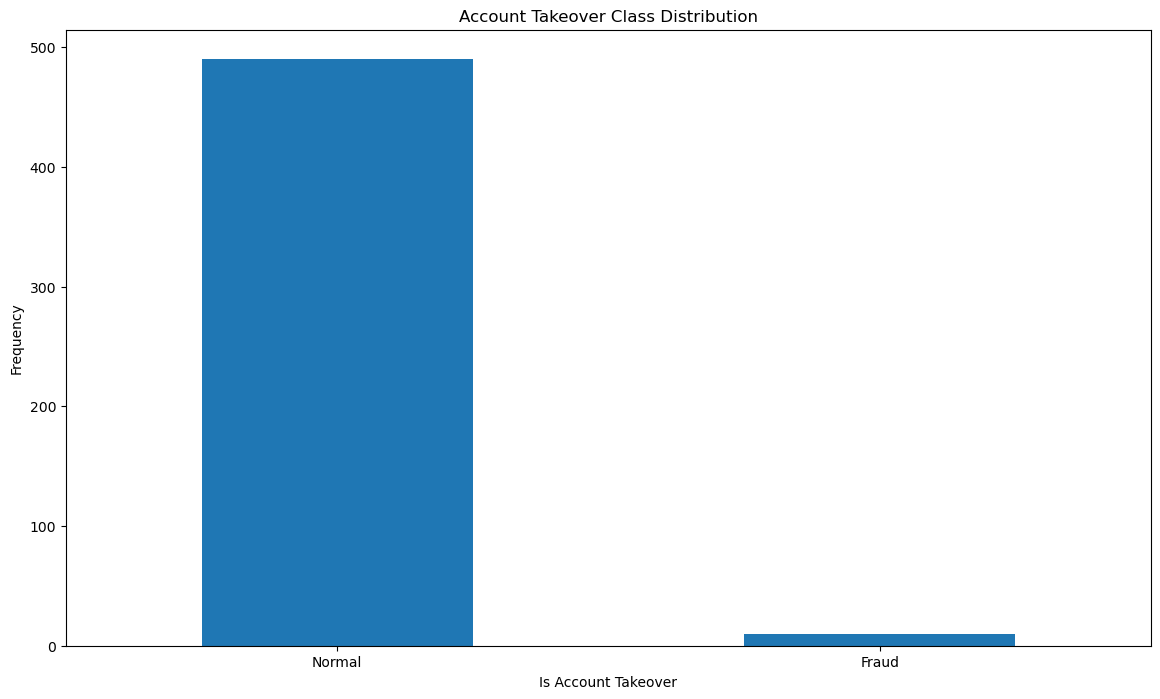

In [56]:
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

In [57]:
fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

(10, 896) (490, 896)


In [58]:
outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

(500, 895)
(500,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 21
Accuracy Score :
0.958
Classification Report :
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       490
        True       0.00      0.00      0.00        10

    accuracy                           0.96       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.96      0.96      0.96       500

Local Outlier Factor: 21
Accuracy Score :
0.958
Classification Report :
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       490
        True       0.00      0.00      0.00        10

    accuracy                           0.96       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.96      0.96      0.96       500

Support Vector Machine: 322
Accuracy Score :
0.356
Classification Report :
              precision    recall  f1-score   support

       False       0.95      0.36      0.52       490
        True       0.0

## 30 takeover out of 500 rows

In [59]:
s = susp.loc[susp['Is Account Takeover'] == True]
df = pd.concat([susp.tail(300), safe.head(170), s.head(30)], ignore_index=True, sort=False)

# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)
df.drop("OS Name and Version", inplace=True, axis=1)
df.drop("Browser Name and Version", inplace=True, axis=1)

df1 = df.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  500 non-null    float64 
 1   Country              500 non-null    category
 2   Device Type          500 non-null    category
 3   IP Address           500 non-null    category
 4   Is Account Takeover  500 non-null    bool    
 5   Is Attack IP         500 non-null    bool    
 6   Login Successful     500 non-null    bool    
 7   Login Timestamp      500 non-null    category
 8   User ID              500 non-null    float64 
 9   Blacklisted          500 non-null    bool    
 10  Browser Type         500 non-null    category
dtypes: bool(4), category(5), float64(2)
memory usage: 45.9 KB


# Experimental xgboost (https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  500 non-null    float64 
 1   Country              500 non-null    category
 2   Device Type          500 non-null    category
 3   IP Address           500 non-null    category
 4   Is Attack IP         500 non-null    bool    
 5   Login Successful     500 non-null    bool    
 6   Login Timestamp      500 non-null    category
 7   User ID              500 non-null    float64 
 8   Blacklisted          500 non-null    bool    
 9   Browser Type         500 non-null    category
 10  Is Account Takeover  500 non-null    bool    
dtypes: bool(4), category(5), float64(2)
memory usage: 45.9 KB
Feature importances:
[0.0278866  0.20840558 0.03784616 0.         0.0766107  0.1206836
 0.30358383 0.03665654 0.01446437 0.17386264]


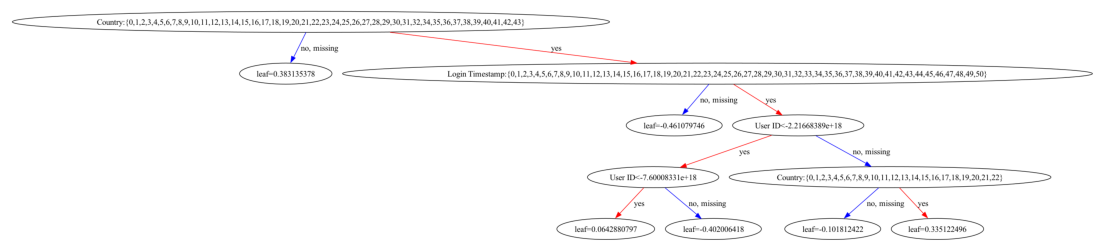

In [60]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model-attack-or-takeover.json")
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("caterogical-model-graph-attack-or-takeover.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
print("Feature importances:")
print(clf.feature_importances_)

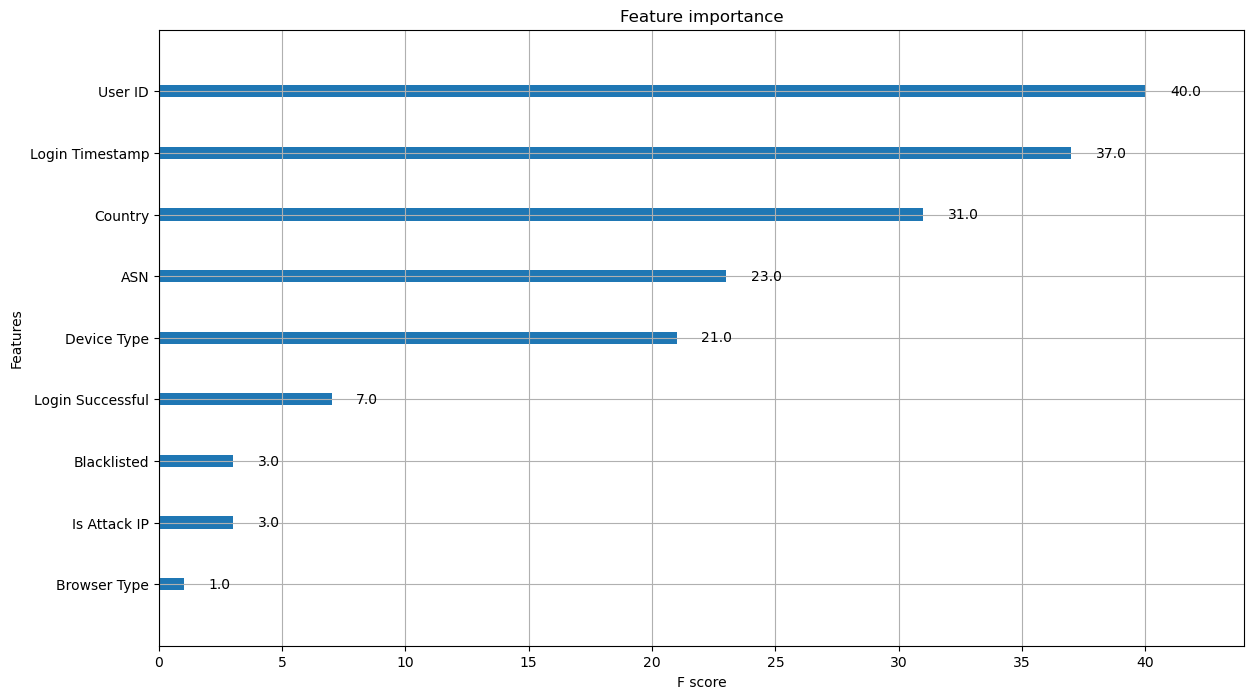

In [61]:
plot_importance(clf)
pyplot.show()

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [62]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  500 non-null    float64
 1   Country              500 non-null    int8   
 2   Device Type          500 non-null    int8   
 3   IP Address           500 non-null    int16  
 4   Is Account Takeover  500 non-null    bool   
 5   Is Attack IP         500 non-null    bool   
 6   Login Successful     500 non-null    bool   
 7   Login Timestamp      500 non-null    int16  
 8   User ID              500 non-null    float64
 9   Blacklisted          500 non-null    bool   
 10  Browser Type         500 non-null    int8   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 13.3 KB


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 95.76%
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       151
        True       1.00      0.50      0.67        14

    accuracy                           0.96       165
   macro avg 

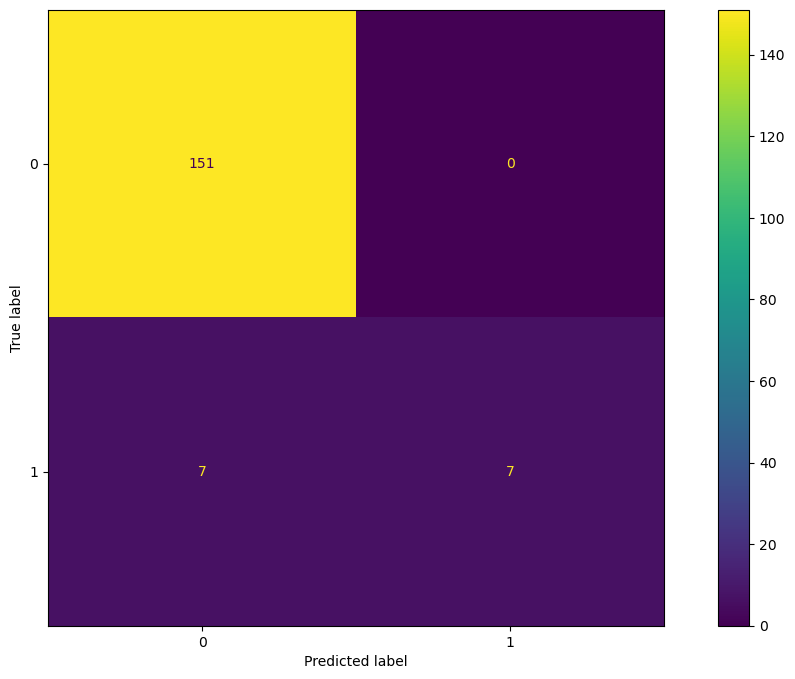

In [63]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 400
The number of records in the test dataset is 100
The training dataset has 376 records for the majority class and 24 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        94
        True       0.06      1.00      0.11         6

    accuracy                           0.06       100
   macro avg       0.03      0.50      0.06       100
weighted avg       0.00      0.06      0.01       100

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.94      1.00      0.97        94
        True       0.00      0.00      0.00         6

    accuracy                           0.94       100
   macro avg       0.47      0.50      0.48       100
weighted avg       0.88      0.94      0.91       100

[[ 0 94]
 [ 0  6]]


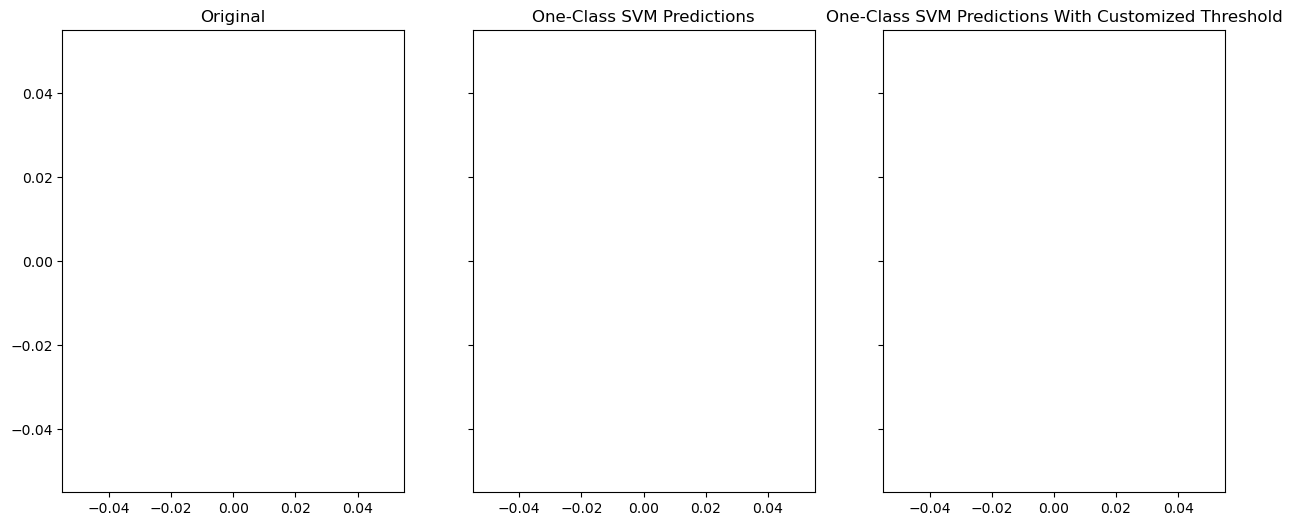

In [64]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 350
The number of records in the test dataset is 150
The training dataset has 330 records for the majority class and 20 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       140
        True       0.07      1.00      0.12        10

    accuracy                           0.07       150
   macro avg       0.03      0.50      0.06       150
weighted avg       0.00      0.07      0.01       150

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.93      1.00      0.97       140
        True       0.00      0.00      0.00        10

    accuracy                           0.93       150
   macro avg       0.47      0.50      0.48       150
weighted avg       0.87      0.93      0.90       150

[[  0 140]
 [  0  10]]


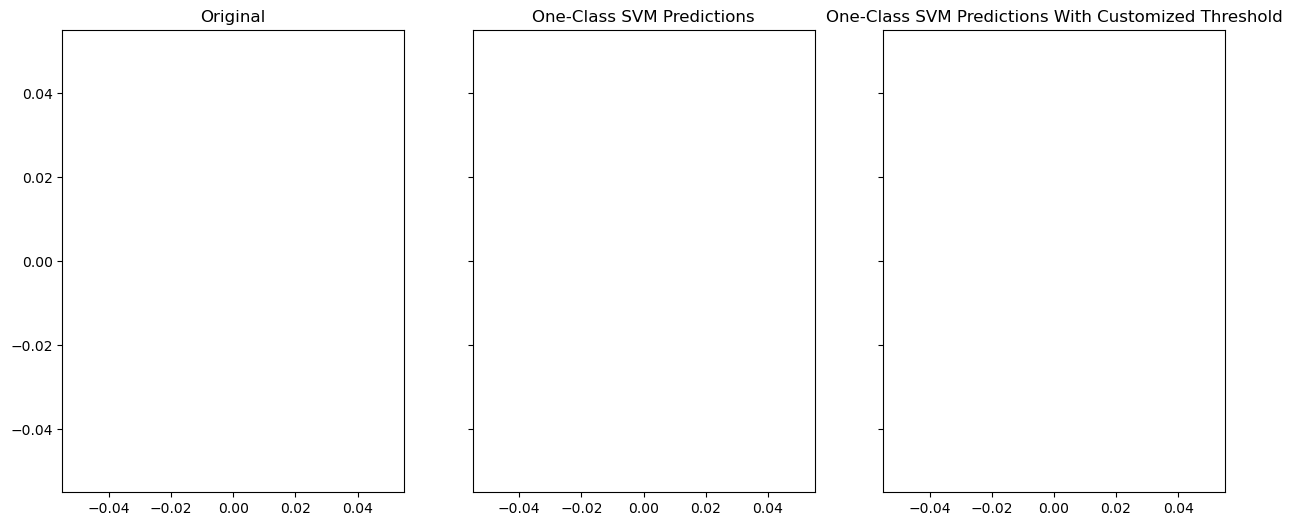

In [65]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 250
The number of records in the test dataset is 250
The training dataset has 235 records for the majority class and 15 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       235
        True       0.06      1.00      0.11        15

    accuracy                           0.06       250
   macro avg       0.03      0.50      0.06       250
weighted avg       0.00      0.06      0.01       250

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       235
        True       0.00      0.00      0.00        15

    accuracy                           0.94       250
   macro avg       0.47      0.50      0.48       250
weighted avg       0.88      0.94      0.91       250

[[  0 235]
 [  0  15]]


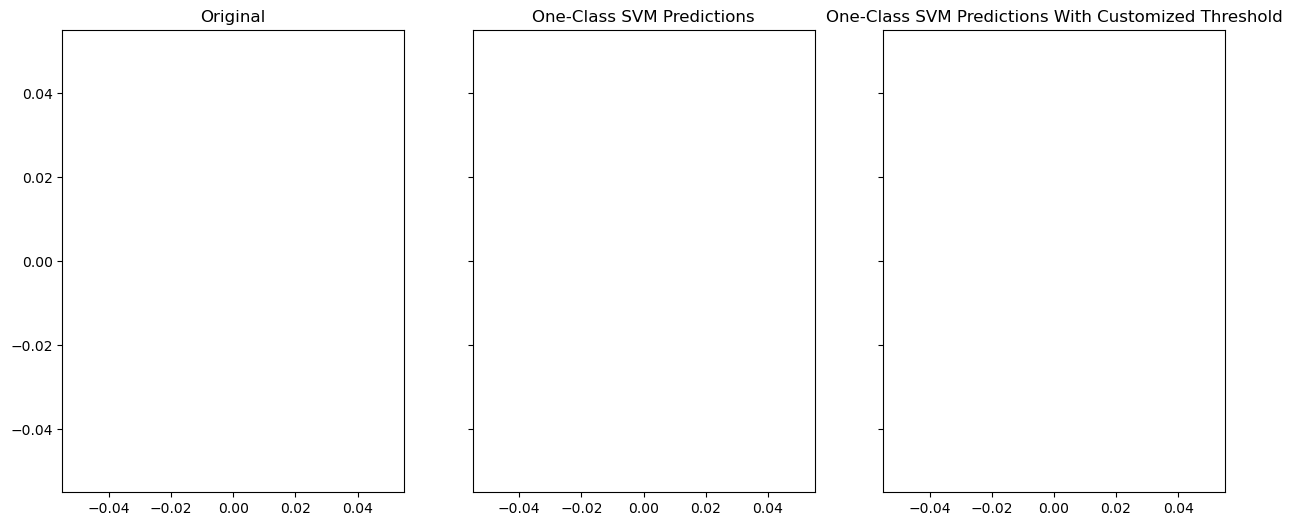

In [66]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 30
Number of non anomalous values  470
Total Number of Values: 500


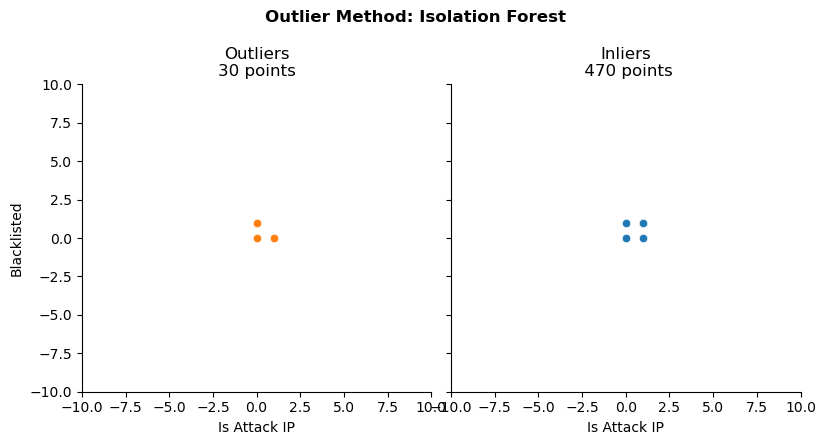

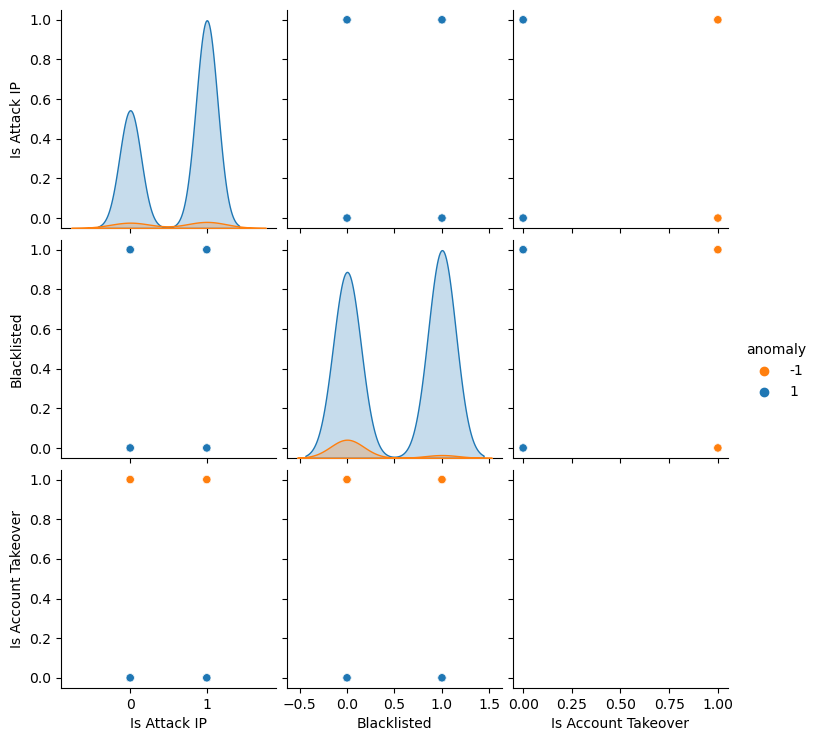

In [67]:
# Isolation Forest

# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 101
Number of non anomalous values  399
Total Number of Values: 500


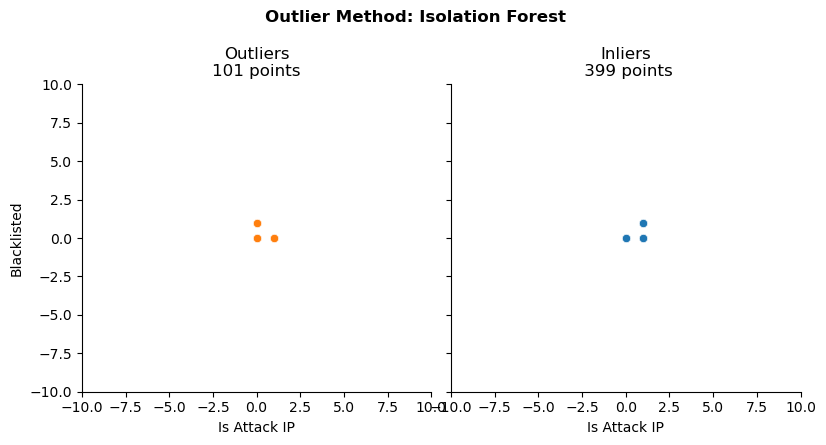

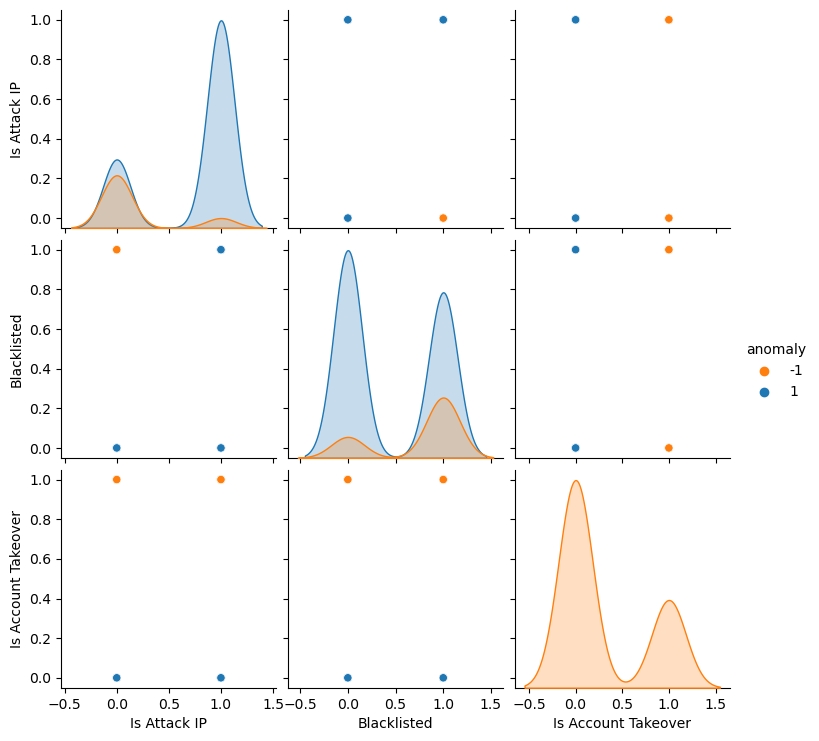

In [68]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 200
Number of non anomalous values  300
Total Number of Values: 500


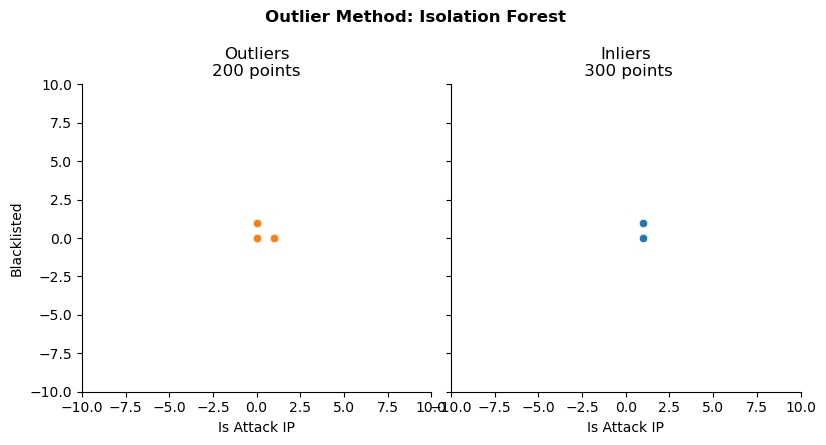

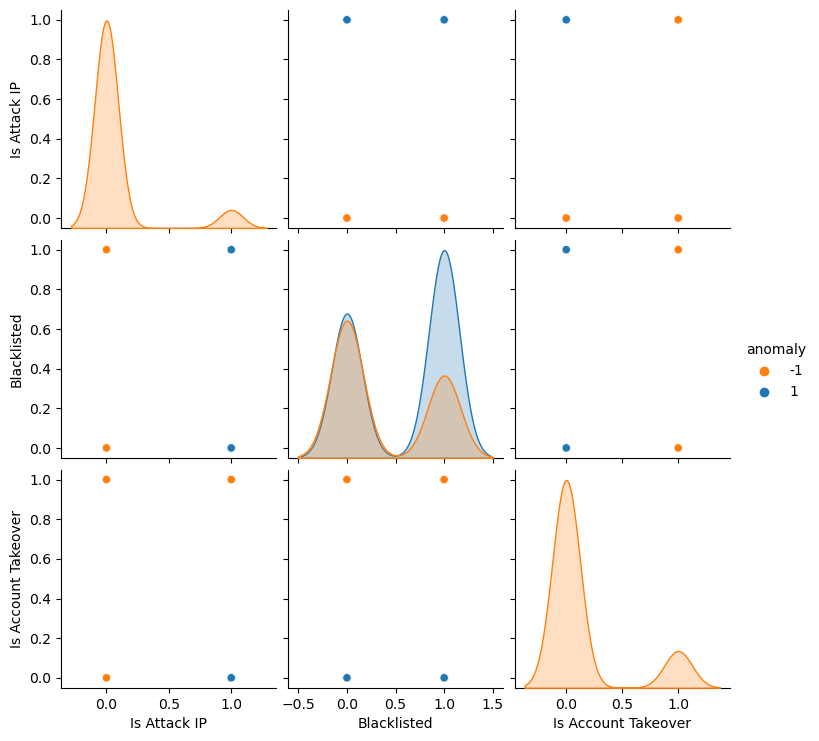

In [69]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 40
Number of non anomalous values  460
Total Number of Values: 500


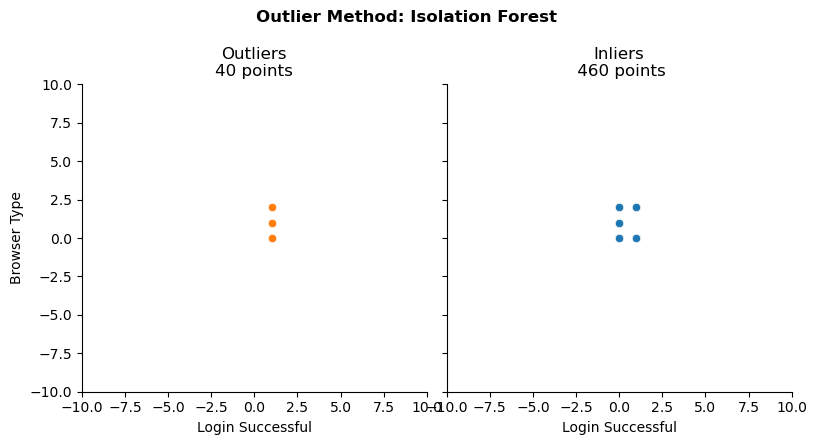

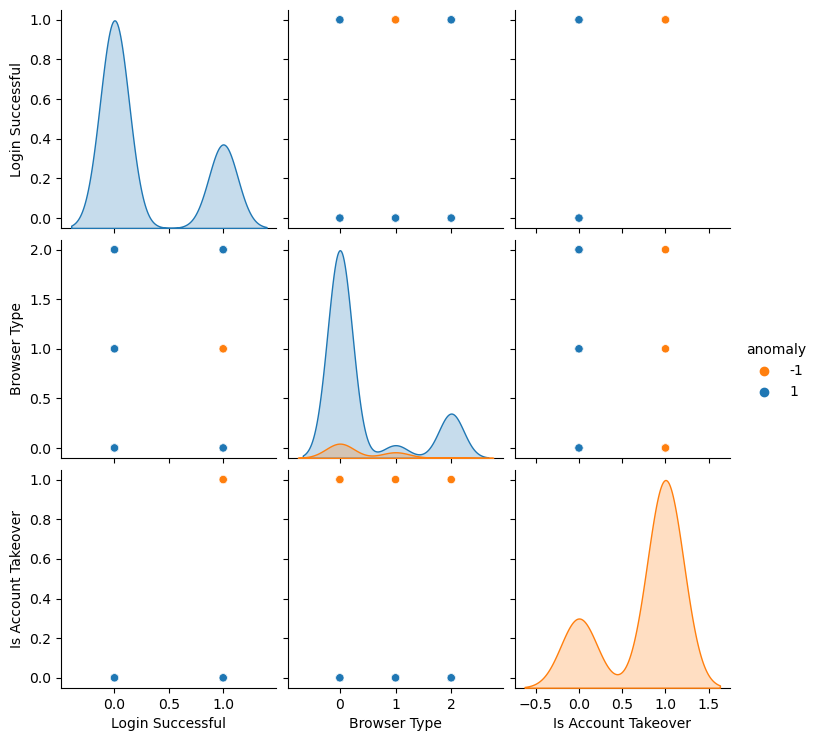

In [70]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Browser Type', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Browser Type','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 139
Number of non anomalous values  361
Total Number of Values: 500


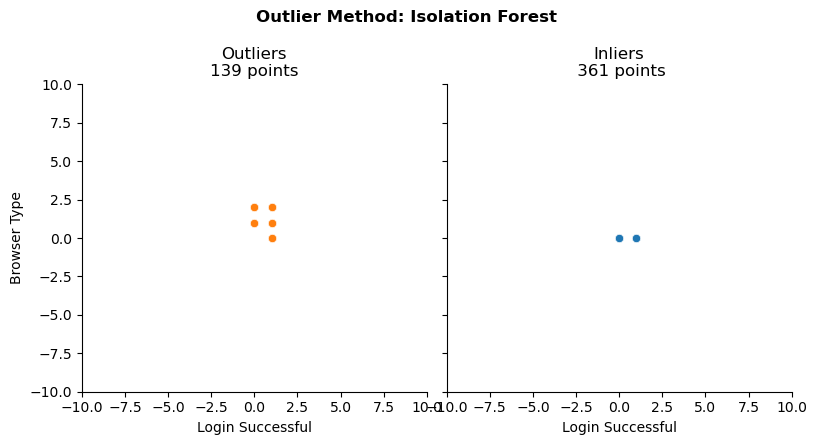

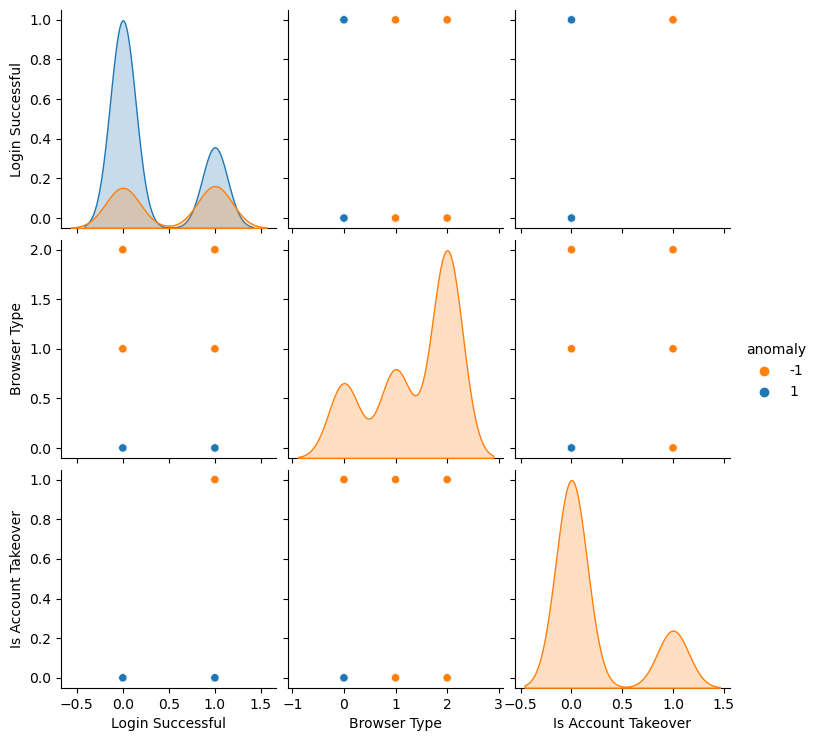

In [71]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 240
Number of non anomalous values  260
Total Number of Values: 500


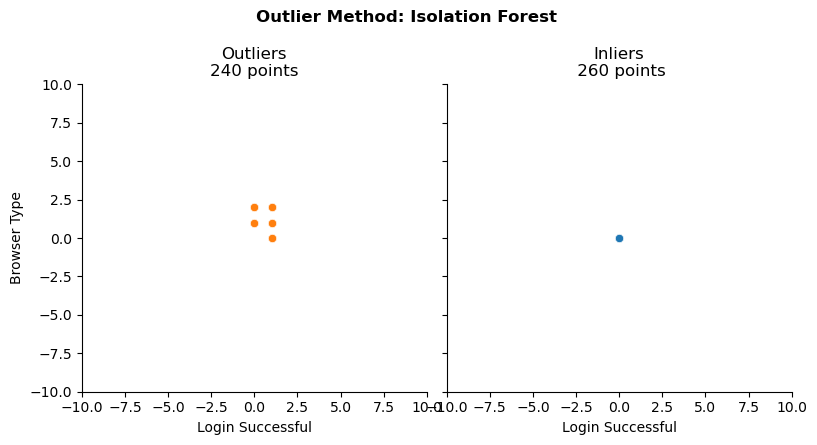

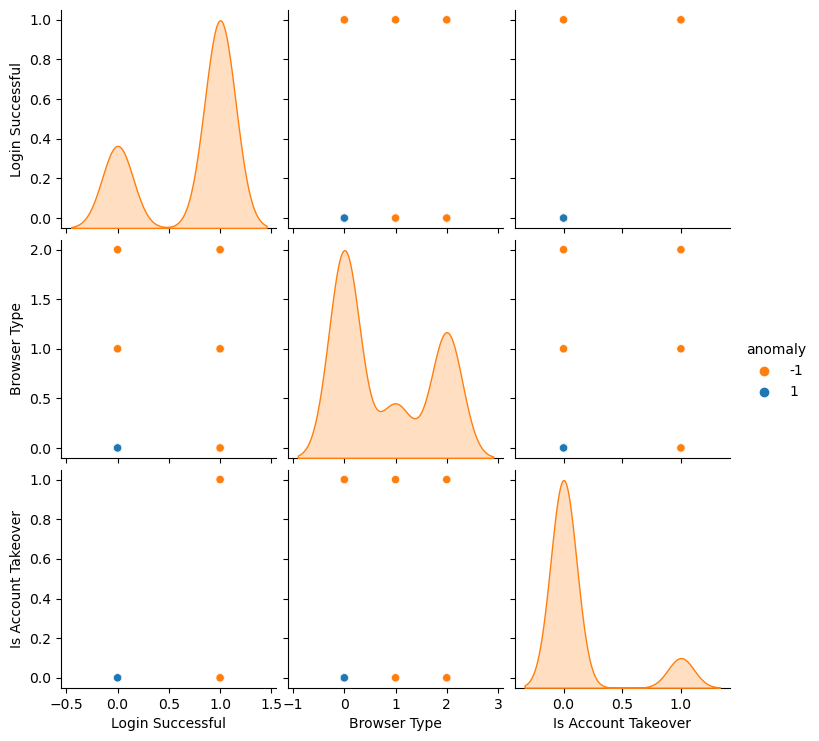

In [72]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 30
Number of non anomalous values  470
Total Number of Values: 500


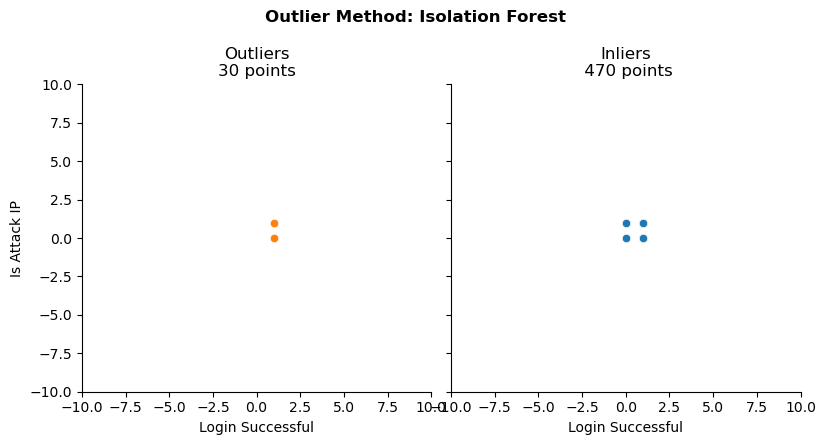

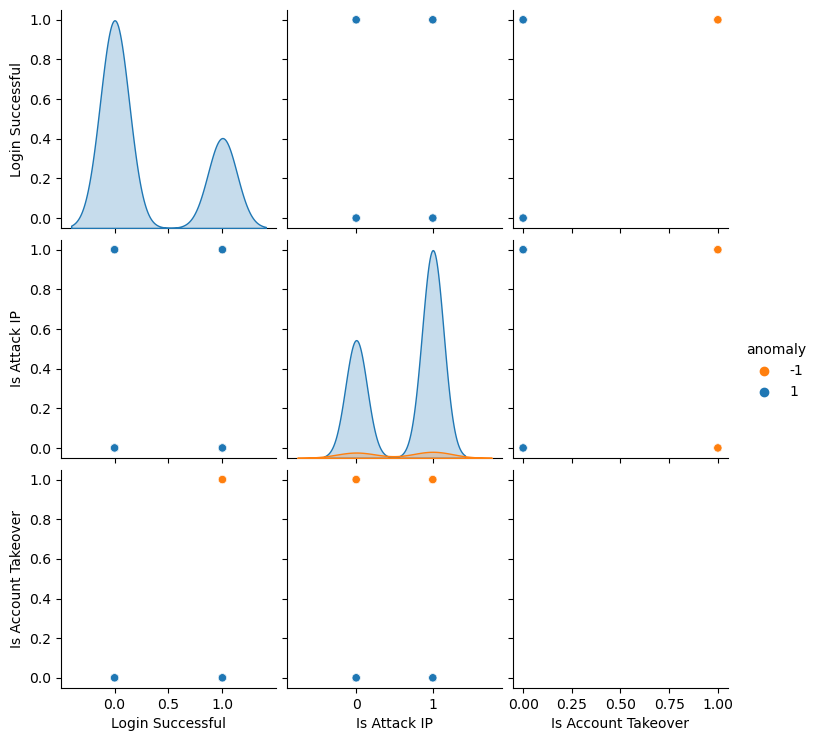

In [73]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 93
Number of non anomalous values  407
Total Number of Values: 500


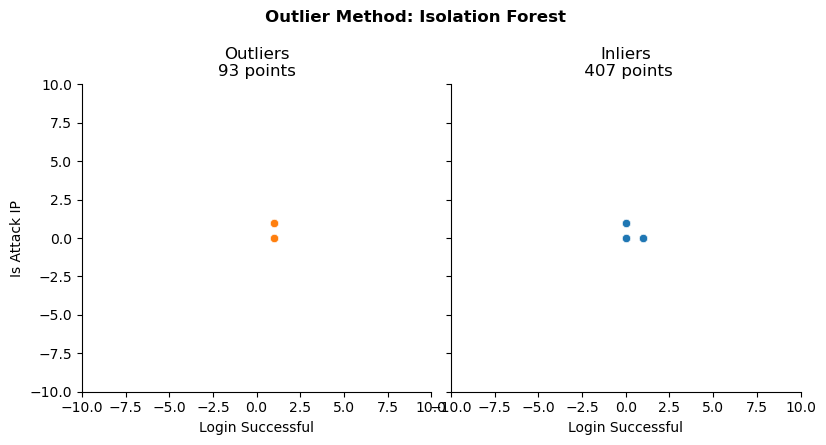

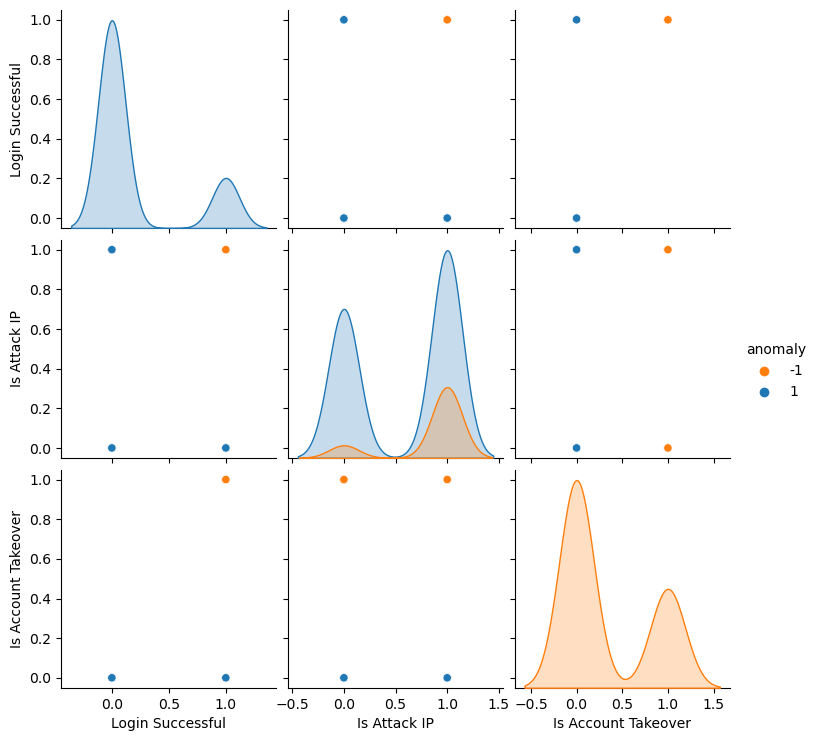

In [74]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 184
Number of non anomalous values  316
Total Number of Values: 500


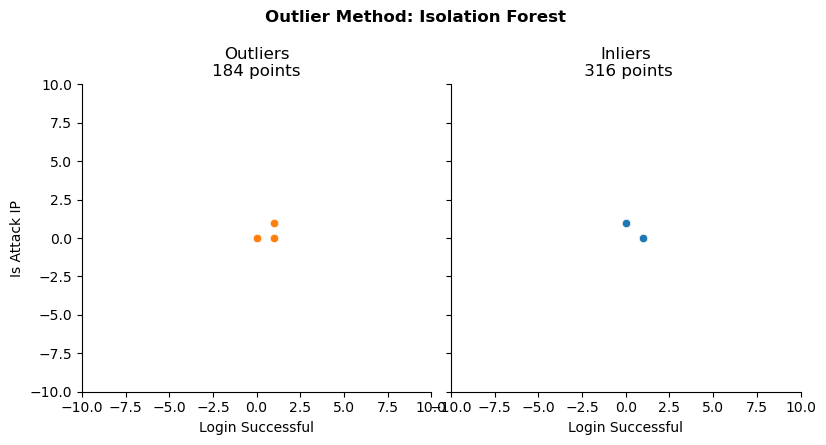

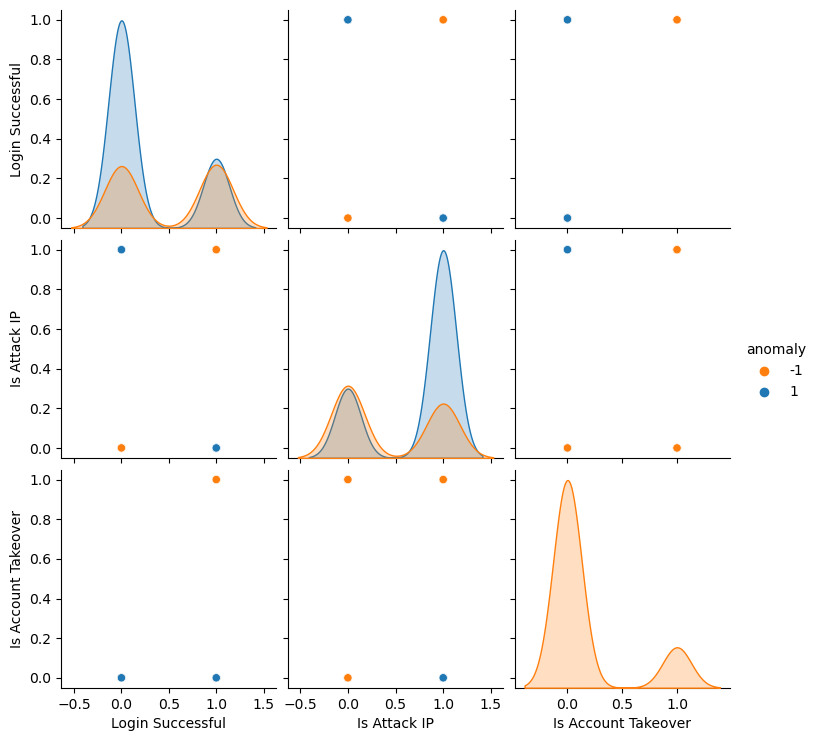

In [75]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(30, 11) (470, 11)
(500, 10)
(500,)
Isolation Forest: 54
Accuracy Score :
0.892
Classification Report :
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       470
        True       0.12      0.13      0.13        30

    accuracy                           0.89       500
   macro avg       0.53      0.54      0.54       500
weighted avg       0.90      0.89      0.89       500

Local Outlier Factor: 58
Accuracy Score :
0.884
Classification Report :
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       470
        True       0.06      0.07      0.06        30

    accuracy                           0.88       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.89      0.88      0.89       500

Support Vector Machine: 340
Accuracy Score :
0.32
Classification Report :
              precision    recall  f1-score   support

       False       0.86      0.33      0.

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


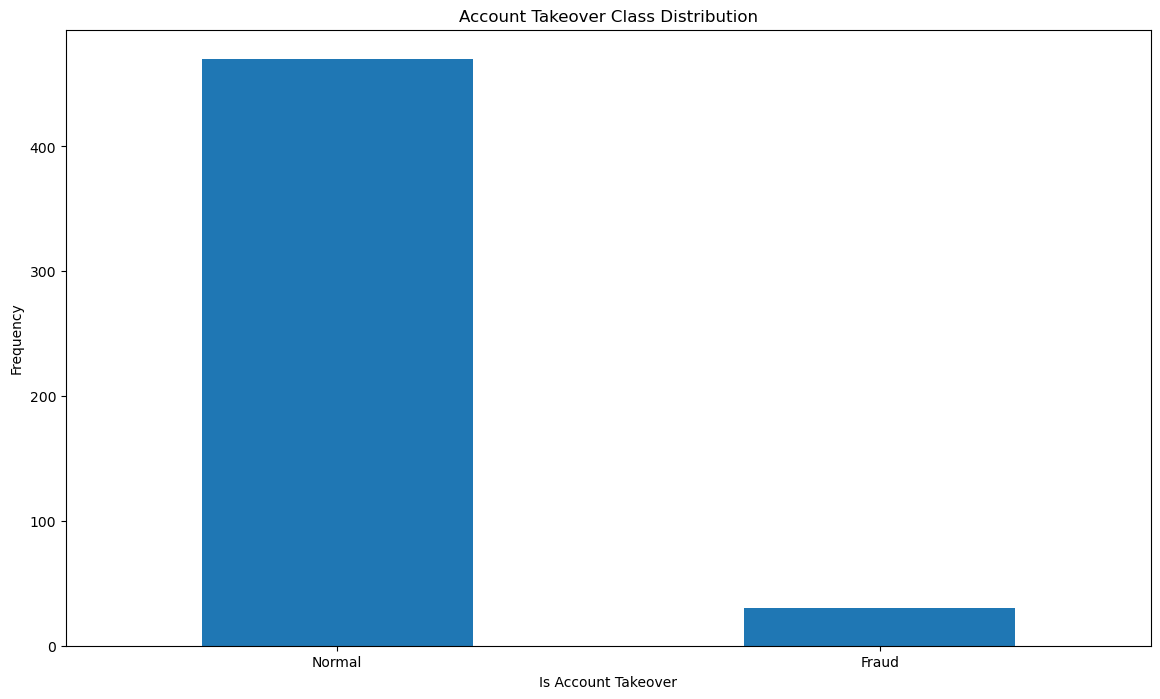

In [78]:
### iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding

In [79]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 897 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(891)
memory usage: 445.0 KB


ASN  Is Account Takeover  Is Attack IP  Login Successful  \
0  393398.0                False         False             False   
1  393398.0                False          True             False   
2  393398.0                False          True             False   
3  393398.0                False          True             False   
4  393398.0                False         False             False   

        User ID  Blacklisted  cntr_AM  cntr_AR  cntr_AU  cntr_BA  ...  \
0 -4.324476e+18         True        0        0        0        0  ...   
1  5.160438e+18         True        0        0        0        0  ...   
2  5.979296e+18         True        0        0        0        0  ...   
3 -4.324476e+18         True        0        0        0        0  ...   
4 -4.324476e+18         True        0        0        0        0  ...   

   lgnt_2021-02-28 23:56:23.148  lgnt_2021-02-28 23:56:44.382  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:57:00.409  lgnt_2021-02-28 23:57:20.002  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:58:04.017  lgnt_2021-02-28 23:58:44.011  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2021-02-28 23:59:22.608  brw_C  brw_F  brw_O  
0                             0      0      0      1  
1                             0      1      0      0  
2                             0      1      0      0  
3                             0      1      0      0  
4                             0      1      0      0  

[5 rows x 897 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 897 entries, ASN to Is Account Takeover
dtypes: bool(4), float64(2), uint8(891)
memory usage: 445.0 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 95.76%
              precision    recall  f1-score   s

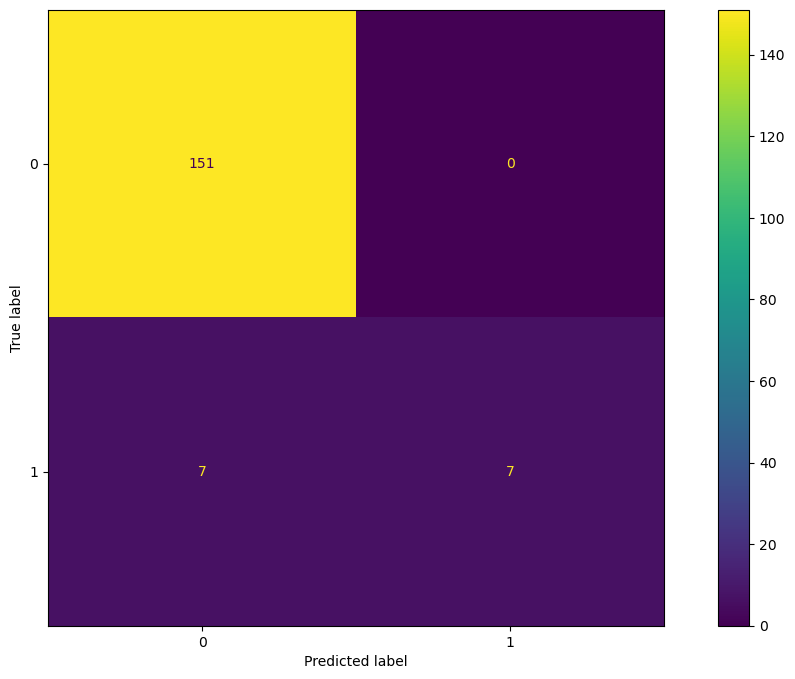

In [80]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:896]
Y = dataset.iloc[:,896 ]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 400
The number of records in the test dataset is 100
The training dataset has 376 records for the majority class and 24 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.07      0.14        94
        True       0.06      1.00      0.12         6

    accuracy                           0.13       100
   macro avg       0.53      0.54      0.13       100
weighted avg       0.94      0.13      0.14       100

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.94      1.00      0.97        94
        True       0.00      0.00      0.00         6

    accuracy                           0.94       100
   macro avg       0.47      0.50      0.48       100
weighted avg       0.88      0.94      0.91       100

[[ 7 87]
 [ 0  6]]


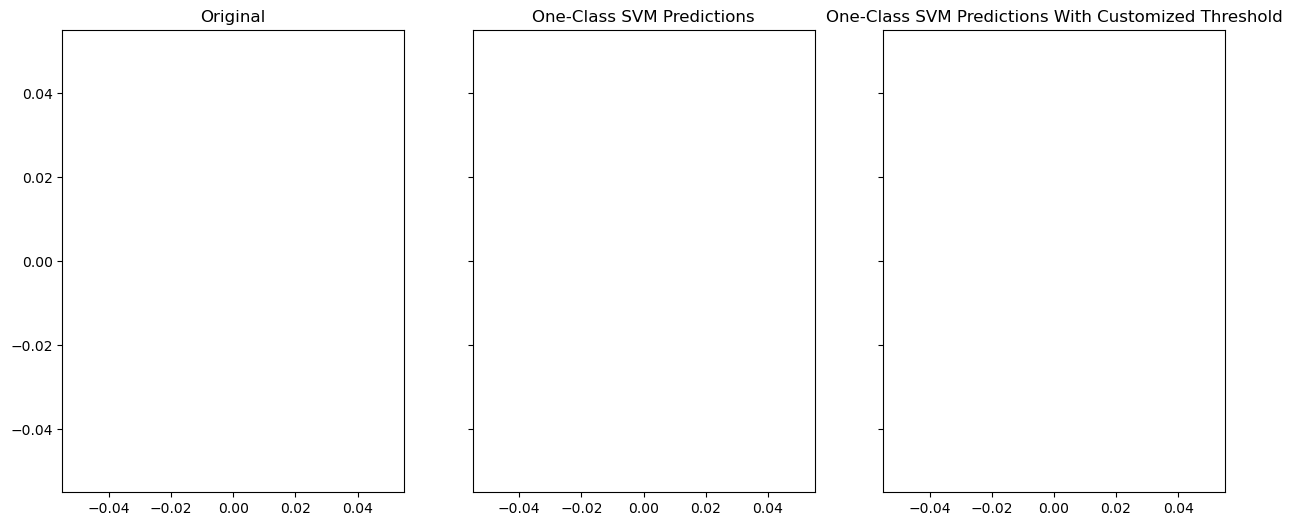

In [81]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:896]
Y = dataset.iloc[:,896]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 350
The number of records in the test dataset is 150
The training dataset has 330 records for the majority class and 20 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.24      0.38       140
        True       0.09      1.00      0.16        10

    accuracy                           0.29       150
   macro avg       0.54      0.62      0.27       150
weighted avg       0.94      0.29      0.37       150

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.93      1.00      0.97       140
        True       0.00      0.00      0.00        10

    accuracy                           0.93       150
   macro avg       0.47      0.50      0.48       150
weighted avg       0.87      0.93      0.90       150

[[ 33 107]
 [  0  10]]


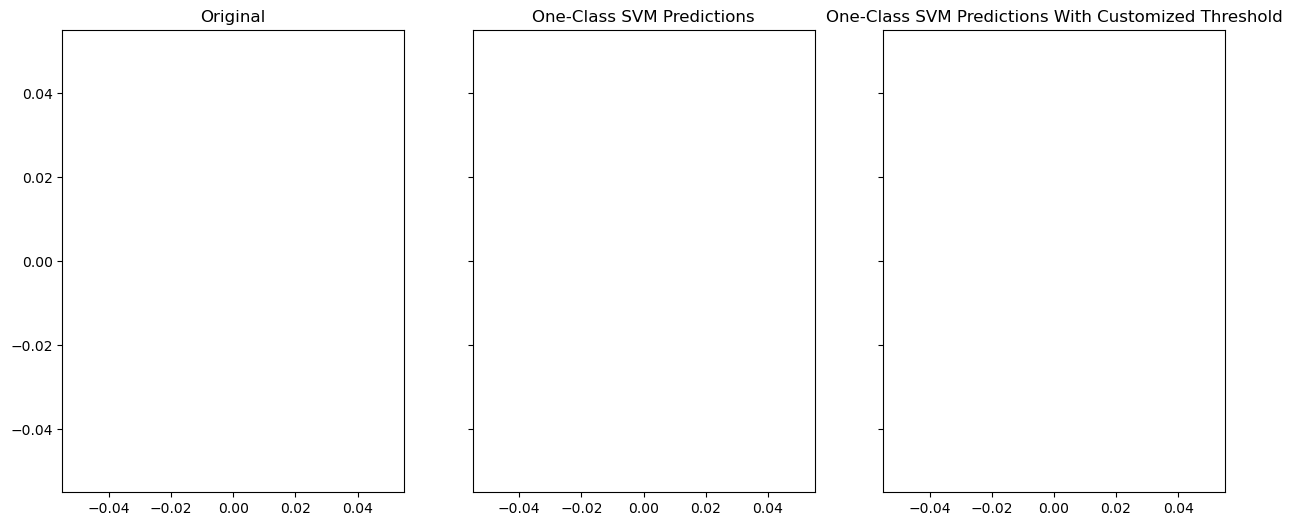

In [82]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:896]
Y = dataset.iloc[:,896]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 250
The number of records in the test dataset is 250
The training dataset has 235 records for the majority class and 15 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.03      0.06       235
        True       0.06      1.00      0.12        15

    accuracy                           0.09       250
   macro avg       0.53      0.51      0.09       250
weighted avg       0.94      0.09      0.06       250

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       235
        True       0.00      0.00      0.00        15

    accuracy                           0.94       250
   macro avg       0.47      0.50      0.48       250
weighted avg       0.88      0.94      0.91       250

[[  7 228]
 [  0  15]]


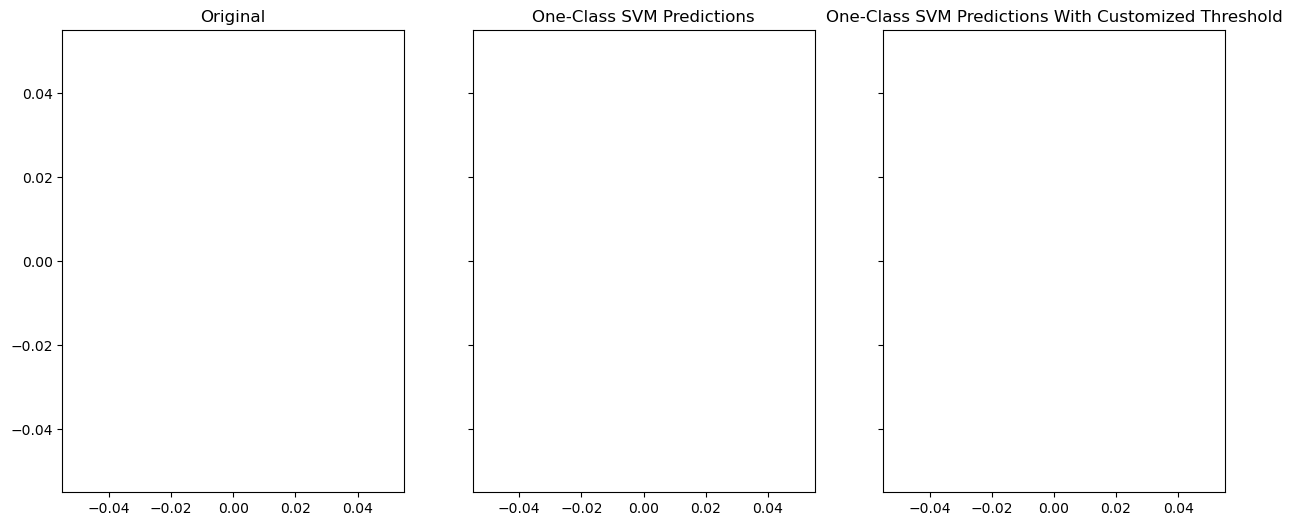

In [83]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:896]
Y = dataset.iloc[:,896]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

In [84]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Is Attack IP  Blacklisted  anomaly_scores  anomaly  Is Account Takeover
0           False         True        0.000000        1                False
1            True         True        0.048721        1                False
2            True         True        0.048721        1                False
3            True         True        0.048721        1                False
4           False         True        0.000000        1                False
..            ...          ...             ...      ...                  ...
495         False         True        0.000000        1                False
496          True        False        0.039173        1                False
497          True         True        0.048721        1                False
498         False        False        0.024002        1                False
499          True        False        0.039173        1                False

[500 rows x 5 columns]

Outlier Method: Isolation Forest
Number of anomalous values 30
Number of non anomalous values  470
Total Number of Values: 500


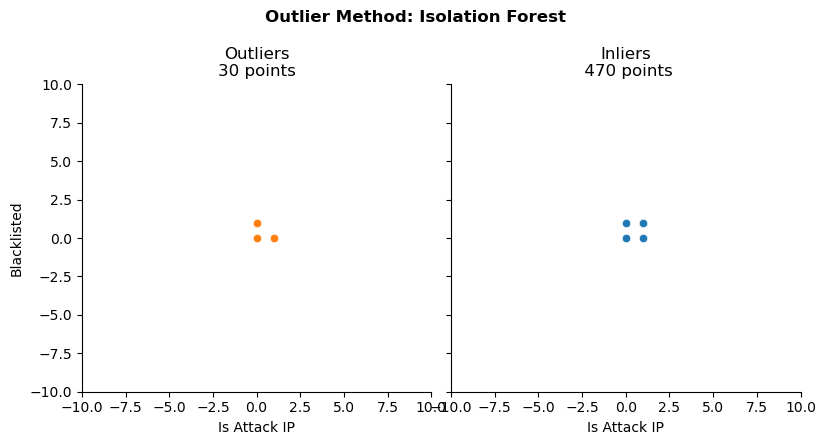

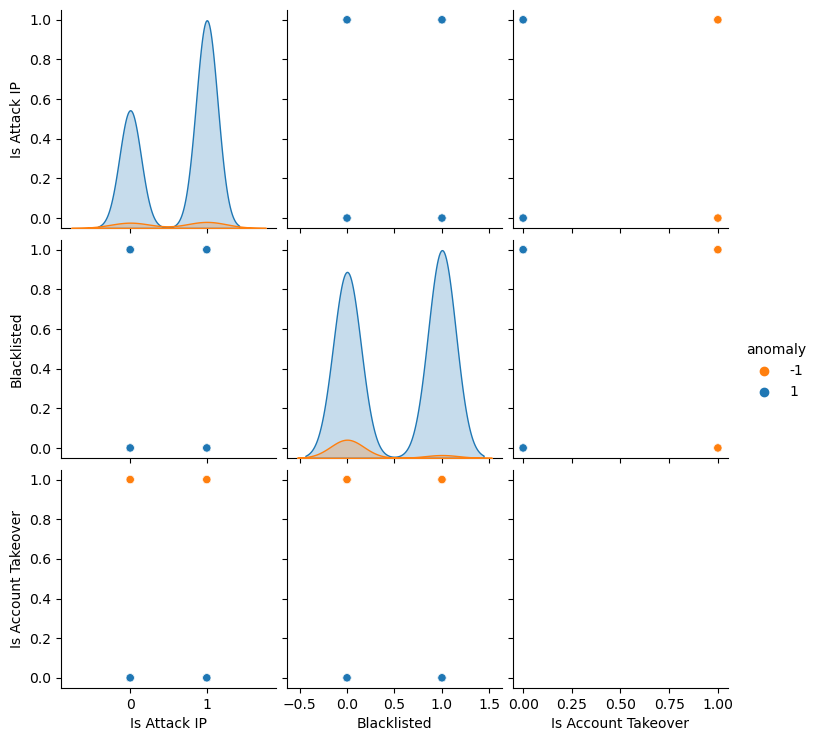

In [85]:
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 101
Number of non anomalous values  399
Total Number of Values: 500


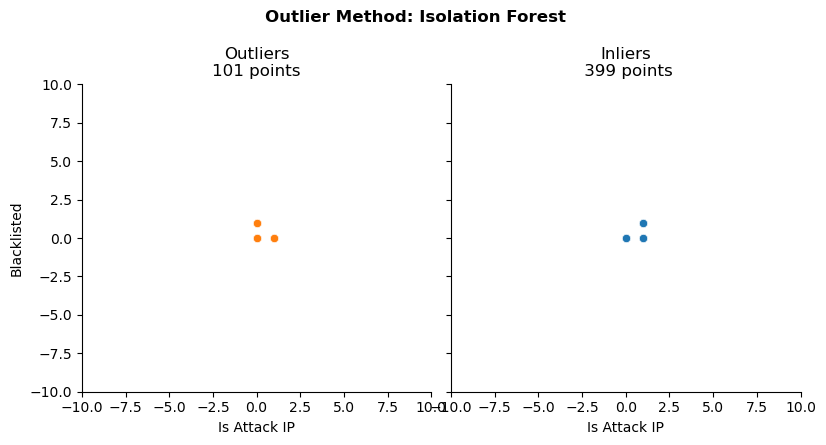

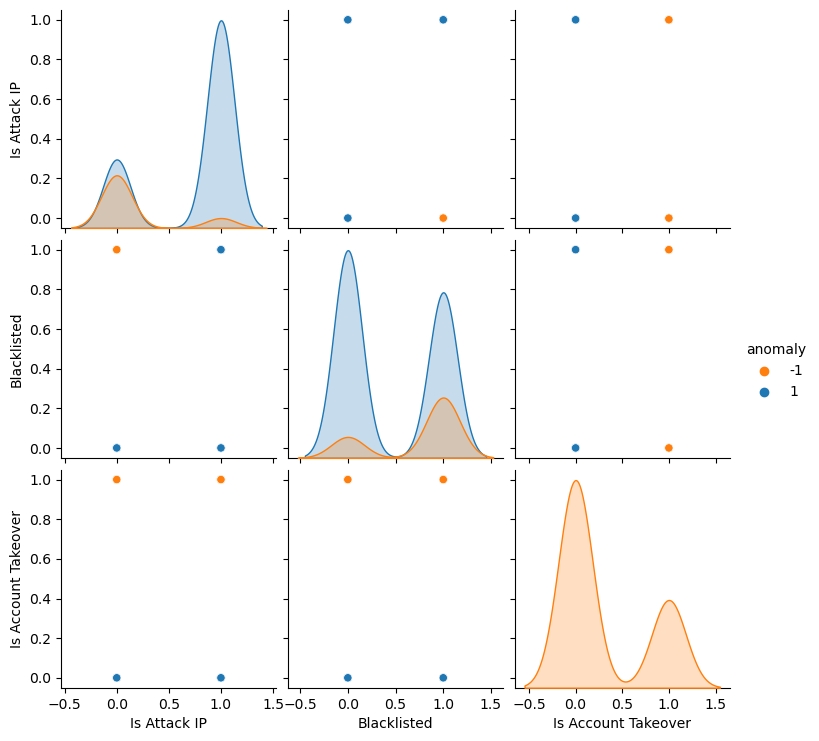

In [86]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 200
Number of non anomalous values  300
Total Number of Values: 500


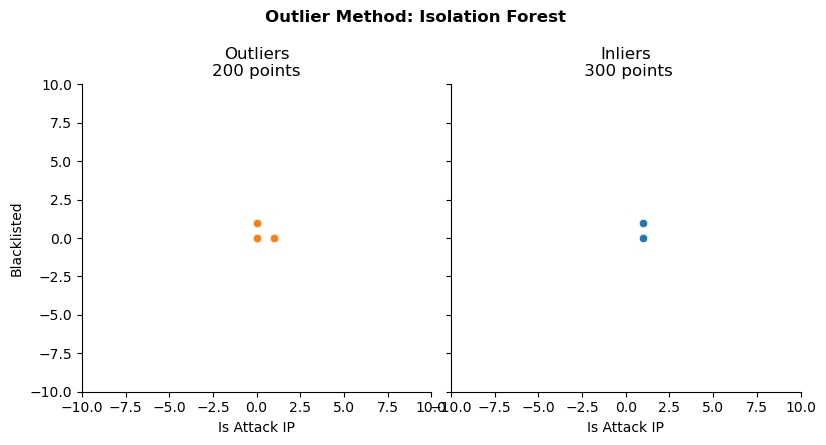

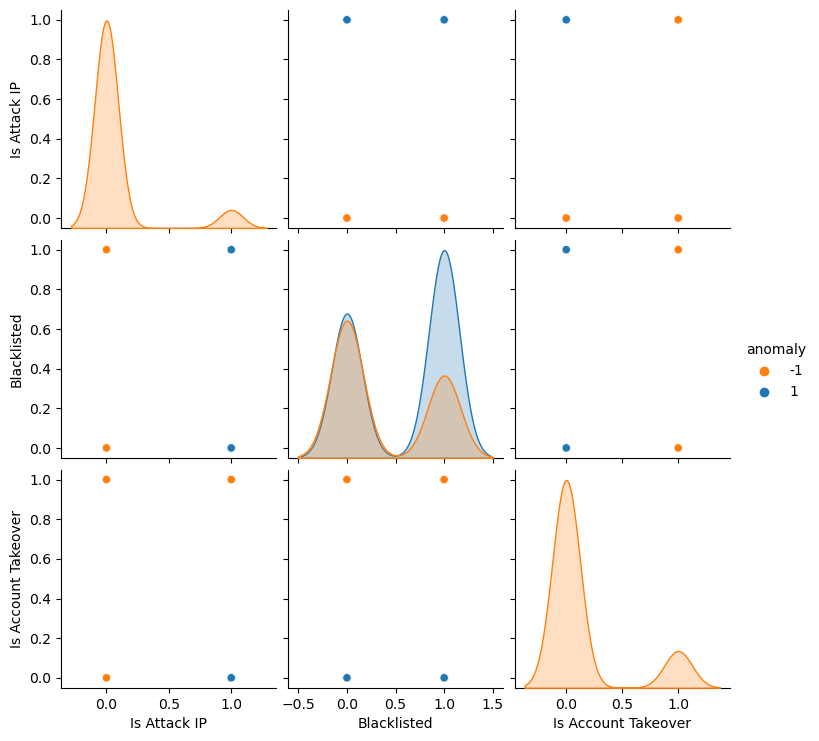

In [87]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 30
Number of non anomalous values  470
Total Number of Values: 500


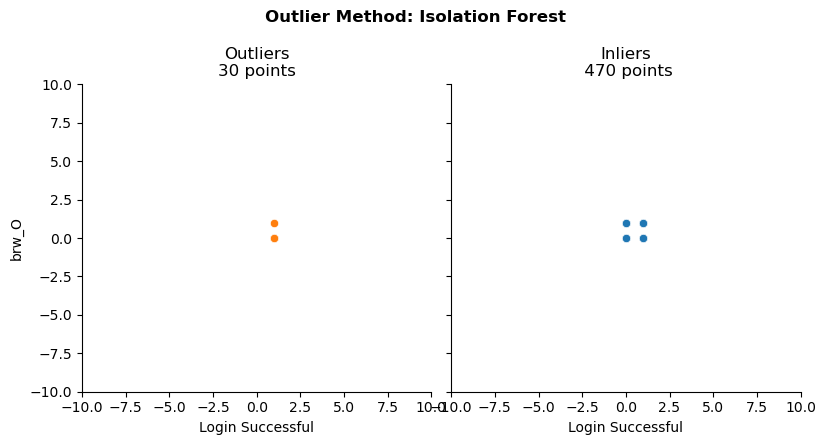

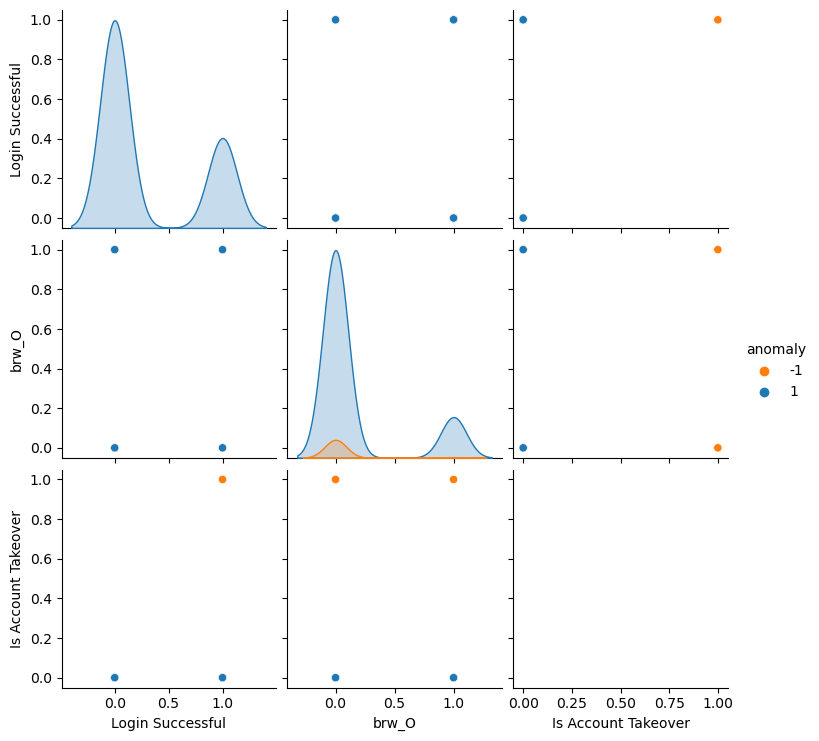

In [88]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'brw_O', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'brw_O','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 107
Number of non anomalous values  393
Total Number of Values: 500


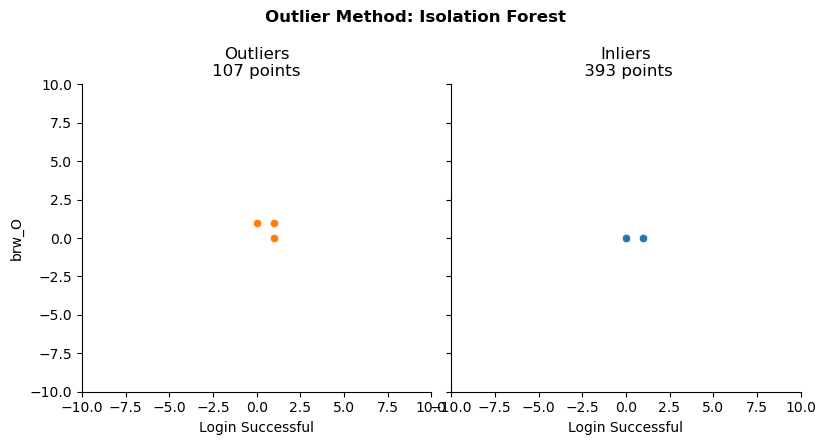

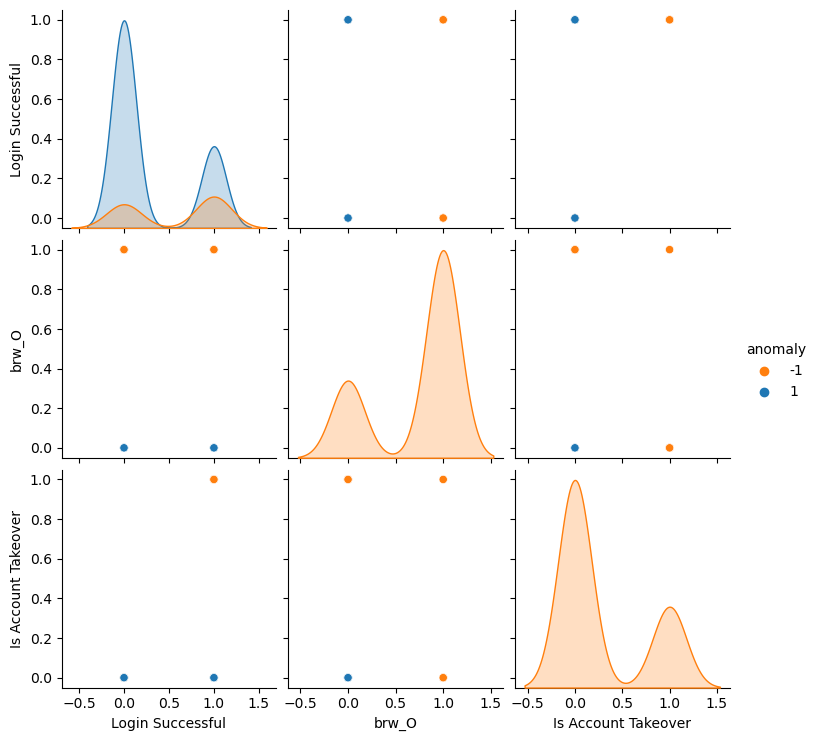

In [89]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 218
Number of non anomalous values  282
Total Number of Values: 500


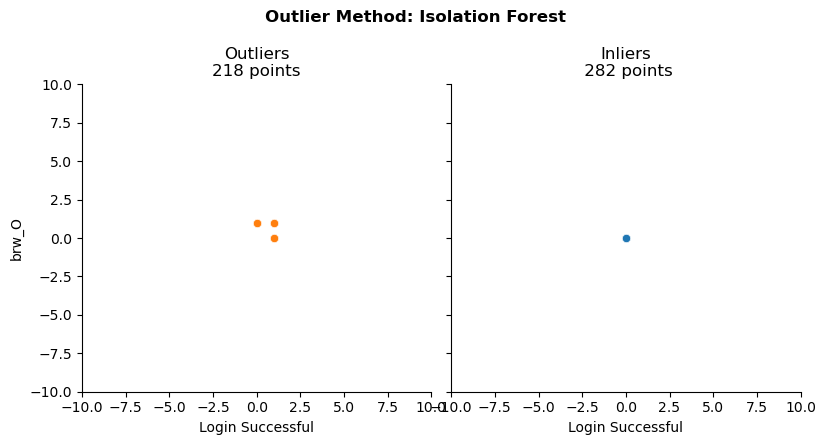

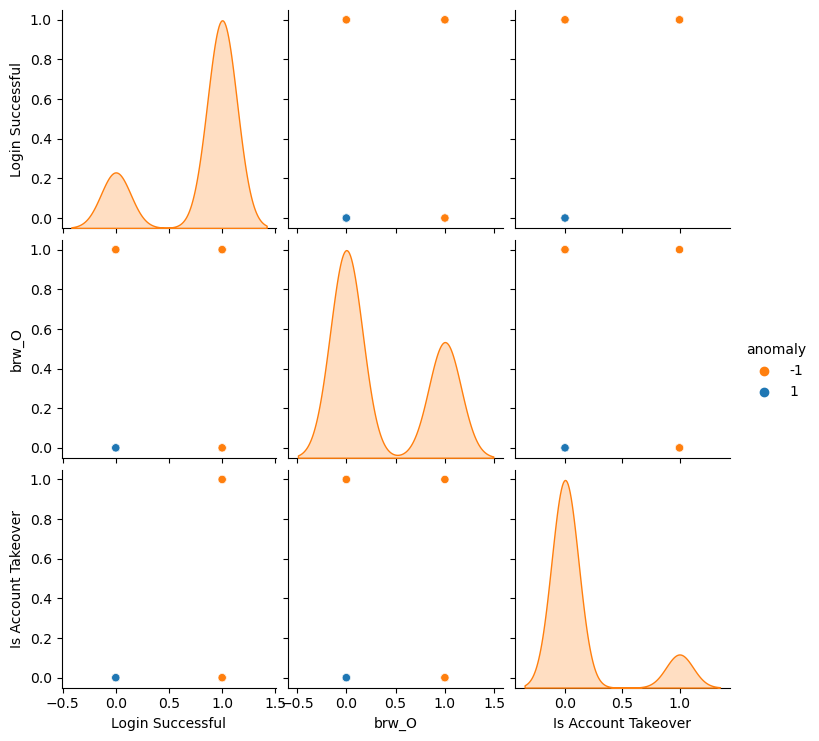

In [90]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 30
Number of non anomalous values  470
Total Number of Values: 500


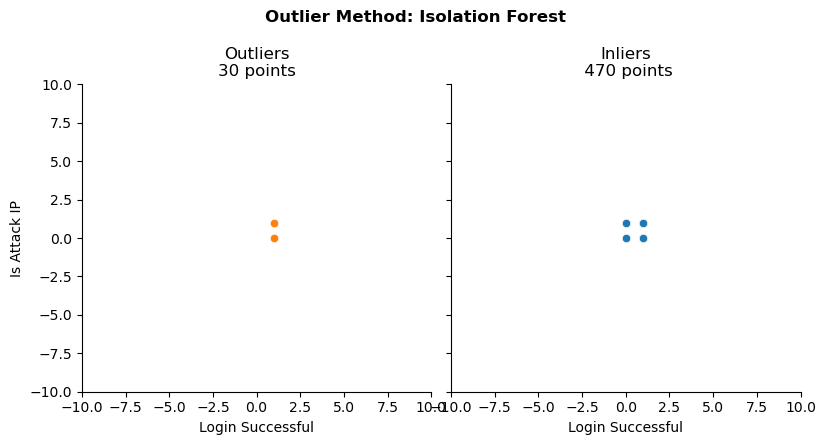

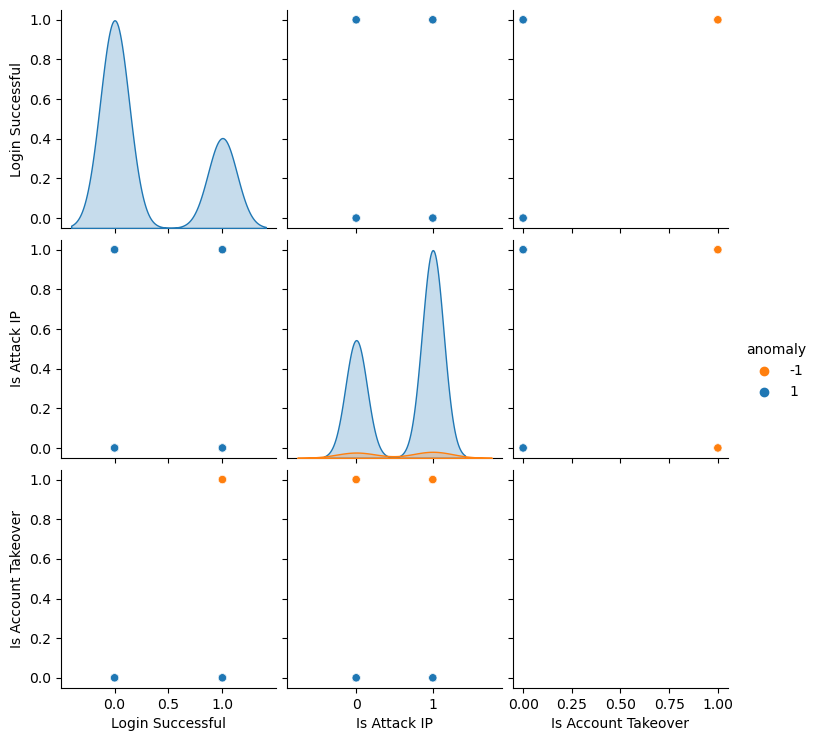

In [91]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 93
Number of non anomalous values  407
Total Number of Values: 500


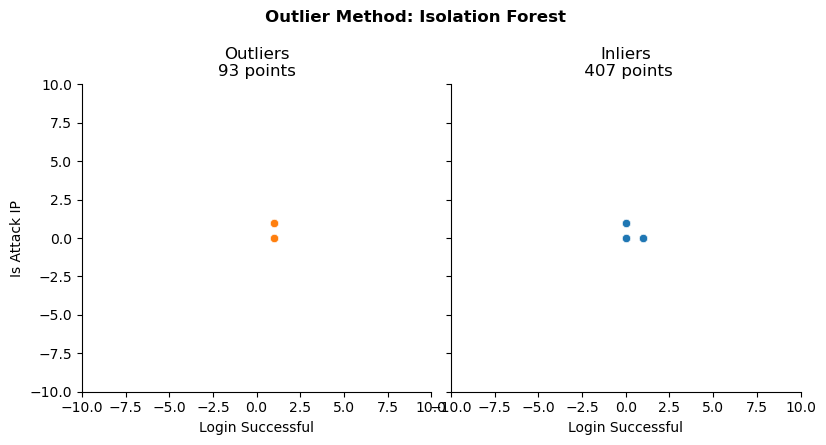

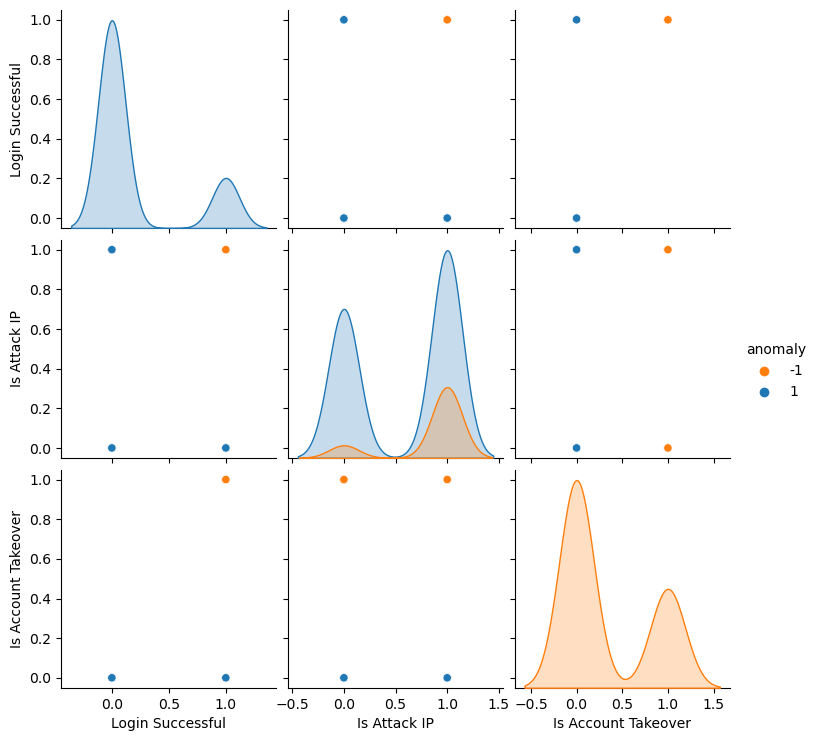

In [92]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 184
Number of non anomalous values  316
Total Number of Values: 500


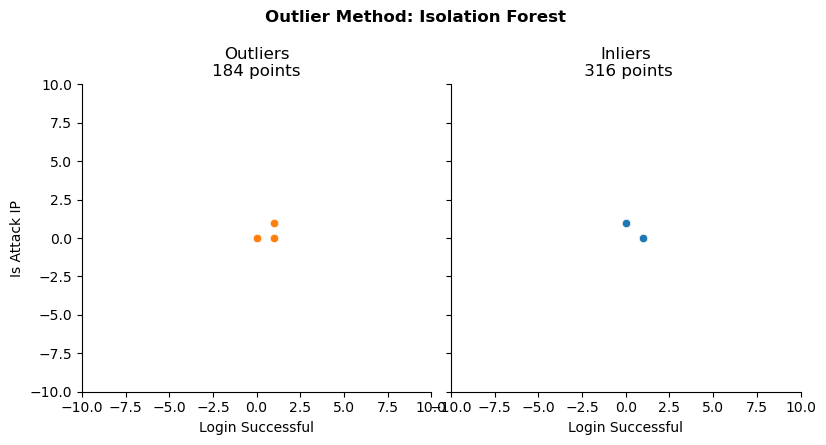

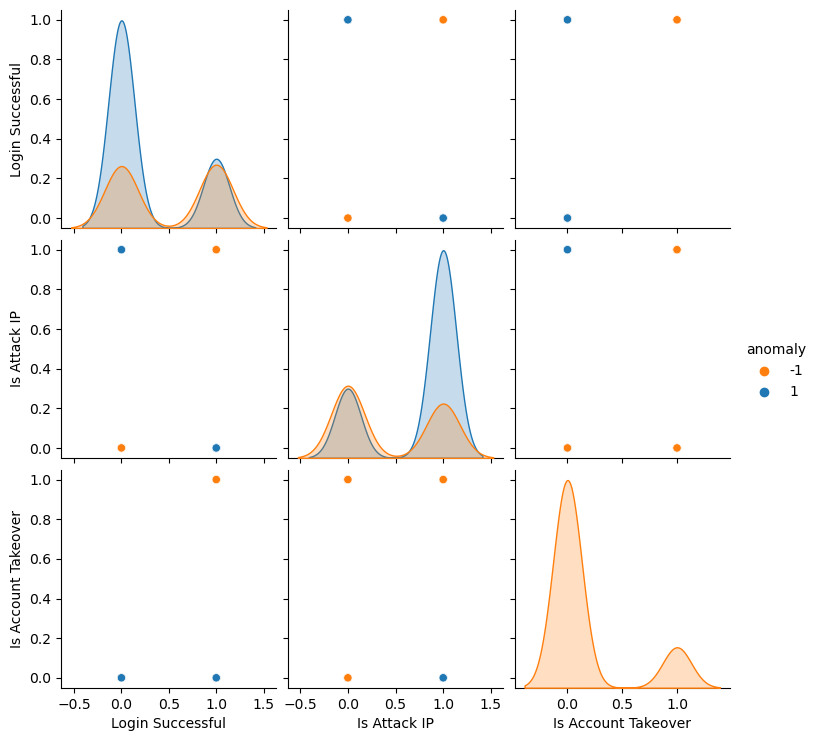

In [93]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(30, 897) (470, 897)
(500, 896)
(500,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 54
Accuracy Score :
0.892
Classification Report :
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       470
        True       0.12      0.13      0.13        30

    accuracy                           0.89       500
   macro avg       0.53      0.54      0.54       500
weighted avg       0.90      0.89      0.89       500

Local Outlier Factor: 54
Accuracy Score :
0.892
Classification Report :
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       470
        True       0.12      0.13      0.13        30

    accuracy                           0.89       500
   macro avg       0.53      0.54      0.54       500
weighted avg       0.90      0.89      0.89       500

Support Vector Machine: 340
Accuracy Score :
0.32
Classification Report :
              precision    recall  f1-score   support

       False       0.86      0.33      0.48       470
        True       0.02

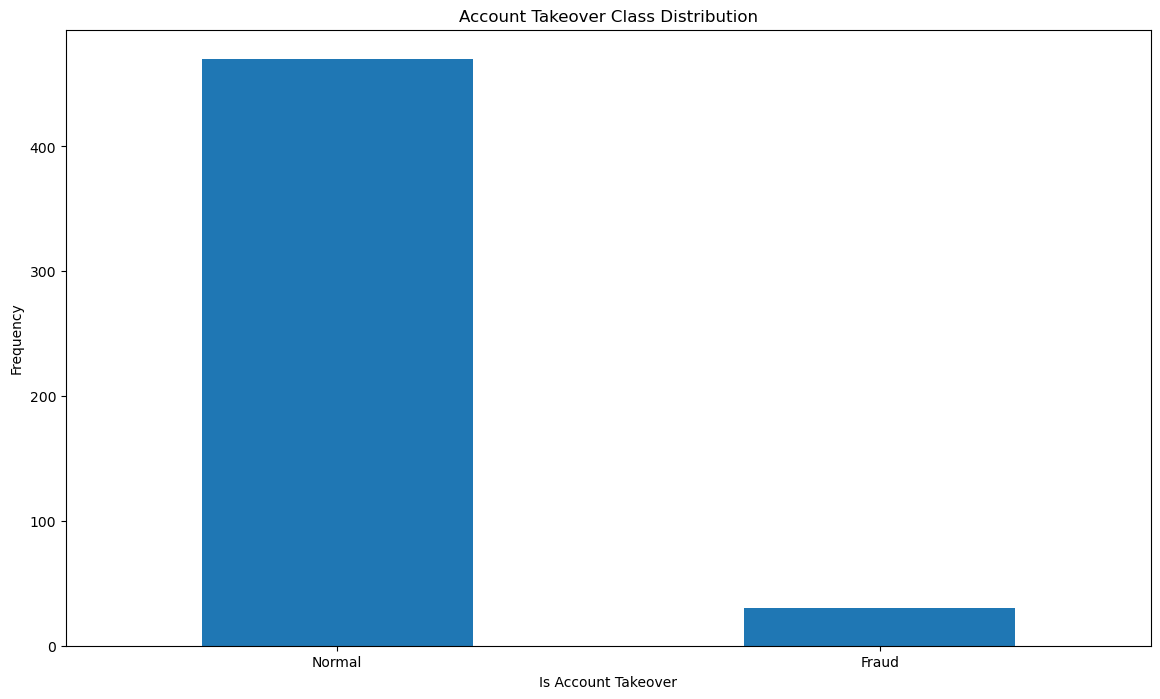

In [94]:
# iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

## New dataset with divide in ['Is Attack IP'] == True & ['Is Account Takeover'] == True 
### 77/500 ATO

In [95]:
import pandas as pd

attackAndTakeover = pd.read_csv('divided-chunks/attackAndTakeover77.csv')
restAttackAndTakeover = pd.read_csv('divided-chunks/restAttackAndTakeover31269187.csv')

In [96]:
import numpy as np

attackAndTakeover['Login Timestamp'] =  pd.to_datetime(attackAndTakeover['Login Timestamp'], infer_datetime_format=True)
restAttackAndTakeover['Login Timestamp'] =  pd.to_datetime(restAttackAndTakeover['Login Timestamp'], infer_datetime_format=True)

restAttackAndTakeover.dropna(axis = 0, how = 'all', inplace = True)
attackAndTakeover.dropna(axis = 0, how = 'all', inplace = True)

attackAndTakeover['IP Address'] = attackAndTakeover['IP Address'].apply(lambda x: str(x))
attackAndTakeover = attackAndTakeover.reset_index(drop=True)
restAttackAndTakeover['IP Address'] = restAttackAndTakeover['IP Address'].apply(lambda x: str(x))
restAttackAndTakeover = restAttackAndTakeover.reset_index(drop=True)

searchfor = ['CN', 'VN', 'RU', 'BR', 'US', 'IN', 'IR', 'ID', 'KR', 'TW', 'FR', 'UA']
attackAndTakeover["Blacklisted"] = np.where(attackAndTakeover["Country"].str.contains('|'.join(searchfor)), True, False)
cleanup_devices = {"Device Type": {"tablet": "T", "mobile": "M", "desktop": "D", "bot": "B", "unknown": "U", np.nan: "NAN"}}
attackAndTakeover = attackAndTakeover.replace(cleanup_devices)
restAttackAndTakeover["Blacklisted"] = np.where(restAttackAndTakeover["Country"].str.contains('|'.join(searchfor)), True, False)
restAttackAndTakeover = restAttackAndTakeover.replace(cleanup_devices)

attackAndTakeover["Browser Type"] = (np.where(attackAndTakeover["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(attackAndTakeover["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
attackAndTakeover = attackAndTakeover.replace(cleanup_browser)
restAttackAndTakeover["Browser Type"] = (np.where(restAttackAndTakeover["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(restAttackAndTakeover["Browser Name and Version"].str.contains('Chrome'), 1, 0))
restAttackAndTakeover = restAttackAndTakeover.replace(cleanup_browser)

In [97]:
attackAndTakeover.drop("OS Name and Version", inplace=True, axis=1)
attackAndTakeover.drop("Browser Name and Version", inplace=True, axis=1)

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    attackAndTakeover[col] = attackAndTakeover[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    attackAndTakeover[col] = attackAndTakeover[col].astype('bool')

restAttackAndTakeover.drop("OS Name and Version", inplace=True, axis=1)
restAttackAndTakeover.drop("Browser Name and Version", inplace=True, axis=1)

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    restAttackAndTakeover[col] = restAttackAndTakeover[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    restAttackAndTakeover[col] = restAttackAndTakeover[col].astype('bool')


In [98]:
attackAndTakeover.info()
restAttackAndTakeover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      77 non-null     category
 1   User ID              77 non-null     int64   
 2   IP Address           77 non-null     category
 3   Country              77 non-null     category
 4   ASN                  77 non-null     int64   
 5   Device Type          77 non-null     category
 6   Login Successful     77 non-null     bool    
 7   Is Attack IP         77 non-null     bool    
 8   Is Account Takeover  77 non-null     bool    
 9   Blacklisted          77 non-null     bool    
 10  Browser Type         77 non-null     category
dtypes: bool(4), category(5), int64(2)
memory usage: 7.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31269187 entries, 0 to 31269186
Data columns (total 11 columns):
 #   Column               Dtype   
---  ------             

In [99]:
df = pd.concat([attackAndTakeover, restAttackAndTakeover.head(423)], ignore_index=True, sort=False)
# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)

df1 = df.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      500 non-null    category
 1   User ID              500 non-null    int64   
 2   IP Address           500 non-null    category
 3   Country              500 non-null    category
 4   ASN                  500 non-null    int64   
 5   Device Type          500 non-null    category
 6   Login Successful     500 non-null    bool    
 7   Is Attack IP         500 non-null    bool    
 8   Is Account Takeover  500 non-null    bool    
 9   Blacklisted          500 non-null    bool    
 10  Browser Type         500 non-null    category
dtypes: bool(4), category(5), int64(2)
memory usage: 54.2 KB


# Experimental XGBoost

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      500 non-null    category
 1   User ID              500 non-null    int64   
 2   IP Address           500 non-null    category
 3   Country              500 non-null    category
 4   ASN                  500 non-null    int64   
 5   Device Type          500 non-null    category
 6   Login Successful     500 non-null    bool    
 7   Is Attack IP         500 non-null    bool    
 8   Blacklisted          500 non-null    bool    
 9   Browser Type         500 non-null    category
 10  Is Account Takeover  500 non-null    bool    
dtypes: bool(4), category(5), int64(2)
memory usage: 54.2 KB
Feature importances:
[0.5381381  0.00136504 0.         0.22627188 0.04183649 0.00924834
 0.04554712 0.13759302 0.         0.        ]


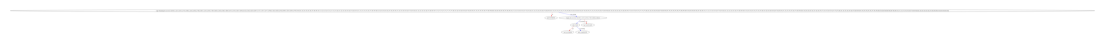

In [100]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model-attack-or-takeover.json")
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("caterogical-model-graph-attack-or-takeover.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
print("Feature importances:")
print(clf.feature_importances_)

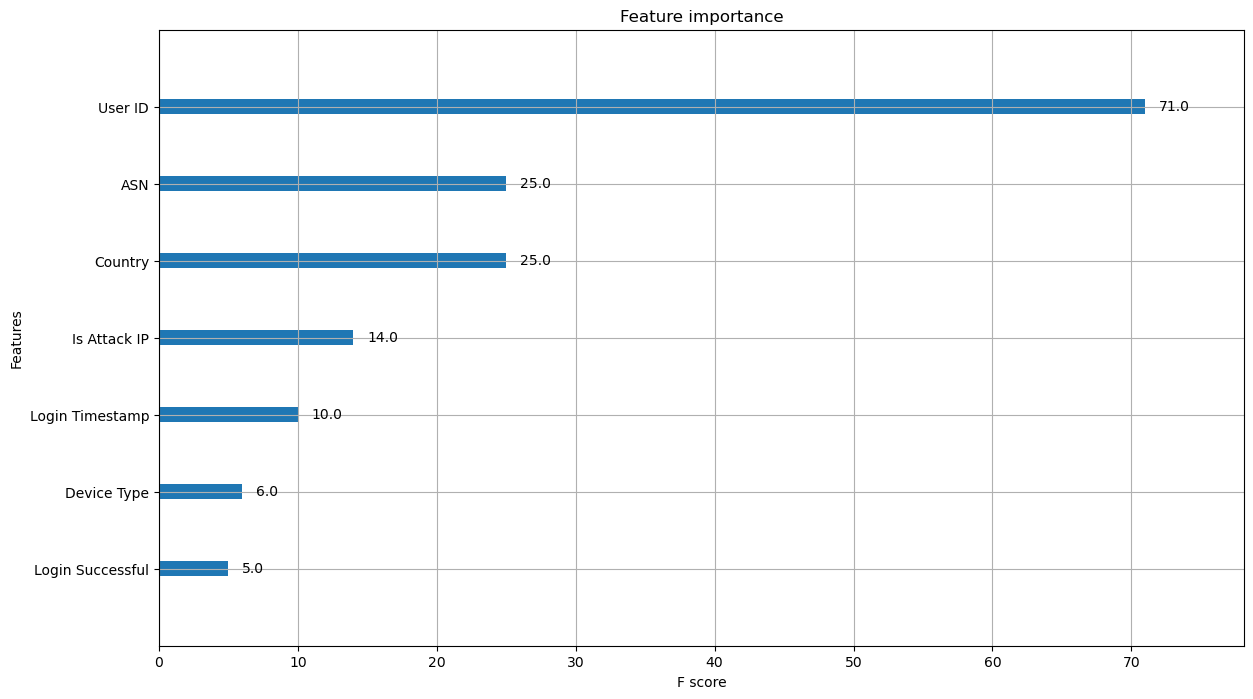

In [101]:
plot_importance(clf)
pyplot.show()

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [102]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      500 non-null    int16
 1   User ID              500 non-null    int64
 2   IP Address           500 non-null    int16
 3   Country              500 non-null    int8 
 4   ASN                  500 non-null    int64
 5   Device Type          500 non-null    int8 
 6   Login Successful     500 non-null    bool 
 7   Is Attack IP         500 non-null    bool 
 8   Is Account Takeover  500 non-null    bool 
 9   Blacklisted          500 non-null    bool 
 10  Browser Type         500 non-null    int8 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 13.3 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      500 non-null    int16
 1   User ID              500 non-null    int64
 2   IP Address           500 non-null    int16
 3   Country              500 non-null    int8 
 4   ASN                  500 non-null    int64
 5   Device Type          500 non-null    int8 
 6   Login Successful     500 non-null    bool 
 7   Is Attack IP         500 non-null    bool 
 8   Blacklisted          500 non-null    bool 
 9   Browser Type         500 non-null    int8 
 10  Is Account Takeover  500 non-null    bool 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 13.3 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              ena

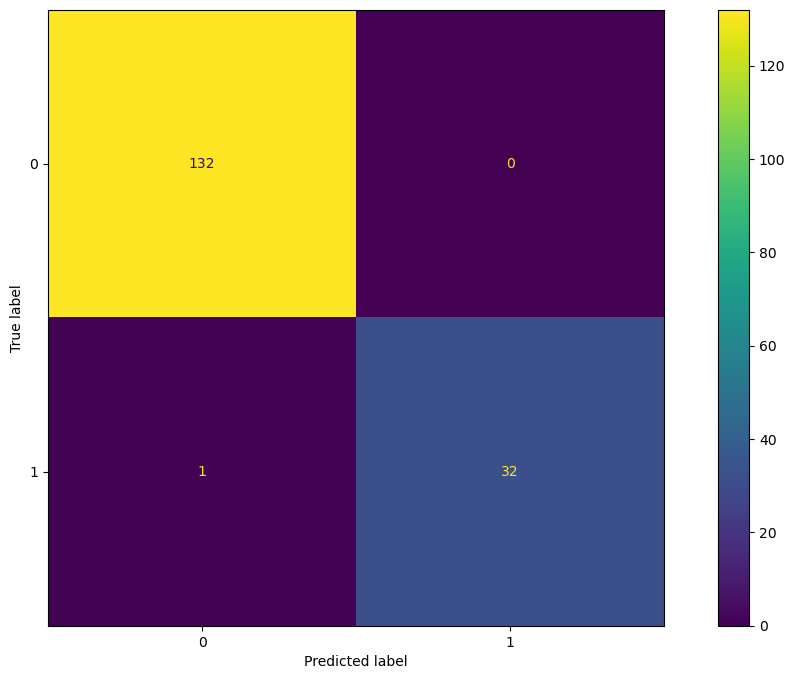

In [103]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 400
The number of records in the test dataset is 100
The training dataset has 339 records for the majority class and 61 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.16      1.00      0.28        16

    accuracy                           0.16       100
   macro avg       0.08      0.50      0.14       100
weighted avg       0.03      0.16      0.04       100

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.84      1.00      0.91        84
        True       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100

[[ 0 84]
 [ 0 16]]


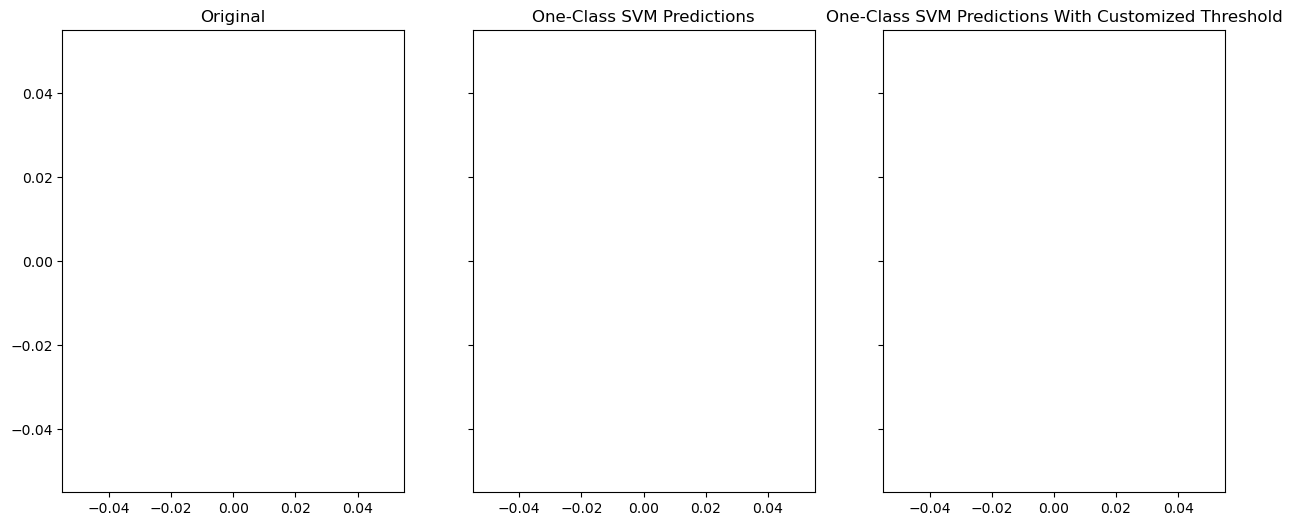

In [104]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 350
The number of records in the test dataset is 150
The training dataset has 291 records for the majority class and 59 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       132
        True       0.12      1.00      0.21        18

    accuracy                           0.12       150
   macro avg       0.06      0.50      0.11       150
weighted avg       0.01      0.12      0.03       150

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.88      1.00      0.94       132
        True       0.00      0.00      0.00        18

    accuracy                           0.88       150
   macro avg       0.44      0.50      0.47       150
weighted avg       0.77      0.88      0.82       150

[[  0 132]
 [  0  18]]


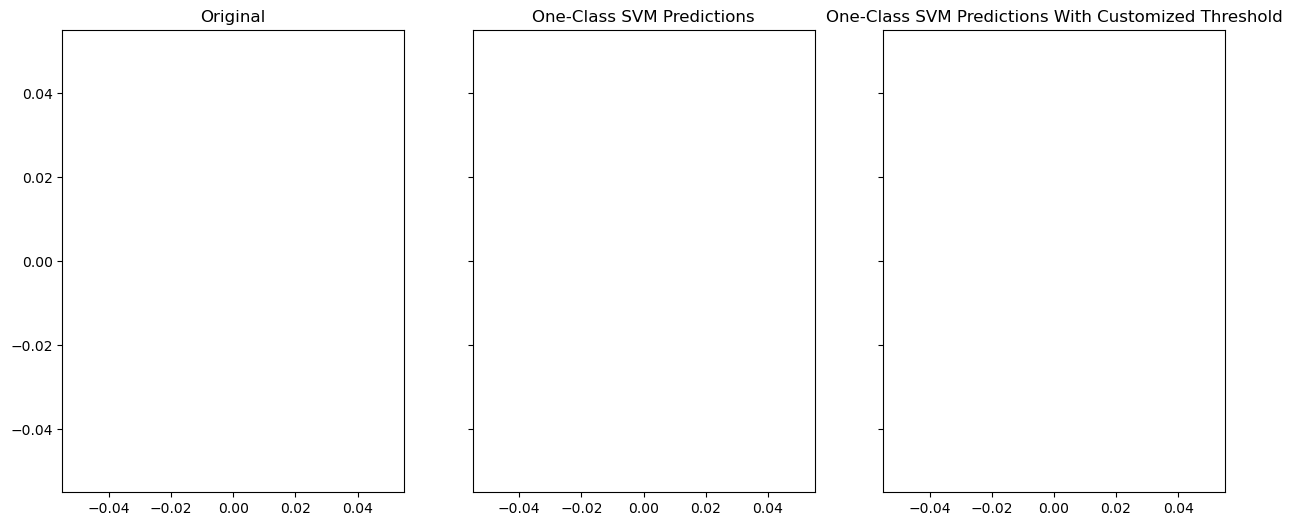

In [105]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 250
The number of records in the test dataset is 250
The training dataset has 206 records for the majority class and 44 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       217
        True       0.13      1.00      0.23        33

    accuracy                           0.13       250
   macro avg       0.07      0.50      0.12       250
weighted avg       0.02      0.13      0.03       250

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.87      1.00      0.93       217
        True       0.00      0.00      0.00        33

    accuracy                           0.87       250
   macro avg       0.43      0.50      0.46       250
weighted avg       0.75      0.87      0.81       250

[[  0 217]
 [  0  33]]


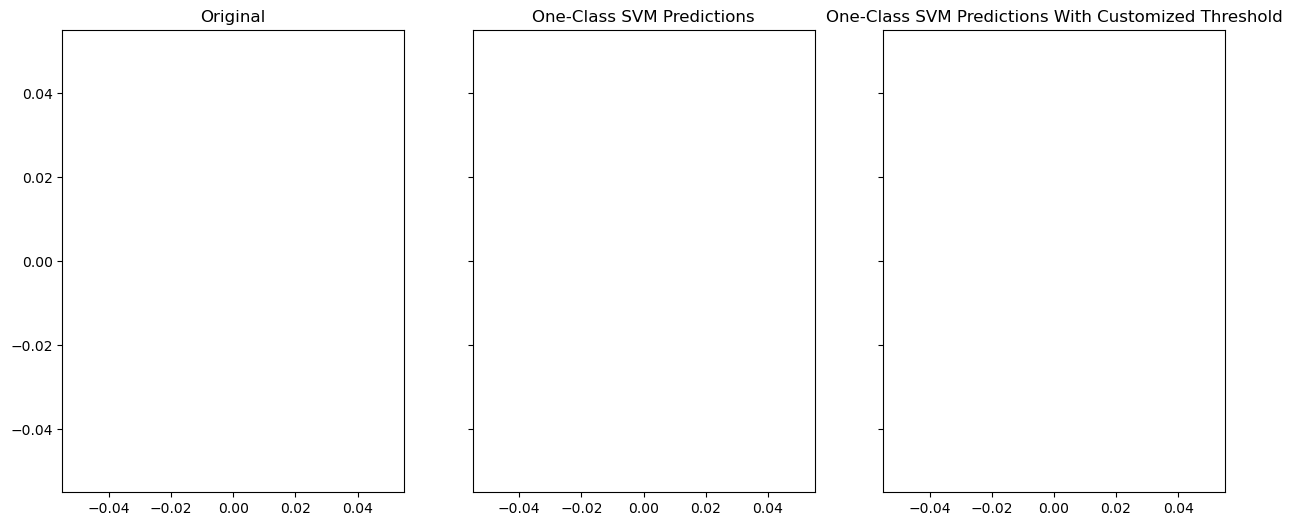

In [106]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 37
Number of non anomalous values  463
Total Number of Values: 500


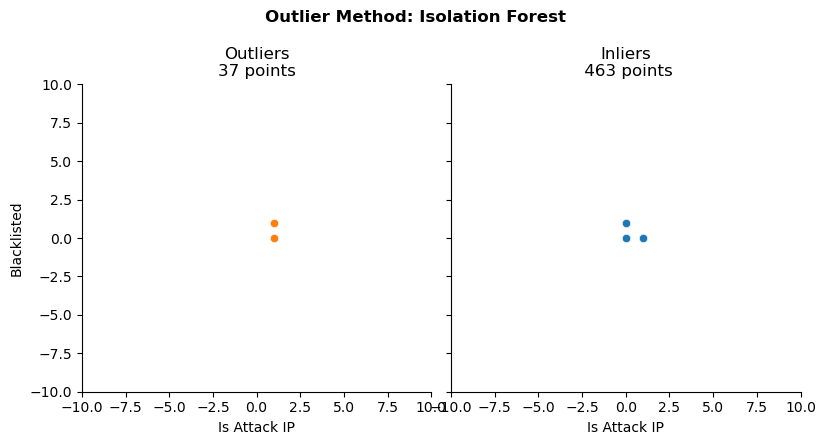

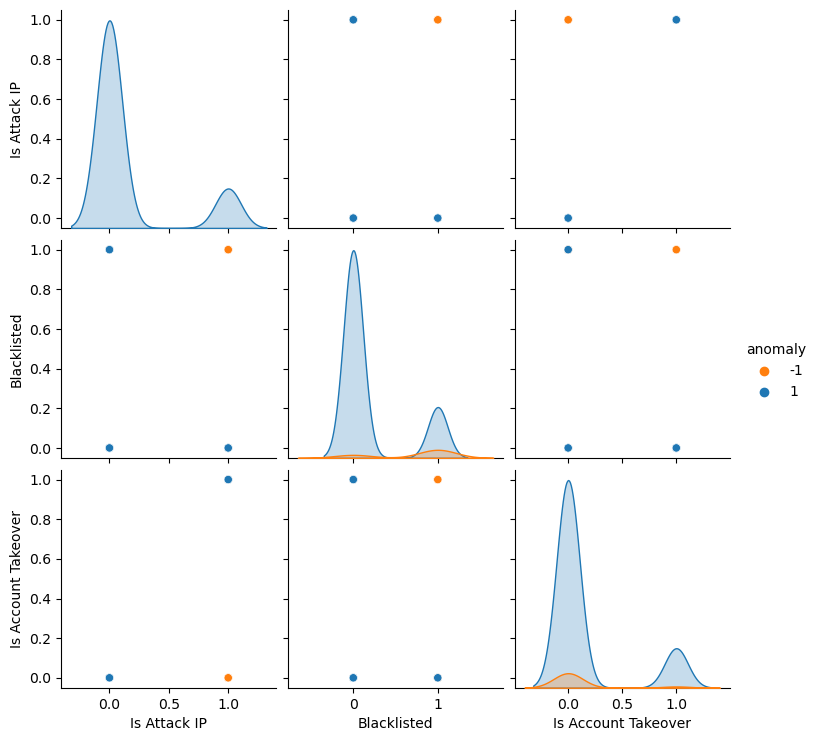

In [107]:
# Isolation Forest

# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


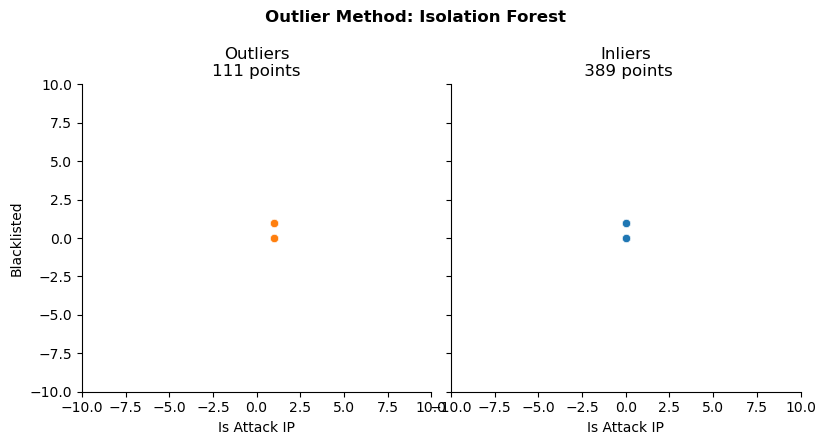

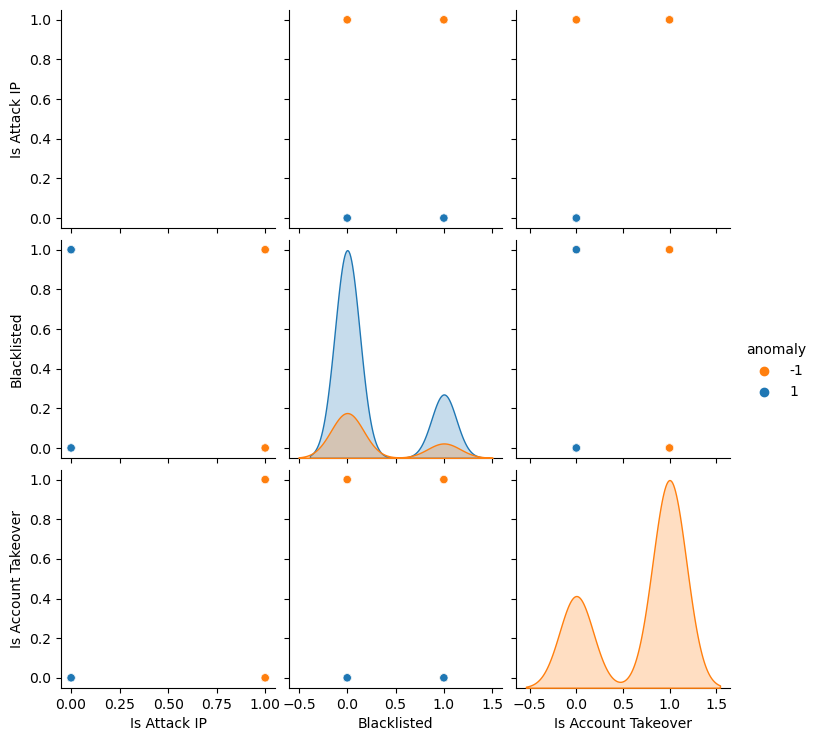

In [108]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 202
Number of non anomalous values  298
Total Number of Values: 500


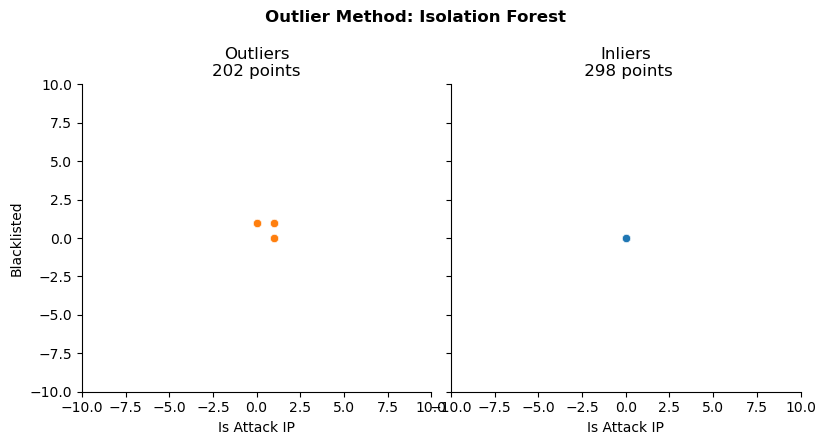

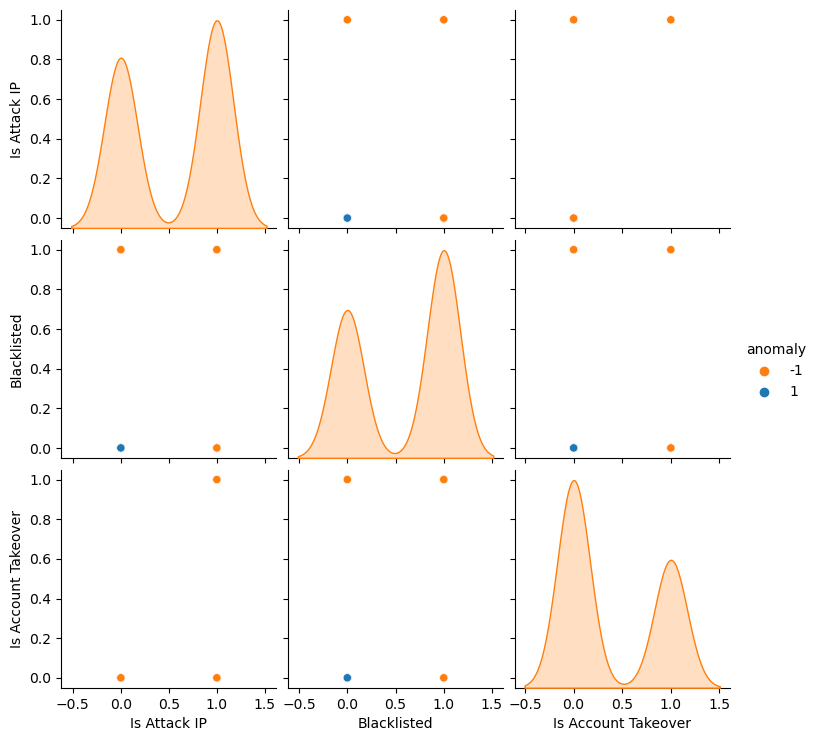

In [109]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28
Number of non anomalous values  472
Total Number of Values: 500


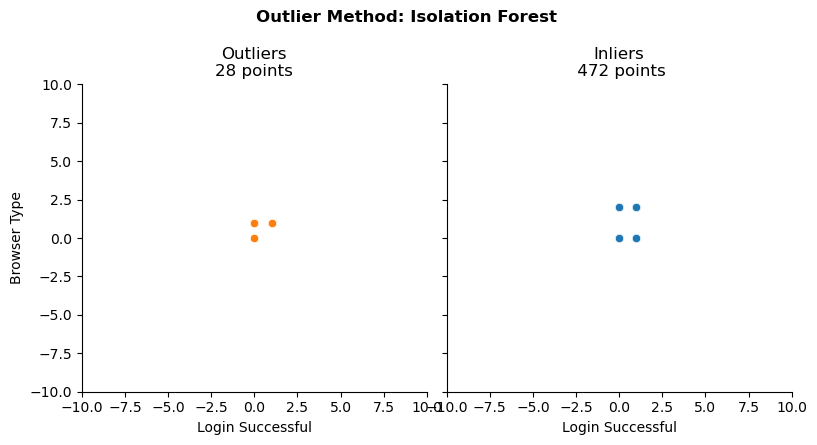

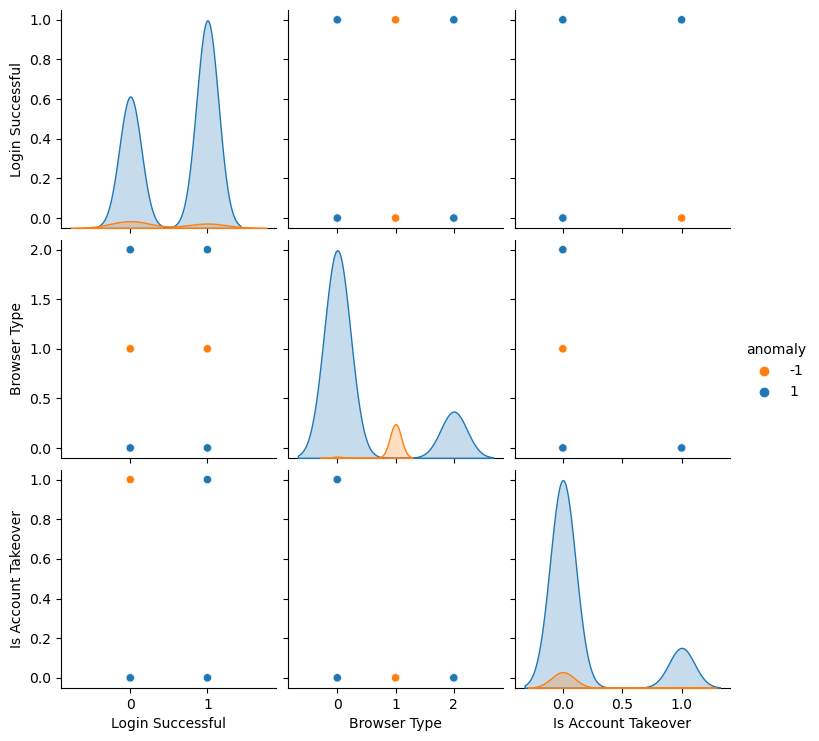

In [110]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Browser Type', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Browser Type','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 114
Number of non anomalous values  386
Total Number of Values: 500


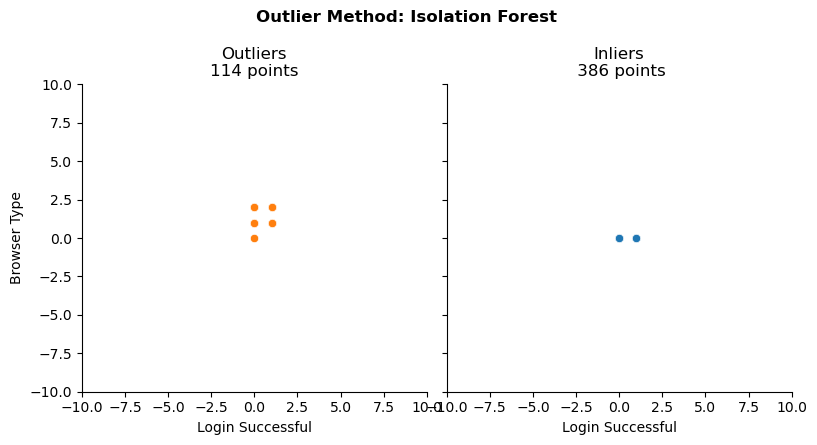

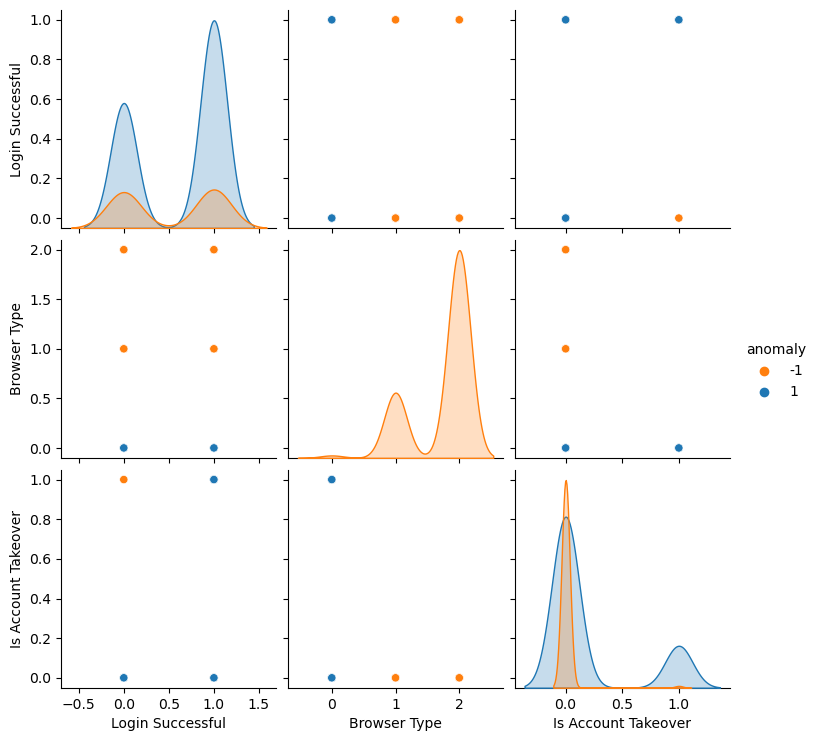

In [111]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 114
Number of non anomalous values  386
Total Number of Values: 500


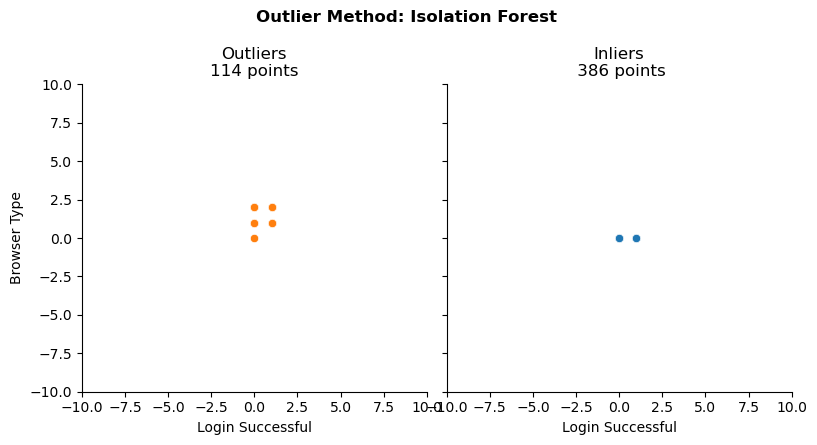

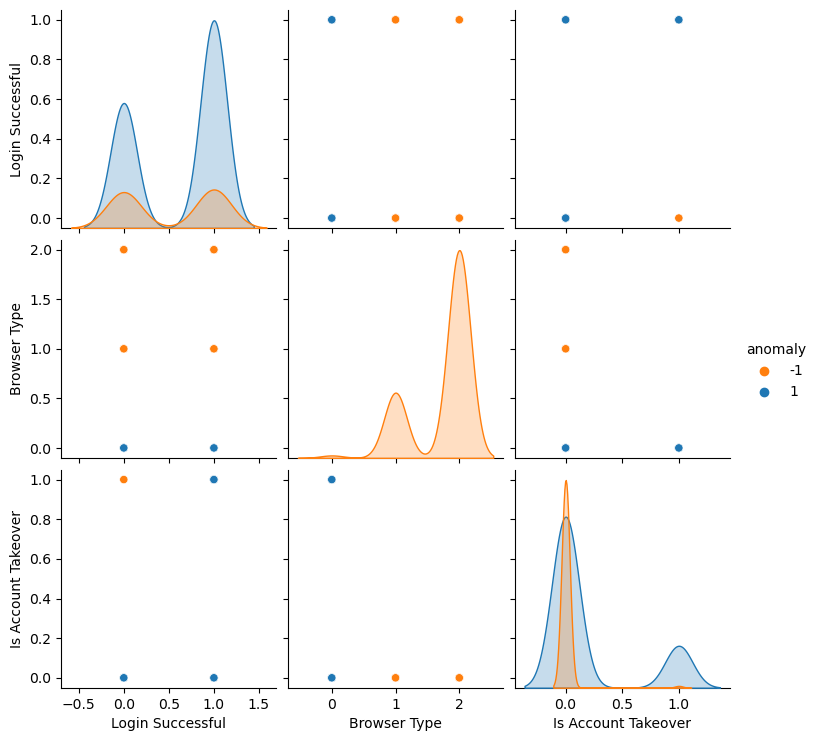

In [112]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 35
Number of non anomalous values  465
Total Number of Values: 500


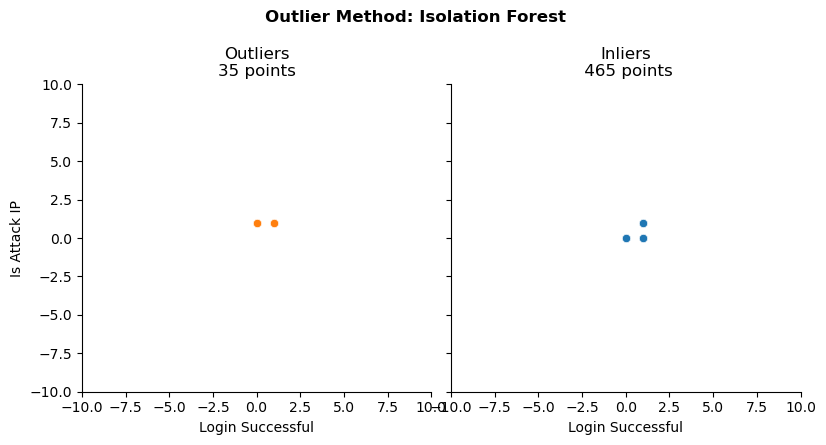

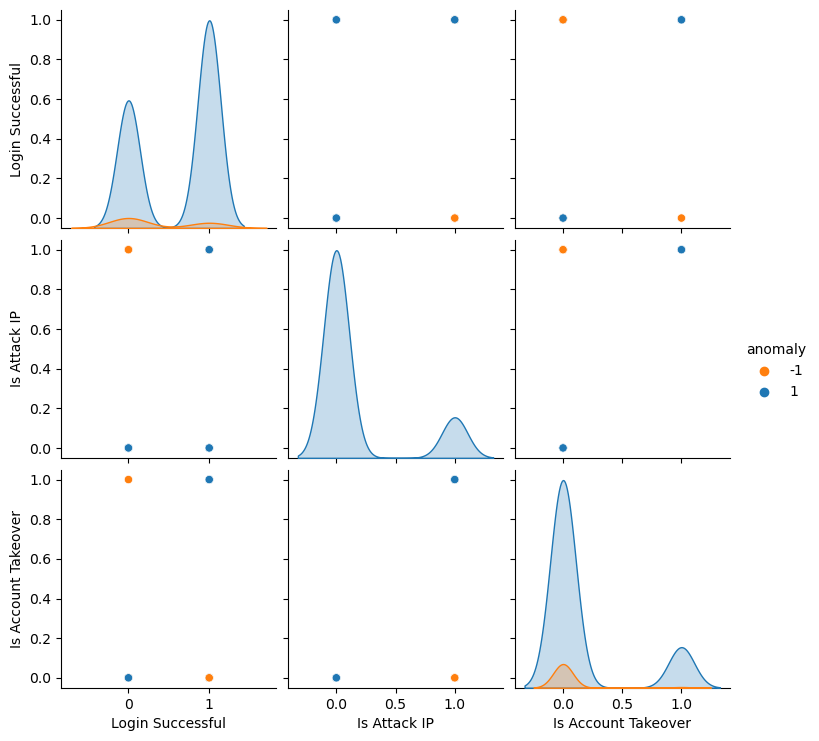

In [113]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


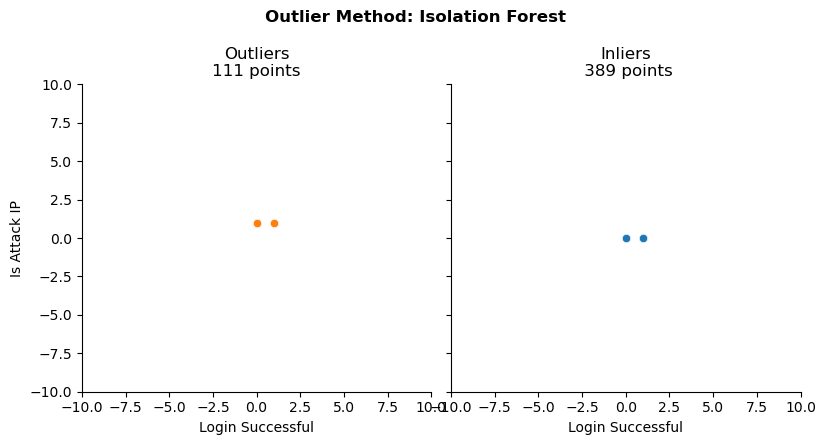

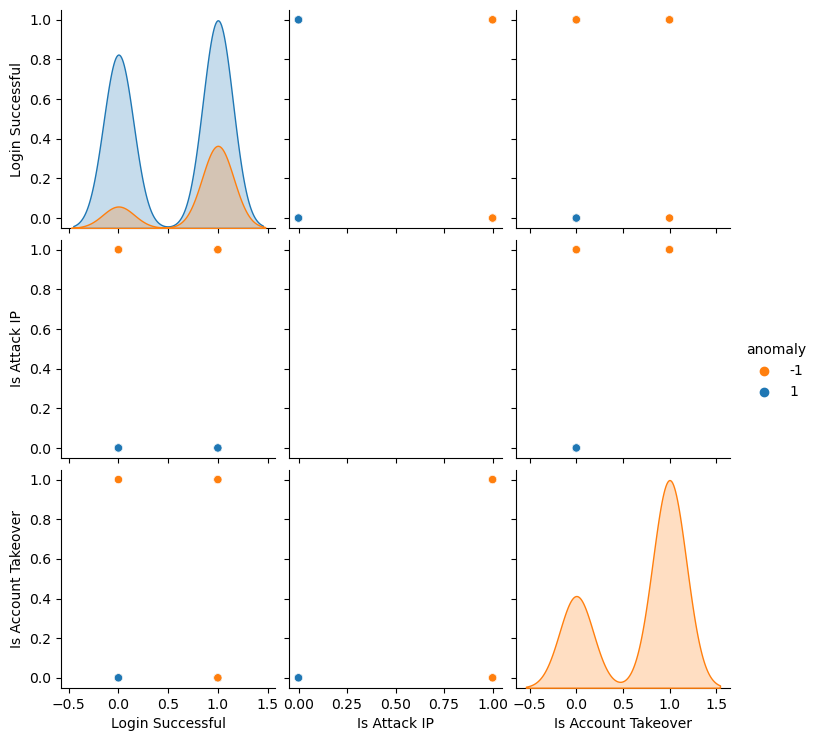

In [114]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


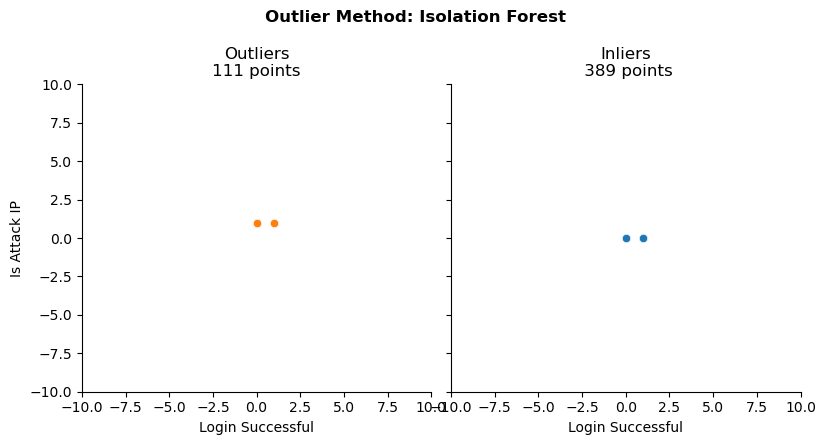

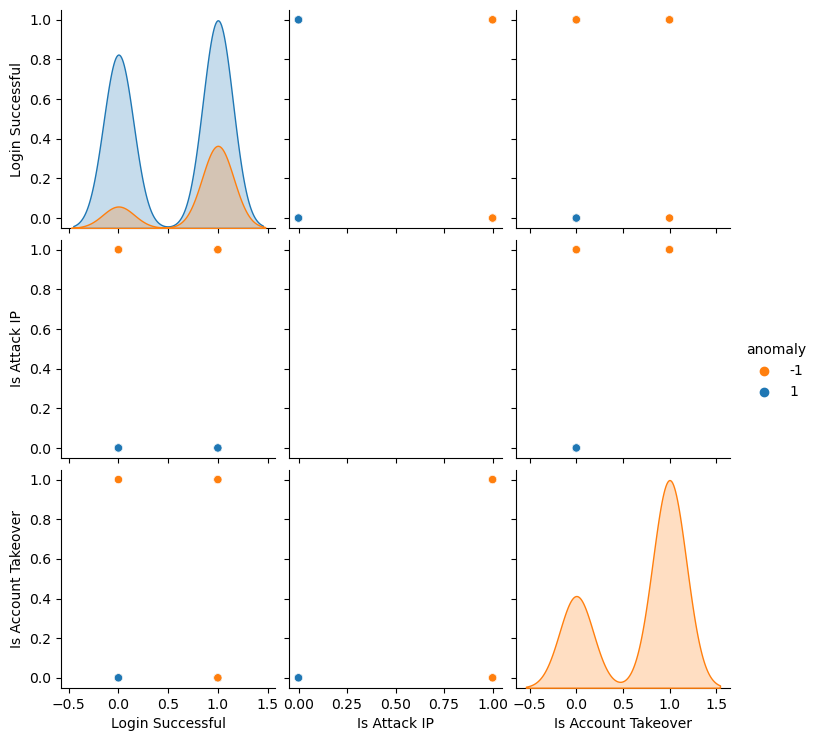

In [115]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### iForest, Local Outlier Factor, Support Vector Machine

(77, 11) (423, 11)
(500, 10)
(500,)
Isolation Forest: 113
Accuracy Score :
0.774
Classification Report :
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       423
        True       0.14      0.09      0.11        77

    accuracy                           0.77       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.74      0.77      0.75       500

Local Outlier Factor: 117
Accuracy Score :
0.766
Classification Report :
              precision    recall  f1-score   support

       False       0.84      0.89      0.87       423
        True       0.10      0.06      0.08        77

    accuracy                           0.77       500
   macro avg       0.47      0.48      0.47       500
weighted avg       0.73      0.77      0.74       500

Support Vector Machine: 343
Accuracy Score :
0.314
Classification Report :
              precision    recall  f1-score   support

       False       0.79      0.26     

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


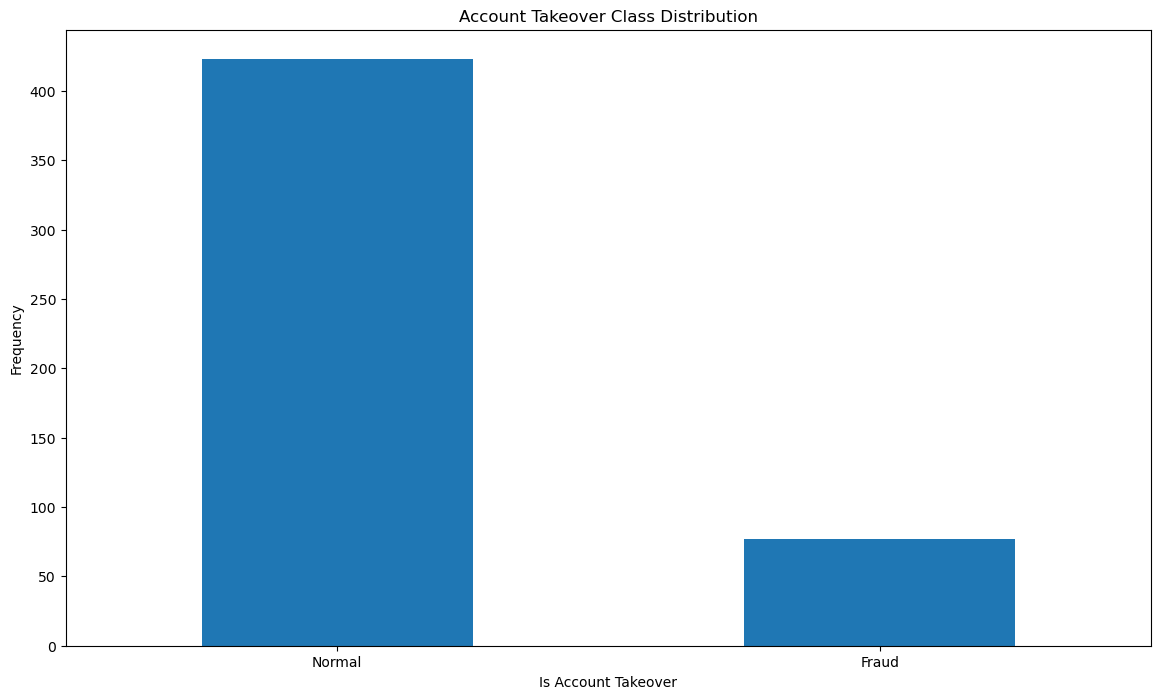

In [118]:
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding


In [119]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 942 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(936)
memory usage: 466.9 KB


User ID     ASN  Login Successful  Is Attack IP  \
0 -1861537202867857590   29695              True         False   
1  2373961011761384656    3280              True          True   
2 -4324475583306591935  393398             False         False   
3 -2877791067553018845  206801              True          True   
4 -5377627992963732557   38778              True         False   

   Is Account Takeover  Blacklisted  cntr_AR  cntr_AU  cntr_BD  cntr_BR  ...  \
0                False        False        0        0        0        0  ...   
1                 True        False        0        0        0        0  ...   
2                False         True        0        0        0        0  ...   
3                 True        False        0        0        0        0  ...   
4                False         True        0        0        0        0  ...   

   lgnt_2020-10-27 06:38:53.830  lgnt_2020-11-02 17:17:43.421  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2020-11-07 09:49:55.319  lgnt_2020-11-13 08:13:22.285  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2020-11-14 07:06:48.691  lgnt_2020-11-21 18:49:00.959  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2020-11-23 23:04:43.278  brw_C  brw_F  brw_O  
0                             0      1      0      0  
1                             0      1      0      0  
2                             0      0      0      1  
3                             0      1      0      0  
4                             0      1      0      0  

[5 rows x 942 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 942 entries, User ID to Is Account Takeover
dtypes: bool(4), int64(2), uint8(936)
memory usage: 466.9 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 99.39%
              precision    recall  f1-score  

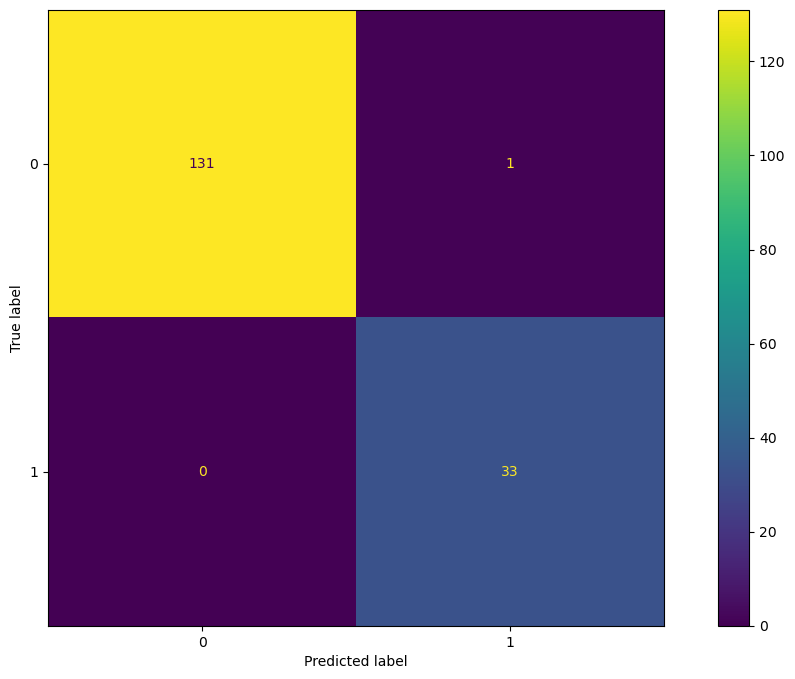

In [120]:
# XGBoost 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:941]
Y = dataset.iloc[:,941]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 400
The number of records in the test dataset is 100
The training dataset has 339 records for the majority class and 61 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.16      1.00      0.28        16

    accuracy                           0.16       100
   macro avg       0.08      0.50      0.14       100
weighted avg       0.03      0.16      0.04       100

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.84      1.00      0.91        84
        True       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100

[[ 0 84]
 [ 0 16]]


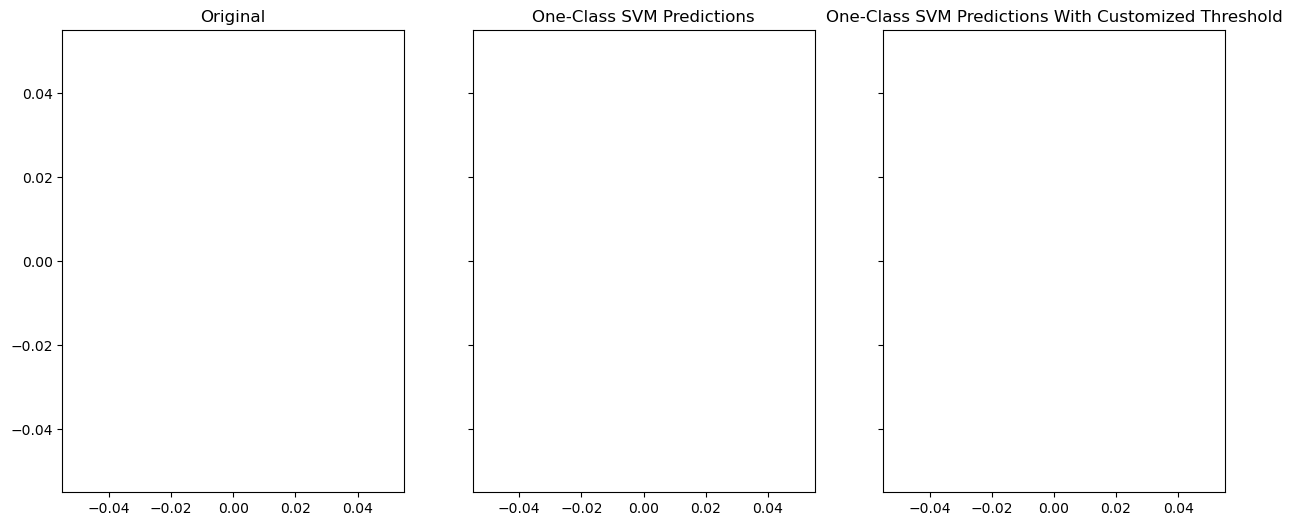

In [121]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:941]
Y = dataset.iloc[:,941]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 350
The number of records in the test dataset is 150
The training dataset has 291 records for the majority class and 59 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       132
        True       0.12      1.00      0.21        18

    accuracy                           0.12       150
   macro avg       0.06      0.50      0.11       150
weighted avg       0.01      0.12      0.03       150

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.88      1.00      0.94       132
        True       0.00      0.00      0.00        18

    accuracy                           0.88       150
   macro avg       0.44      0.50      0.47       150
weighted avg       0.77      0.88      0.82       150

[[  0 132]
 [  0  18]]


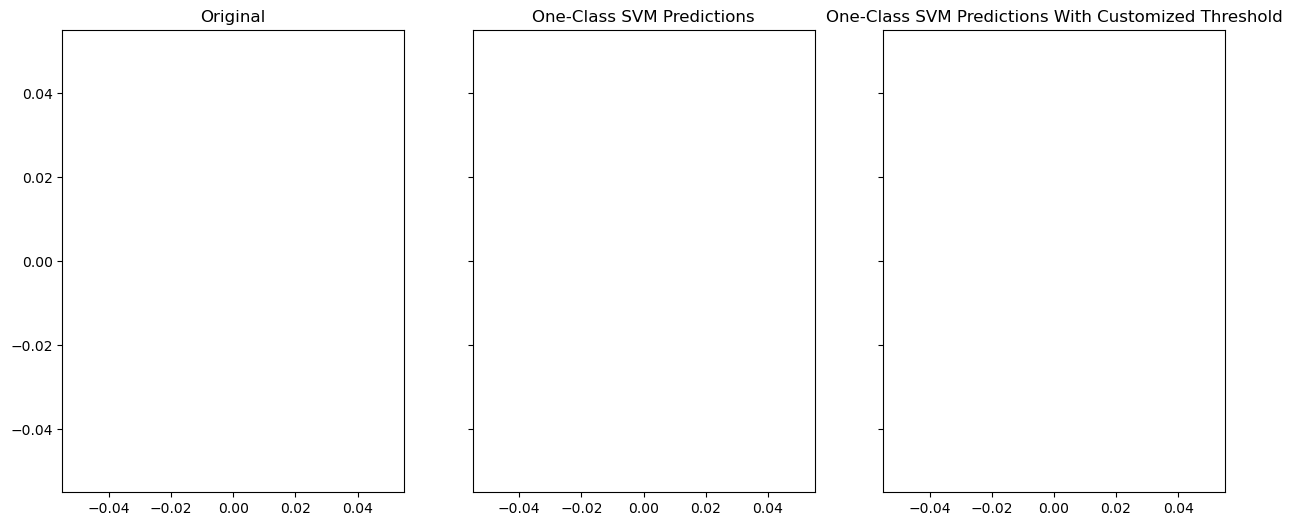

In [122]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:941]
Y = dataset.iloc[:,941]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 250
The number of records in the test dataset is 250
The training dataset has 206 records for the majority class and 44 records for the minority class.
              precision    recall  f1-score   support

       False       0.91      0.05      0.09       217
        True       0.13      0.97      0.24        33

    accuracy                           0.17       250
   macro avg       0.52      0.51      0.16       250
weighted avg       0.81      0.17      0.11       250

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.87      1.00      0.93       217
        True       0.00      0.00      0.00        33

    accuracy                           0.87       250
   macro avg       0.43      0.50      0.46       250
weighted avg       0.75      0.87      0.81       250

[[ 10 207]
 [  1  32]]


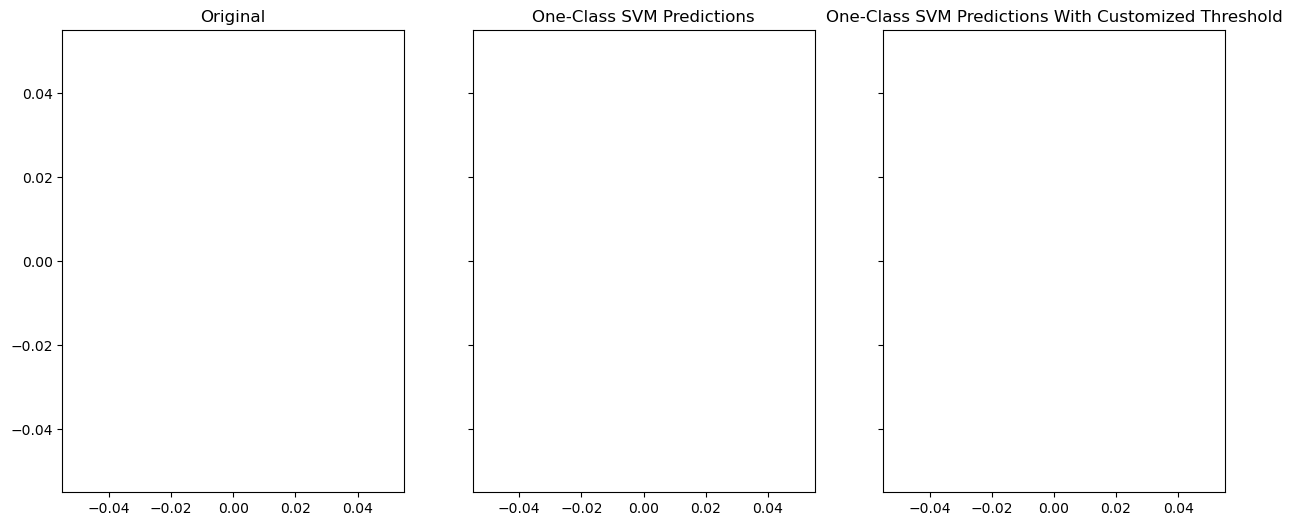

In [123]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:941]
Y = dataset.iloc[:,941]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 37
Number of non anomalous values  463
Total Number of Values: 500


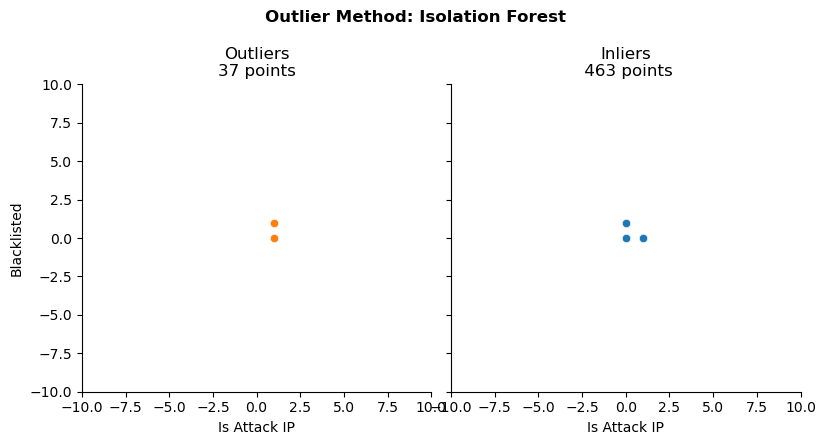

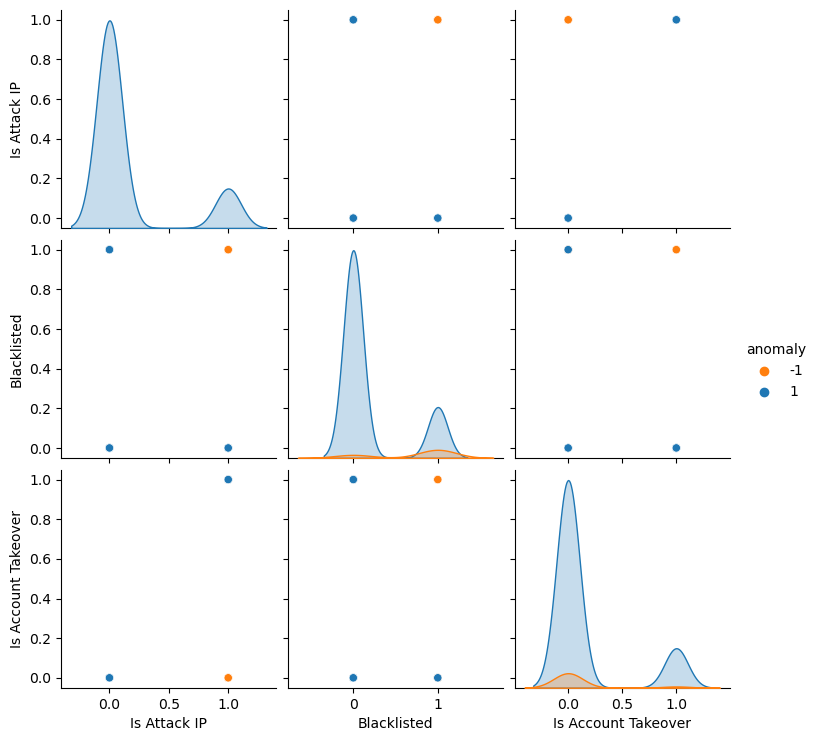

In [124]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


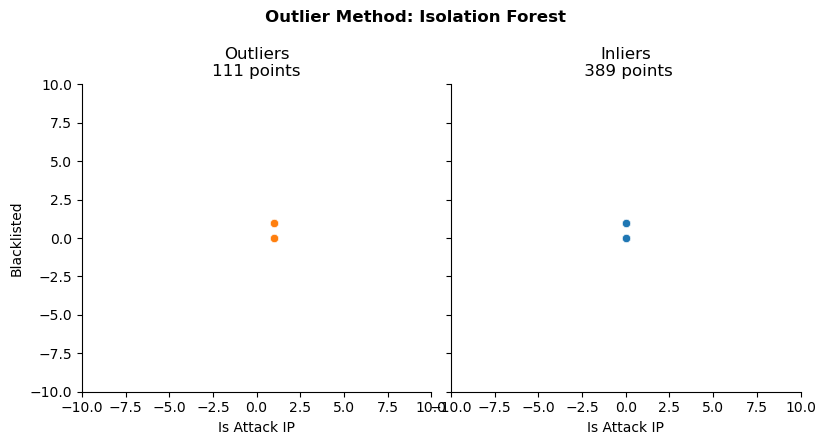

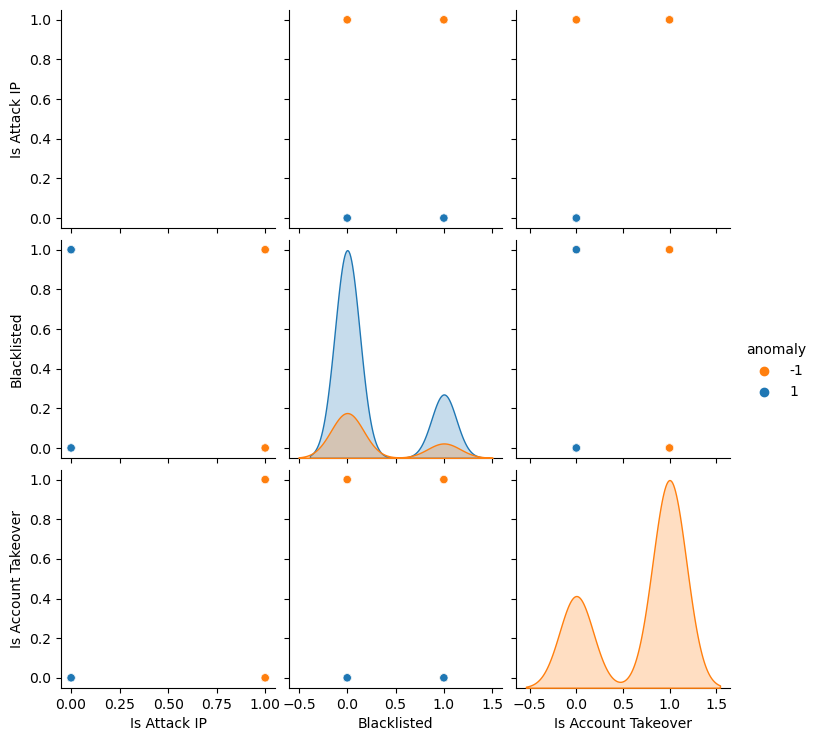

In [125]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 202
Number of non anomalous values  298
Total Number of Values: 500


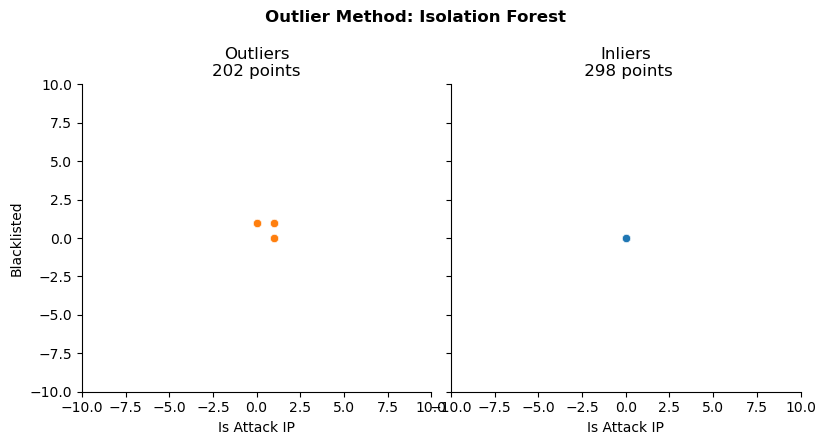

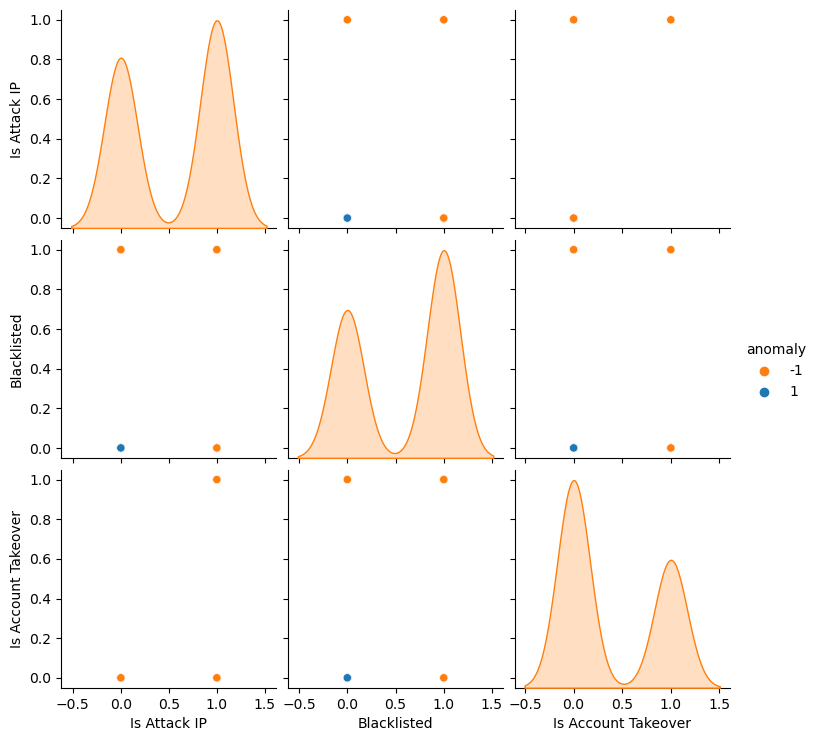

In [126]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 39
Number of non anomalous values  461
Total Number of Values: 500


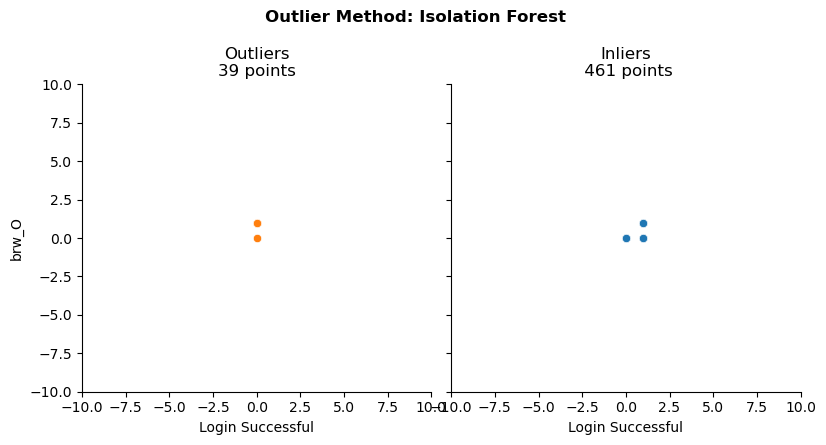

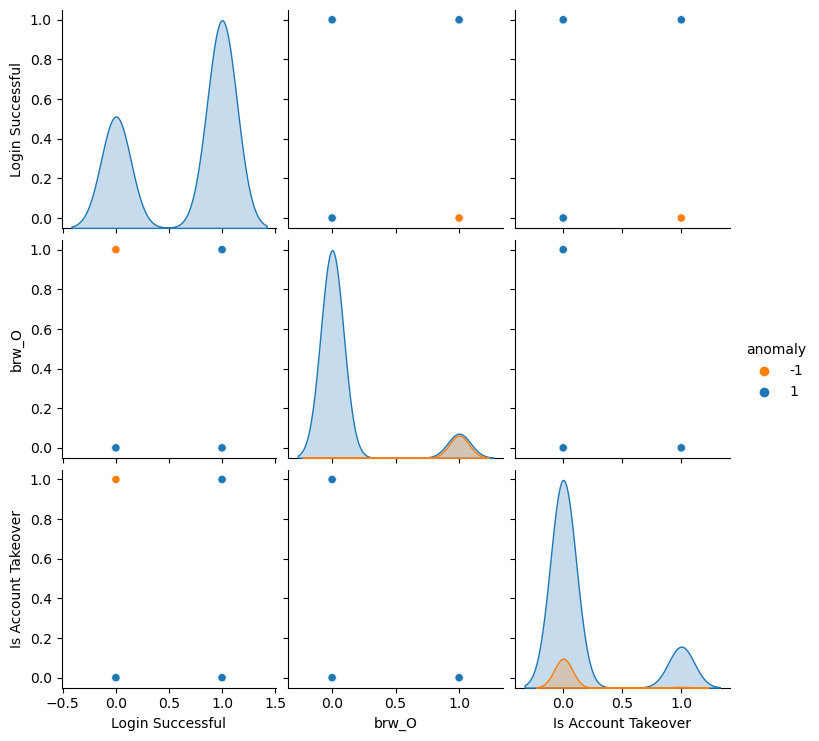

In [127]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'brw_O', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'brw_O','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 87
Number of non anomalous values  413
Total Number of Values: 500


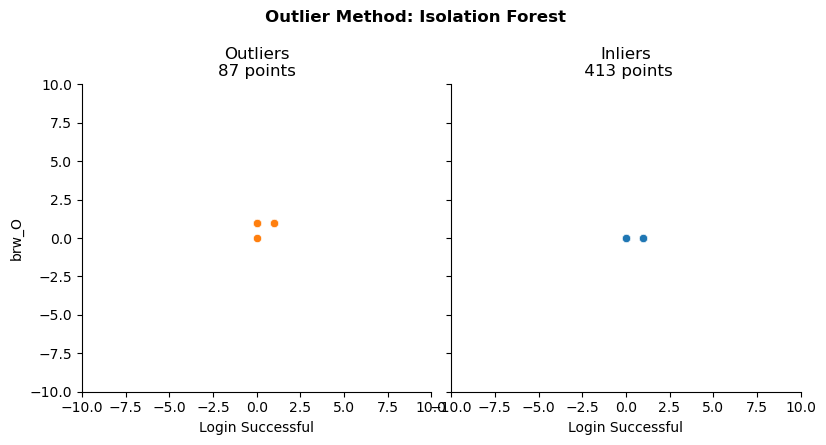

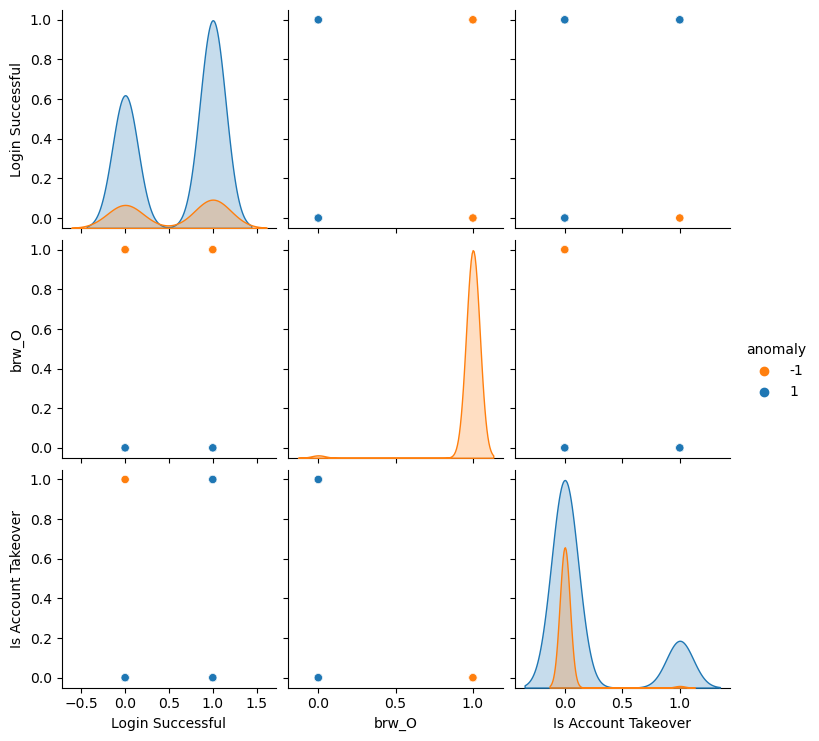

In [128]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 163
Number of non anomalous values  337
Total Number of Values: 500


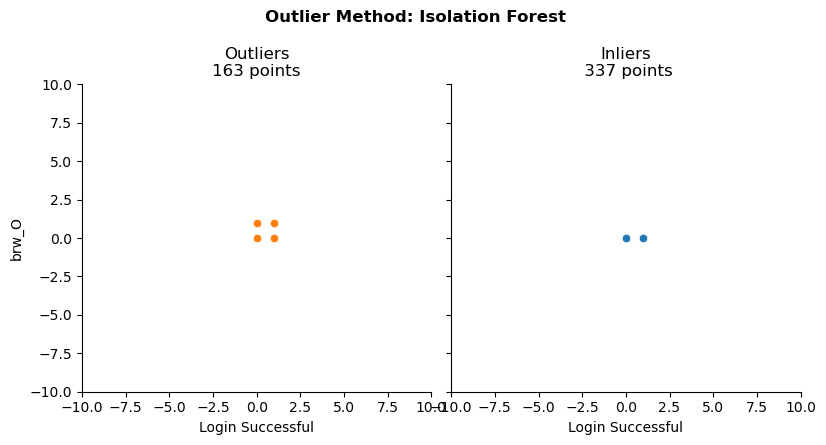

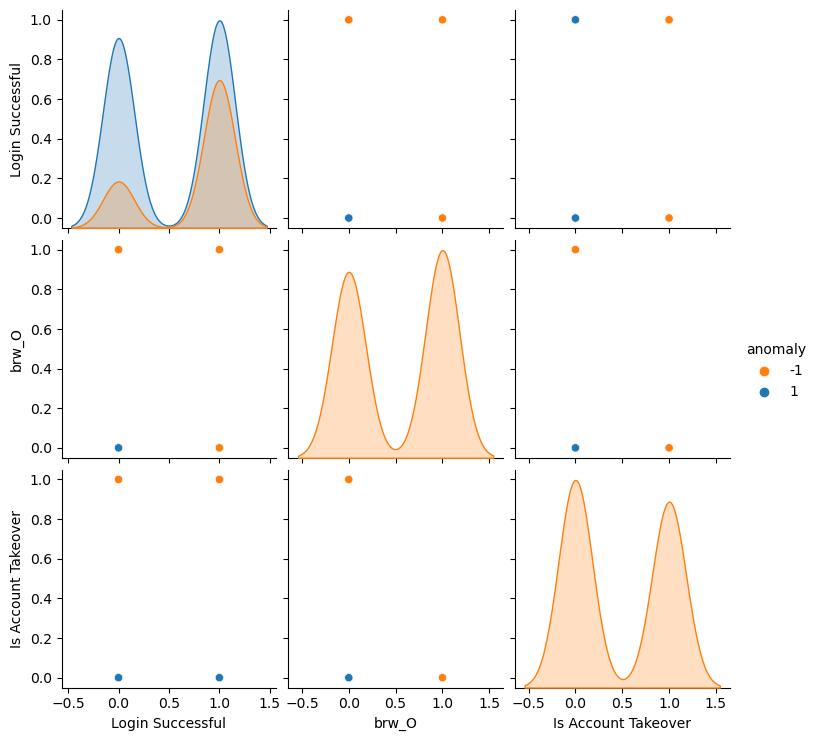

In [129]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 35
Number of non anomalous values  465
Total Number of Values: 500


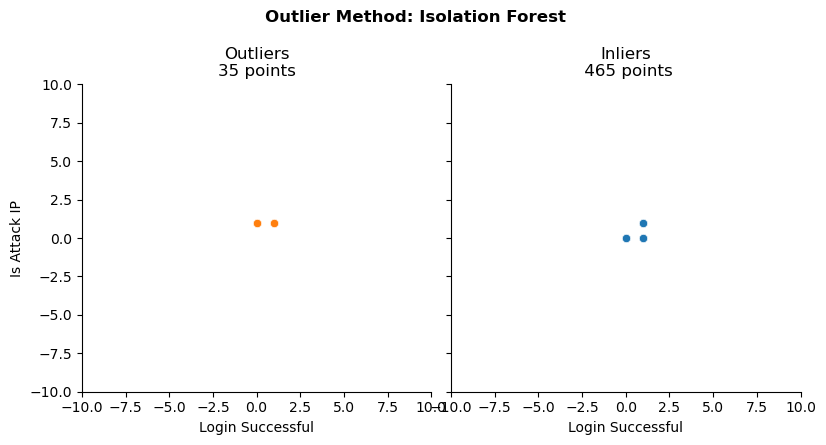

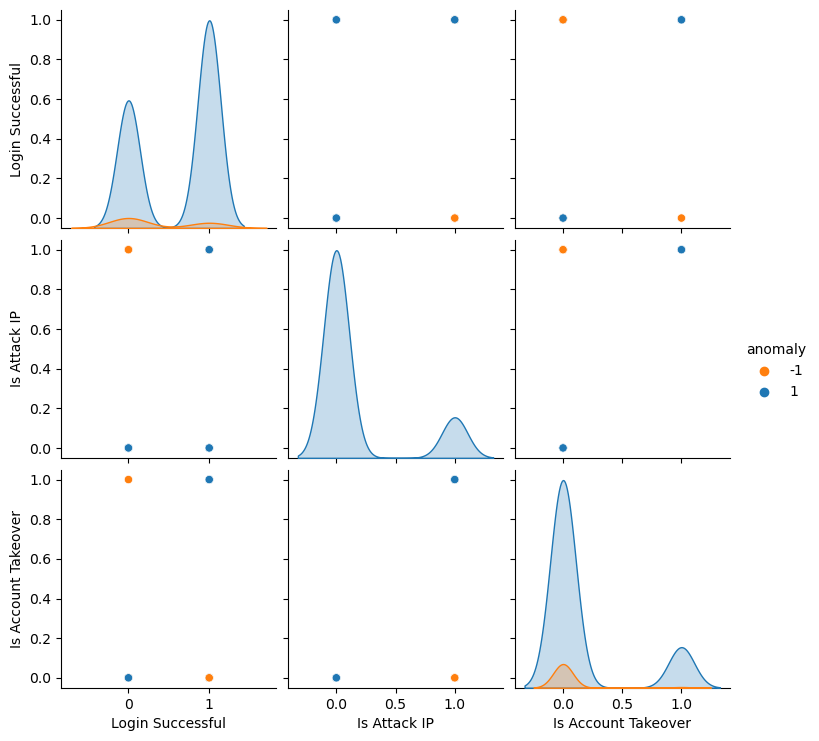

In [130]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


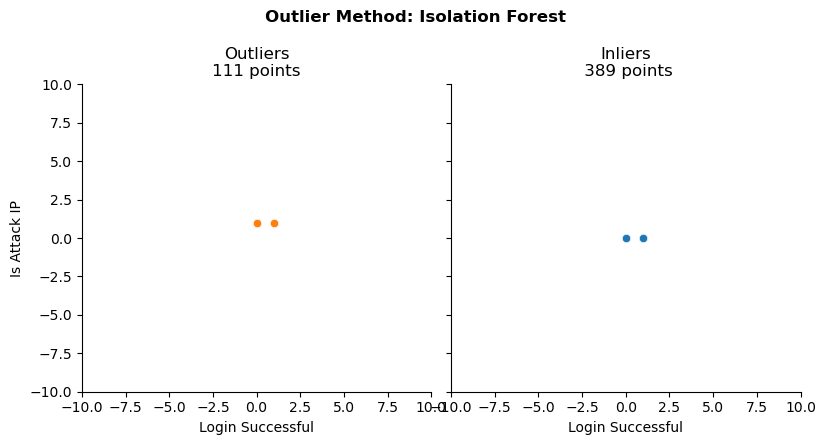

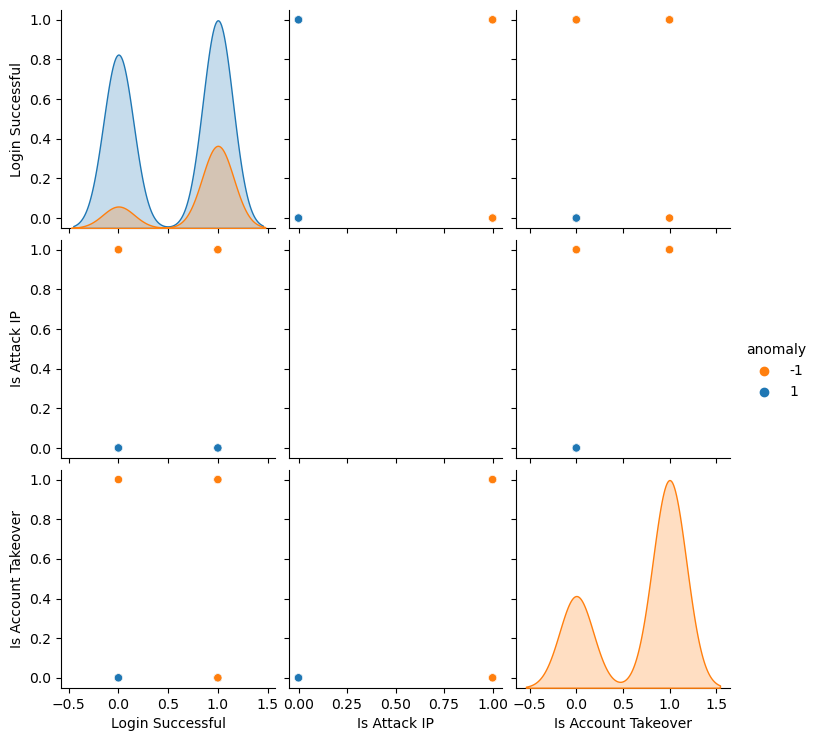

In [131]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


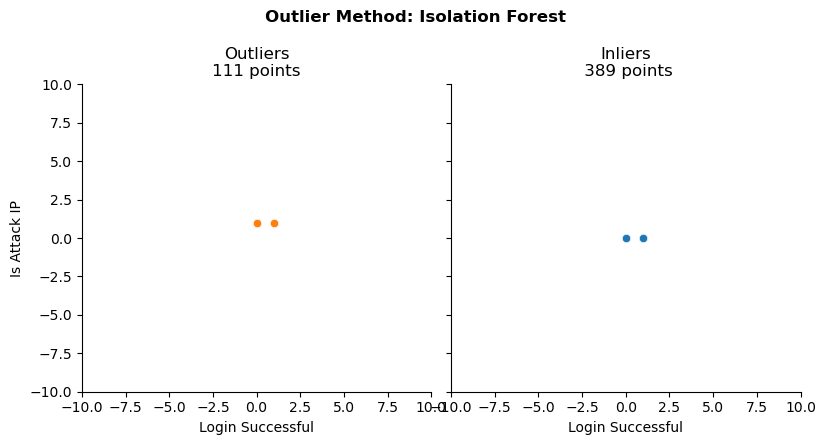

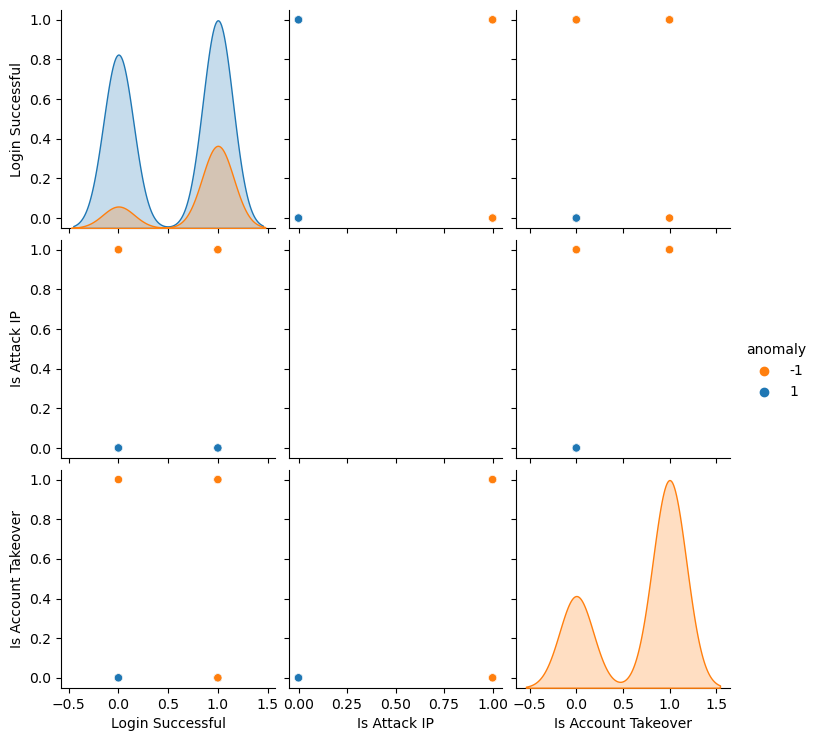

In [132]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(77, 942) (423, 942)
(500, 941)
(500,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 117
Accuracy Score :
0.766
Classification Report :
              precision    recall  f1-score   support

       False       0.84      0.89      0.87       423
        True       0.10      0.06      0.08        77

    accuracy                           0.77       500
   macro avg       0.47      0.48      0.47       500
weighted avg       0.73      0.77      0.74       500

Local Outlier Factor: 111
Accuracy Score :
0.778
Classification Report :
              precision    recall  f1-score   support

       False       0.85      0.90      0.87       423
        True       0.16      0.10      0.13        77

    accuracy                           0.78       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.74      0.78      0.76       500

Support Vector Machine: 343
Accuracy Score :
0.314
Classification Report :
              precision    recall  f1-score   support

       False       0.79      0.26      0.39       423
        True       0

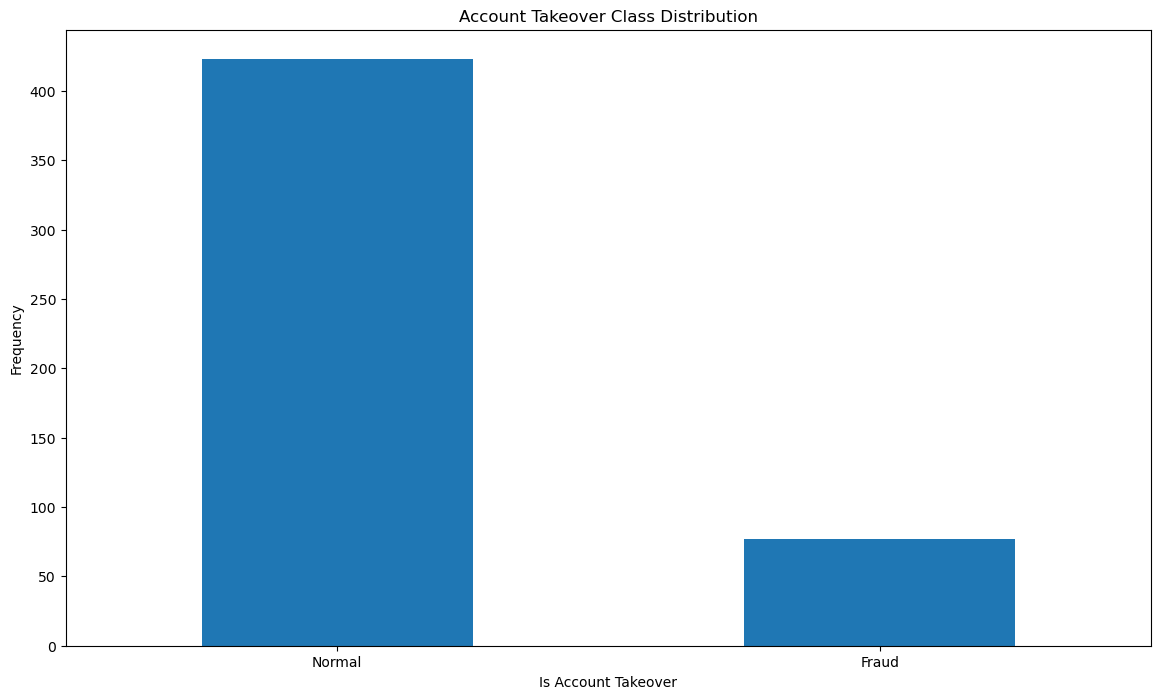

In [133]:
# iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

# New dataset with divide in ['Is Account Takeover'] == True
### 141/500 ATO

In [134]:
import pandas as pd

takeover = pd.read_csv('divided-chunks/takeover141.csv')
restTakeover = safe

In [135]:
import numpy as np

takeover['Login Timestamp'] =  pd.to_datetime(takeover['Login Timestamp'], infer_datetime_format=True)
takeover.dropna(axis = 0, how = 'all', inplace = True)

takeover['IP Address'] = takeover['IP Address'].apply(lambda x: str(x))
takeover = takeover.reset_index(drop=True)

searchfor = ['CN', 'VN', 'RU', 'BR', 'US', 'IN', 'IR', 'ID', 'KR', 'TW', 'FR', 'UA']
takeover["Blacklisted"] = np.where(takeover["Country"].str.contains('|'.join(searchfor)), True, False)
cleanup_devices = {"Device Type": {"tablet": "T", "mobile": "M", "desktop": "D", "bot": "B", "unknown": "U", np.nan: "NAN"}}
takeover = takeover.replace(cleanup_devices)

takeover["Browser Type"] = (np.where(takeover["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(takeover["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
takeover = takeover.replace(cleanup_browser)

takeover.drop("OS Name and Version", inplace=True, axis=1)
takeover.drop("Browser Name and Version", inplace=True, axis=1)

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    takeover[col] = takeover[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    takeover[col] = takeover[col].astype('bool')

In [136]:
df = pd.concat([takeover, safe.head(359)], ignore_index=True, sort=False)
# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)

d1 = df.copy()
               
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      500 non-null    category
 1   User ID              500 non-null    int64   
 2   IP Address           500 non-null    category
 3   Country              500 non-null    category
 4   ASN                  500 non-null    int64   
 5   Device Type          500 non-null    category
 6   Login Successful     500 non-null    bool    
 7   Is Attack IP         500 non-null    bool    
 8   Is Account Takeover  500 non-null    bool    
 9   Blacklisted          500 non-null    bool    
 10  Browser Type         500 non-null    category
dtypes: bool(4), category(5), int64(2)
memory usage: 54.2 KB


# Experimental feature XGBoost (https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      500 non-null    category
 1   User ID              500 non-null    int64   
 2   IP Address           500 non-null    category
 3   Country              500 non-null    category
 4   ASN                  500 non-null    int64   
 5   Device Type          500 non-null    category
 6   Login Successful     500 non-null    bool    
 7   Is Attack IP         500 non-null    bool    
 8   Blacklisted          500 non-null    bool    
 9   Browser Type         500 non-null    category
 10  Is Account Takeover  500 non-null    bool    
dtypes: bool(4), category(5), int64(2)
memory usage: 54.2 KB
Feature importances:
[0.5381381  0.00136504 0.         0.22627188 0.04183649 0.00924834
 0.04554712 0.13759302 0.         0.        ]


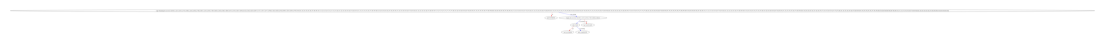

In [137]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model-attack-or-takeover.json")
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("caterogical-model-graph-attack-or-takeover.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
print("Feature importances:")
print(clf.feature_importances_)

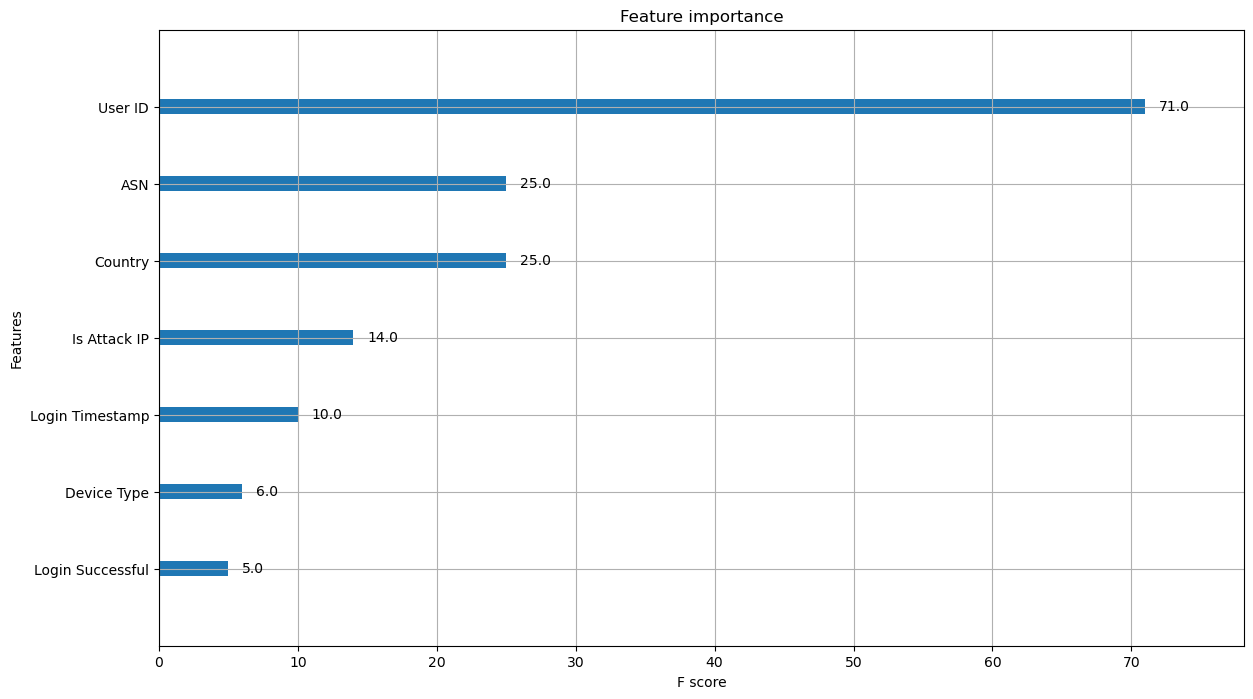

In [138]:
plot_importance(clf)
pyplot.show()

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [139]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      500 non-null    int16
 1   User ID              500 non-null    int64
 2   IP Address           500 non-null    int16
 3   Country              500 non-null    int8 
 4   ASN                  500 non-null    int64
 5   Device Type          500 non-null    int8 
 6   Login Successful     500 non-null    bool 
 7   Is Attack IP         500 non-null    bool 
 8   Is Account Takeover  500 non-null    bool 
 9   Blacklisted          500 non-null    bool 
 10  Browser Type         500 non-null    int8 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 13.3 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Login Timestamp   500 non-null    int16
 1   User ID           500 non-null    int64
 2   IP Address        500 non-null    int16
 3   Country           500 non-null    int8 
 4   ASN               500 non-null    int64
 5   Device Type       500 non-null    int8 
 6   Login Successful  500 non-null    bool 
 7   Is Attack IP      500 non-null    bool 
 8   Blacklisted       500 non-null    bool 
 9   Browser Type      500 non-null    int8 
dtypes: bool(3), int16(2), int64(2), int8(3)
memory usage: 12.8 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=Non

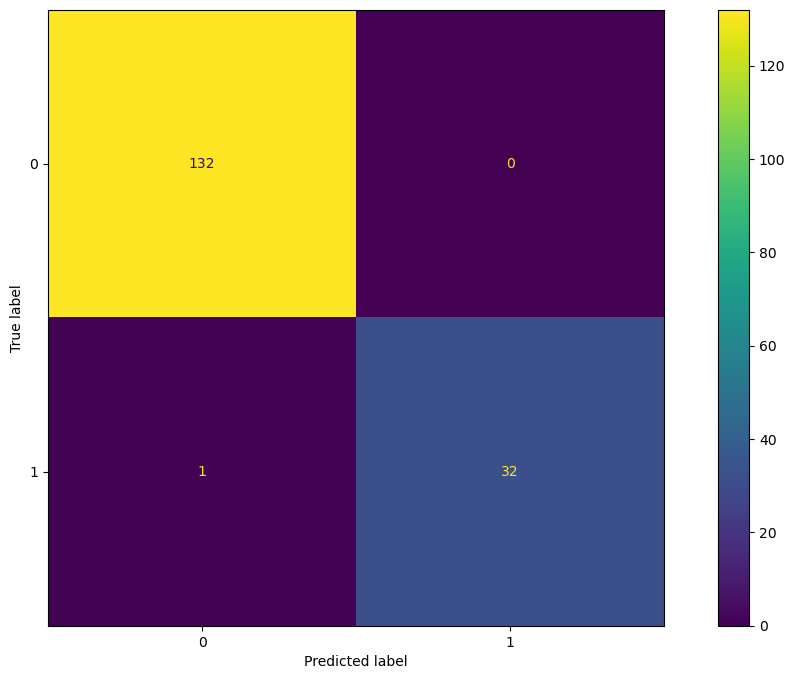

In [140]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]
X.info()

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 400
The number of records in the test dataset is 100
The training dataset has 339 records for the majority class and 61 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.16      1.00      0.28        16

    accuracy                           0.16       100
   macro avg       0.08      0.50      0.14       100
weighted avg       0.03      0.16      0.04       100

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.84      1.00      0.91        84
        True       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100

[[ 0 84]
 [ 0 16]]


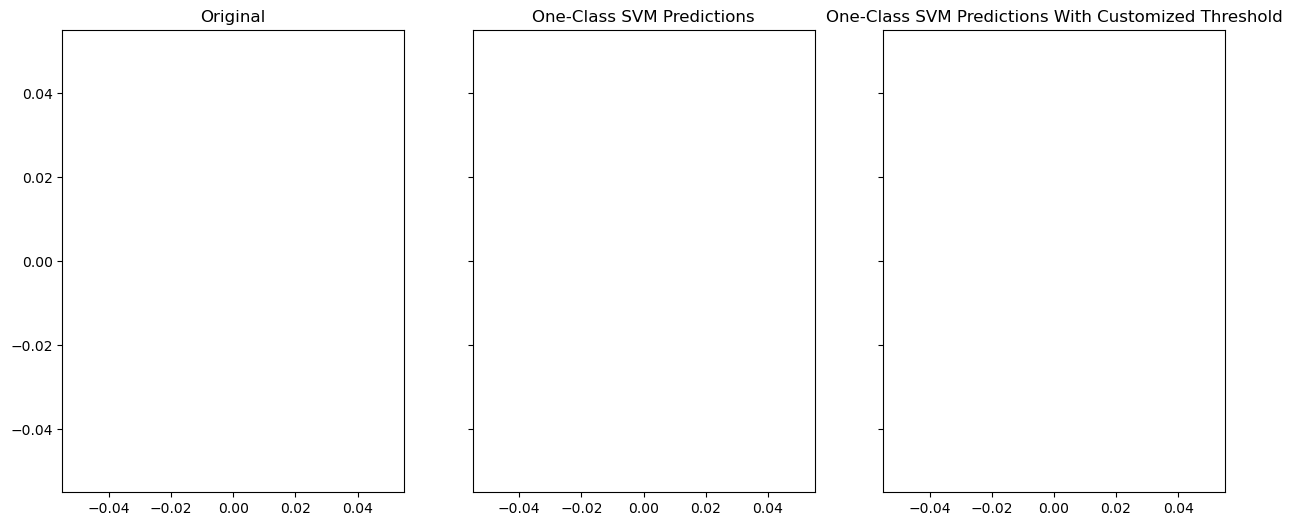

In [141]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 350
The number of records in the test dataset is 150
The training dataset has 291 records for the majority class and 59 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       132
        True       0.12      1.00      0.21        18

    accuracy                           0.12       150
   macro avg       0.06      0.50      0.11       150
weighted avg       0.01      0.12      0.03       150

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.88      1.00      0.94       132
        True       0.00      0.00      0.00        18

    accuracy                           0.88       150
   macro avg       0.44      0.50      0.47       150
weighted avg       0.77      0.88      0.82       150

[[  0 132]
 [  0  18]]


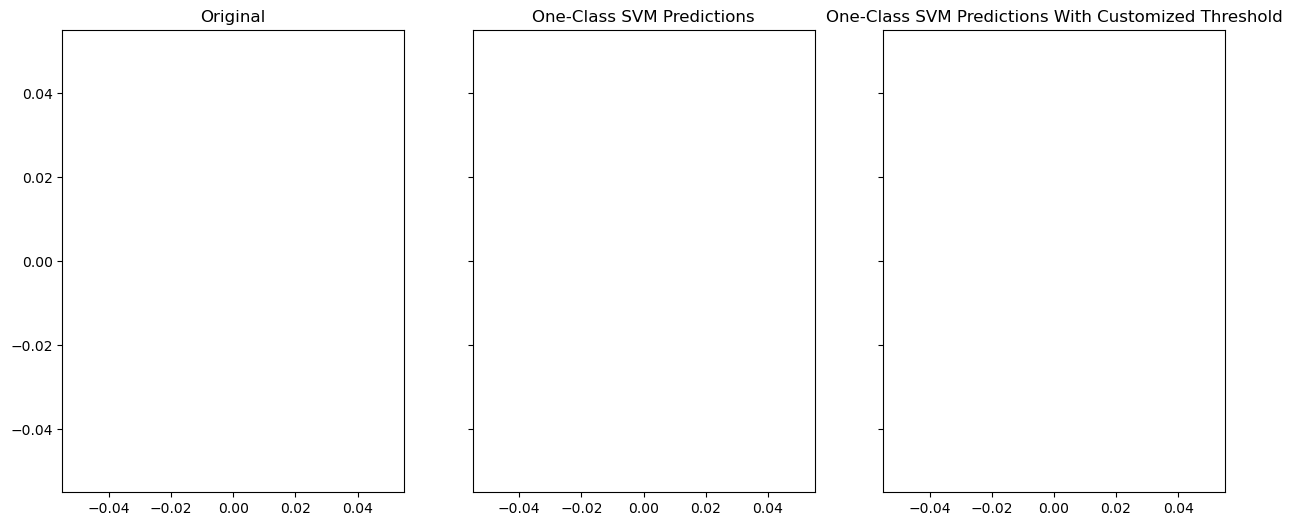

In [142]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 250
The number of records in the test dataset is 250
The training dataset has 206 records for the majority class and 44 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       217
        True       0.13      1.00      0.23        33

    accuracy                           0.13       250
   macro avg       0.07      0.50      0.12       250
weighted avg       0.02      0.13      0.03       250

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.87      1.00      0.93       217
        True       0.00      0.00      0.00        33

    accuracy                           0.87       250
   macro avg       0.43      0.50      0.46       250
weighted avg       0.75      0.87      0.81       250

[[  0 217]
 [  0  33]]


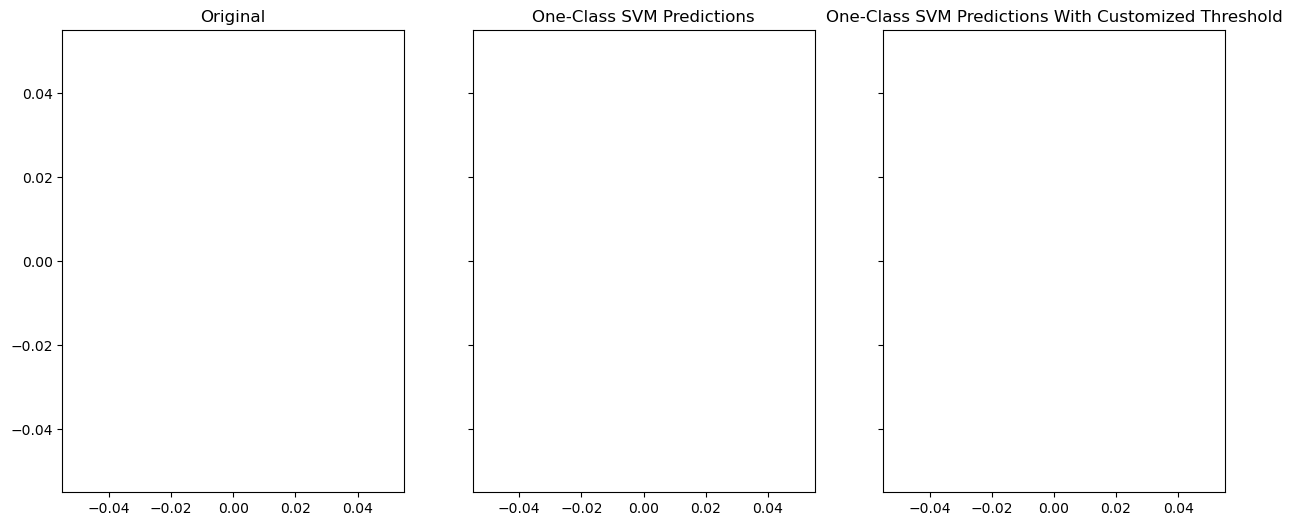

In [143]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 37
Number of non anomalous values  463
Total Number of Values: 500


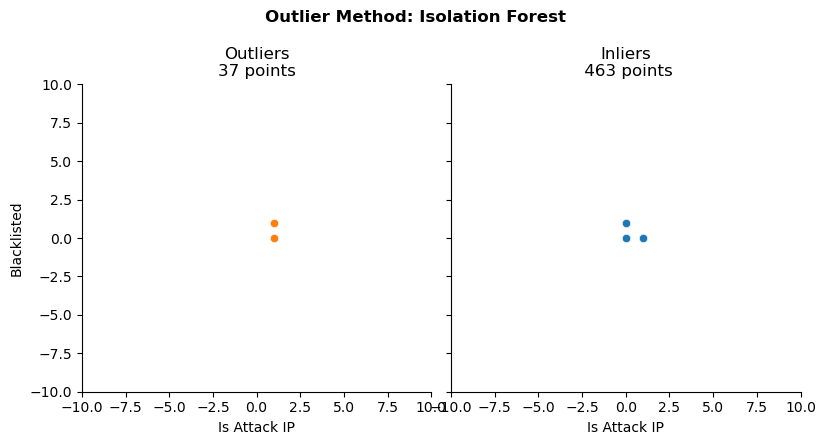

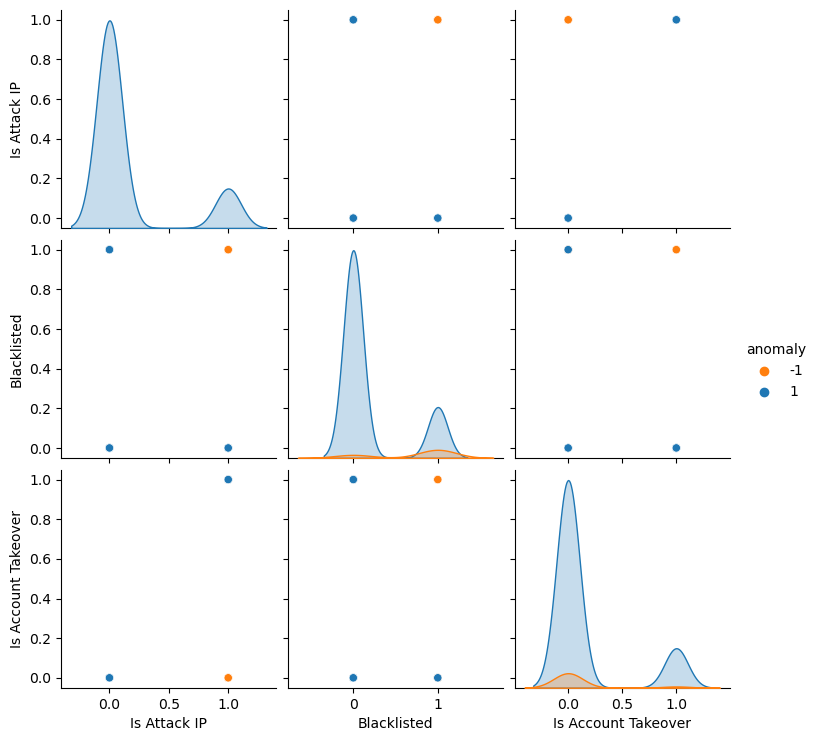

In [144]:
# Isolation Forest

# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


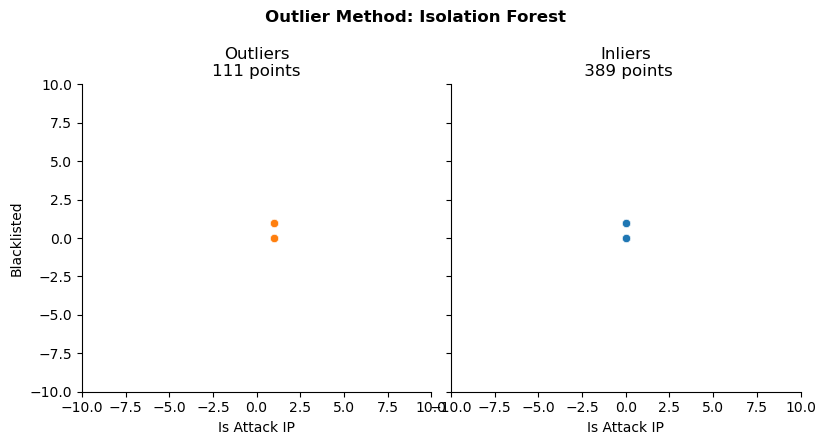

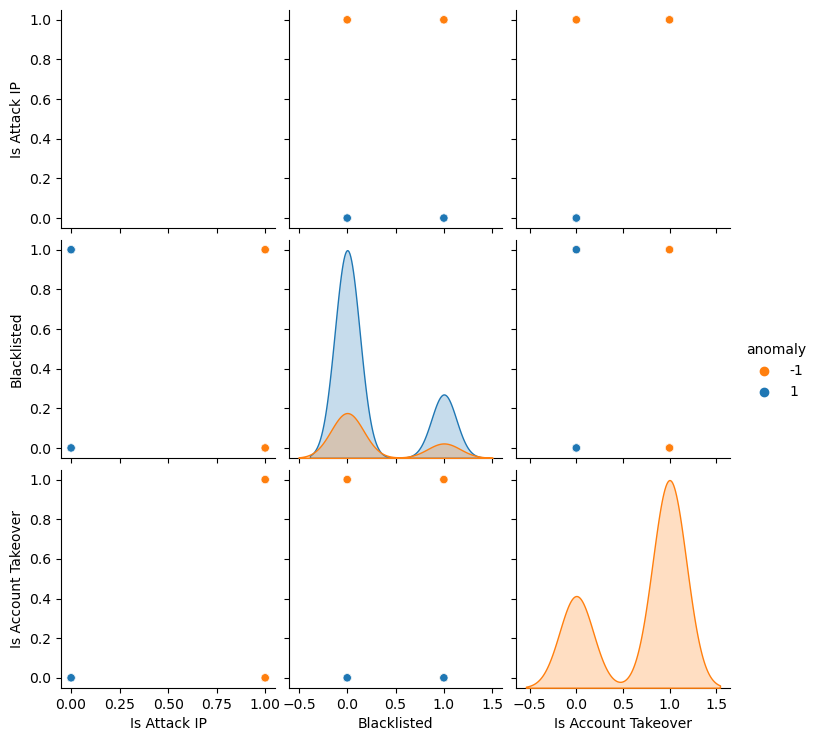

In [145]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 202
Number of non anomalous values  298
Total Number of Values: 500


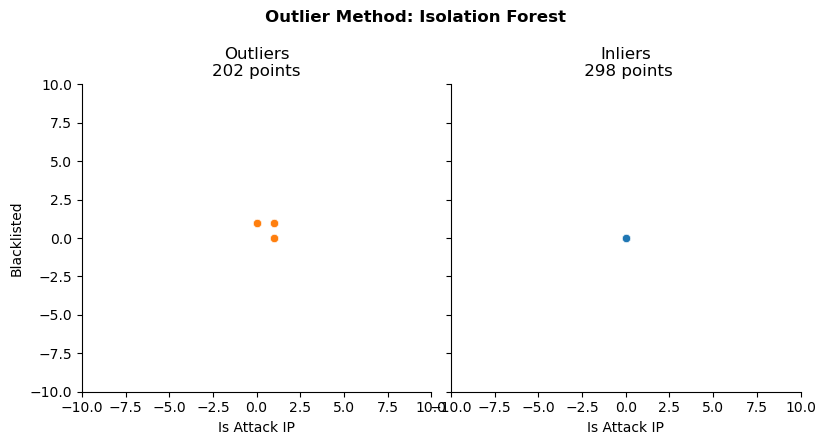

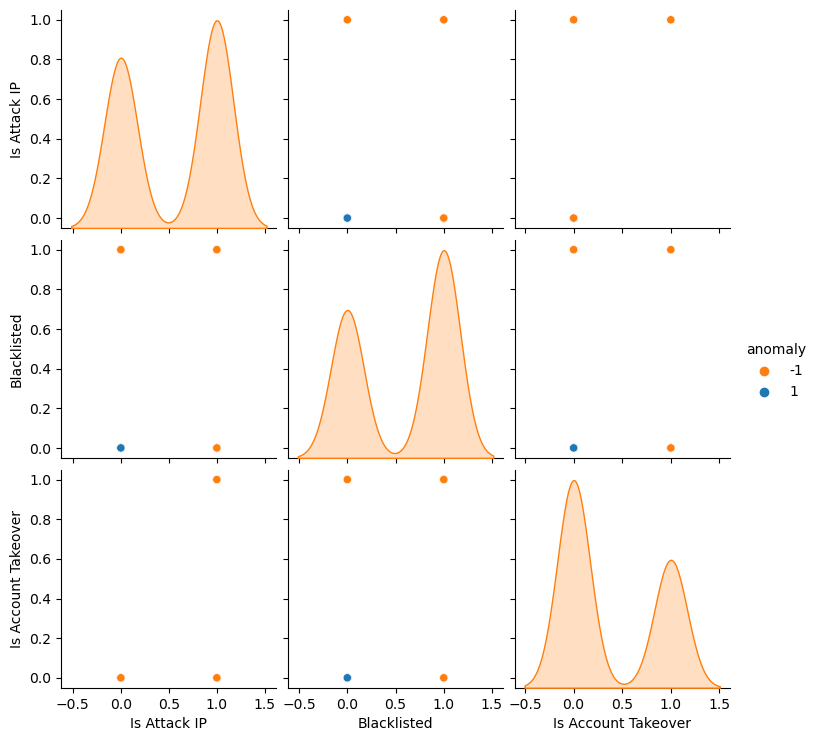

In [146]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28
Number of non anomalous values  472
Total Number of Values: 500


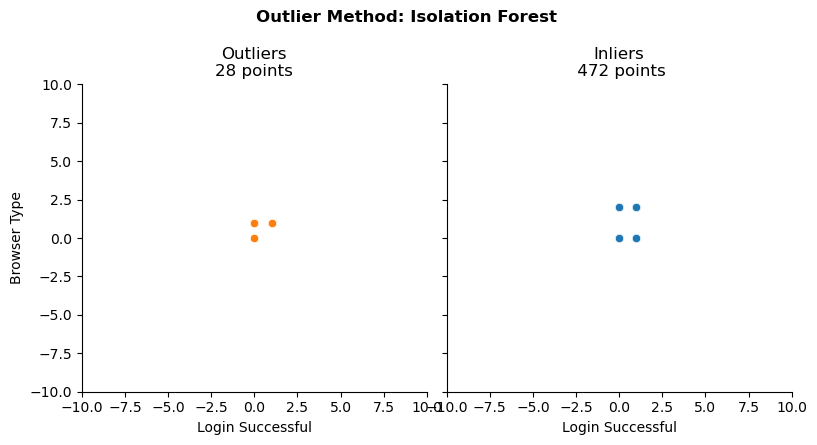

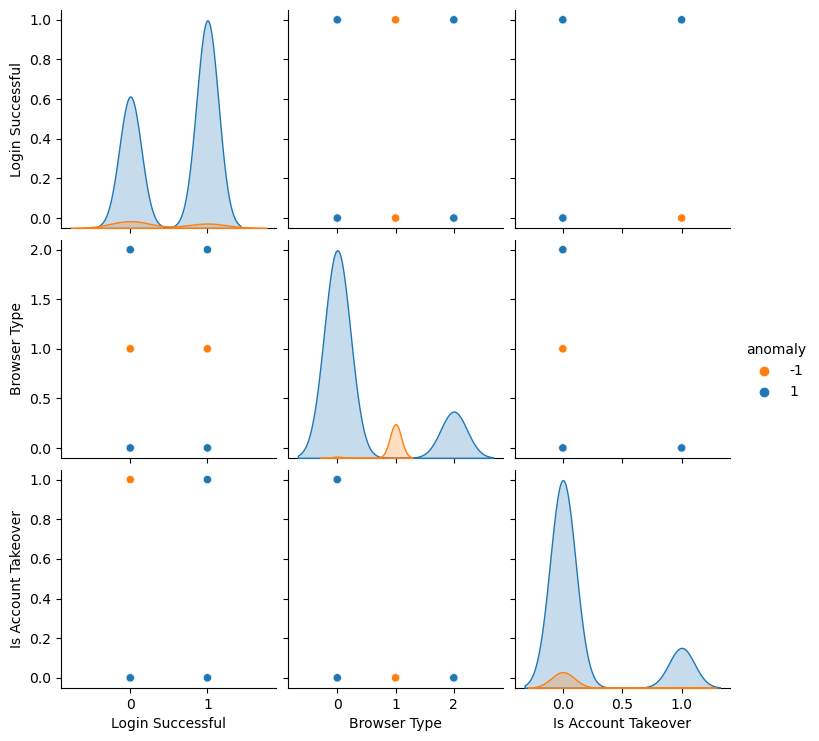

In [147]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Browser Type', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Browser Type','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 114
Number of non anomalous values  386
Total Number of Values: 500


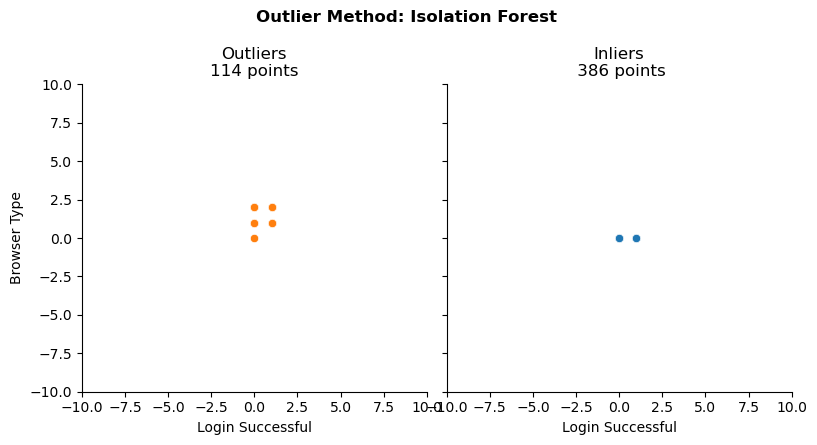

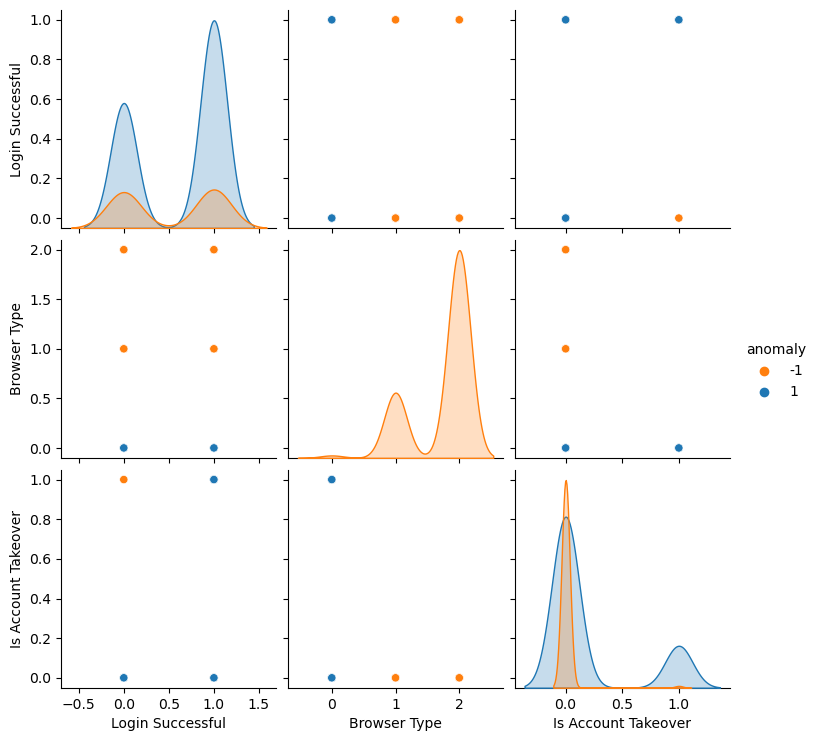

In [148]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 190
Number of non anomalous values  310
Total Number of Values: 500


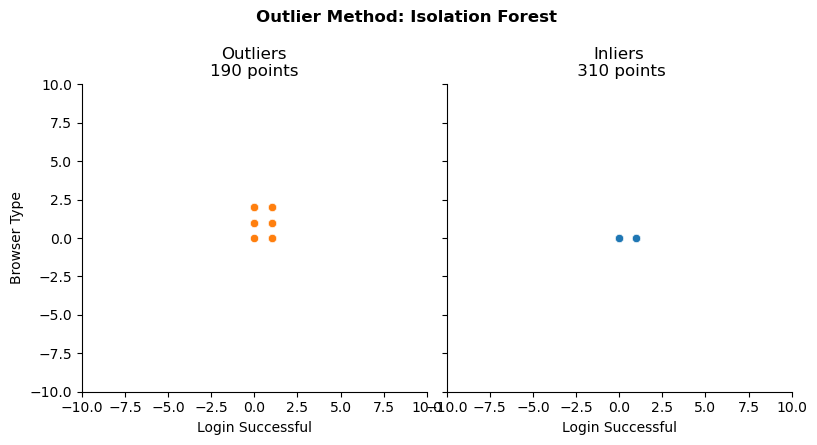

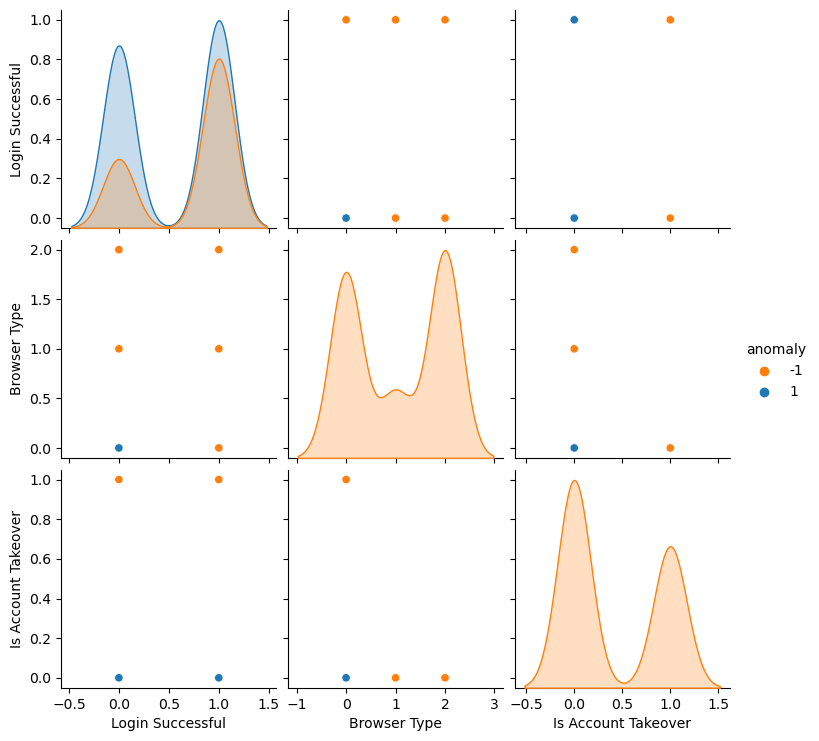

In [149]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Browser Type', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 35
Number of non anomalous values  465
Total Number of Values: 500


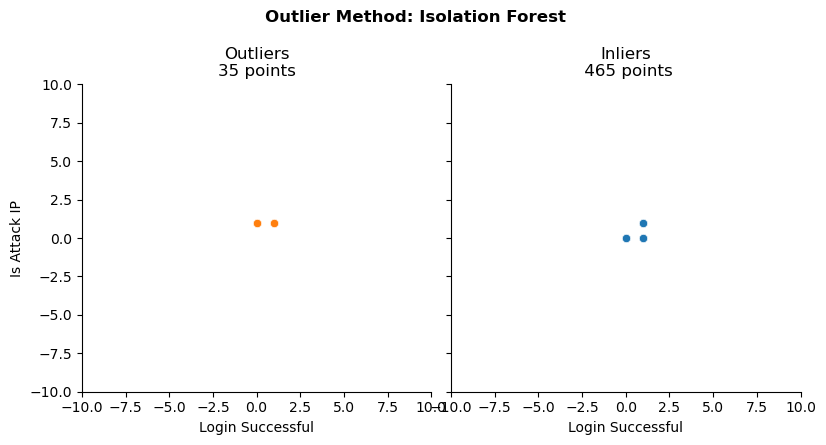

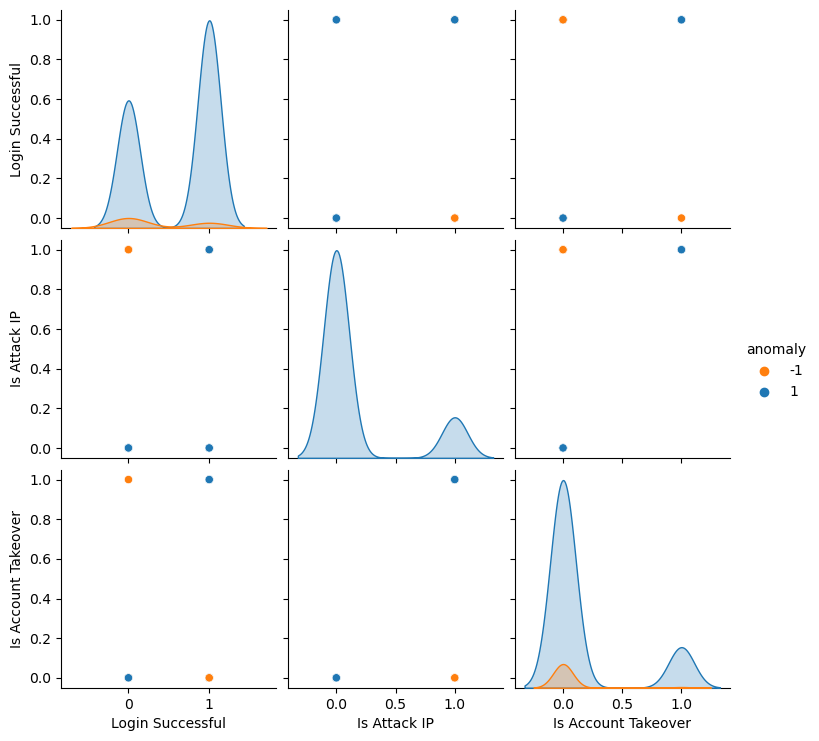

In [150]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


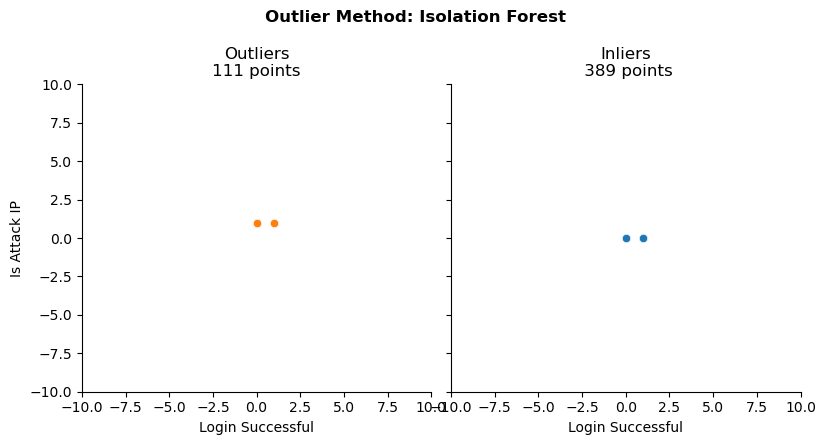

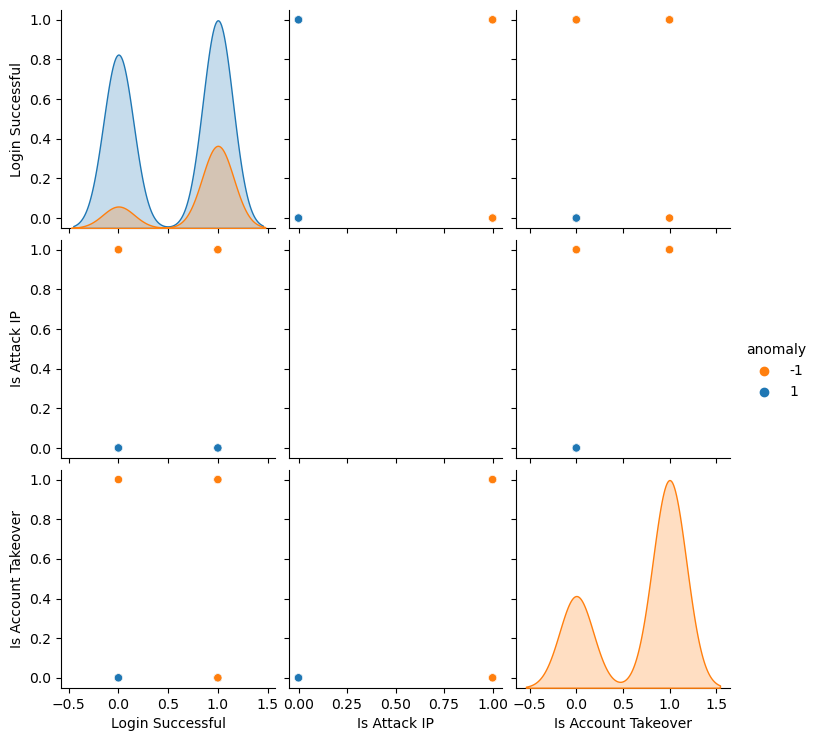

In [151]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


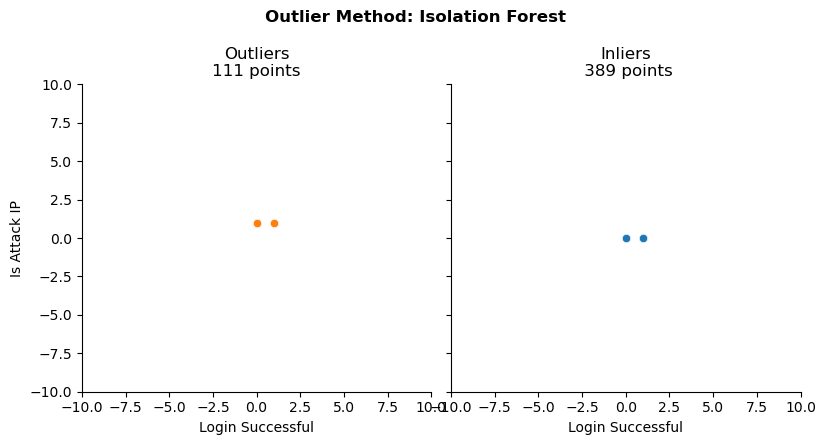

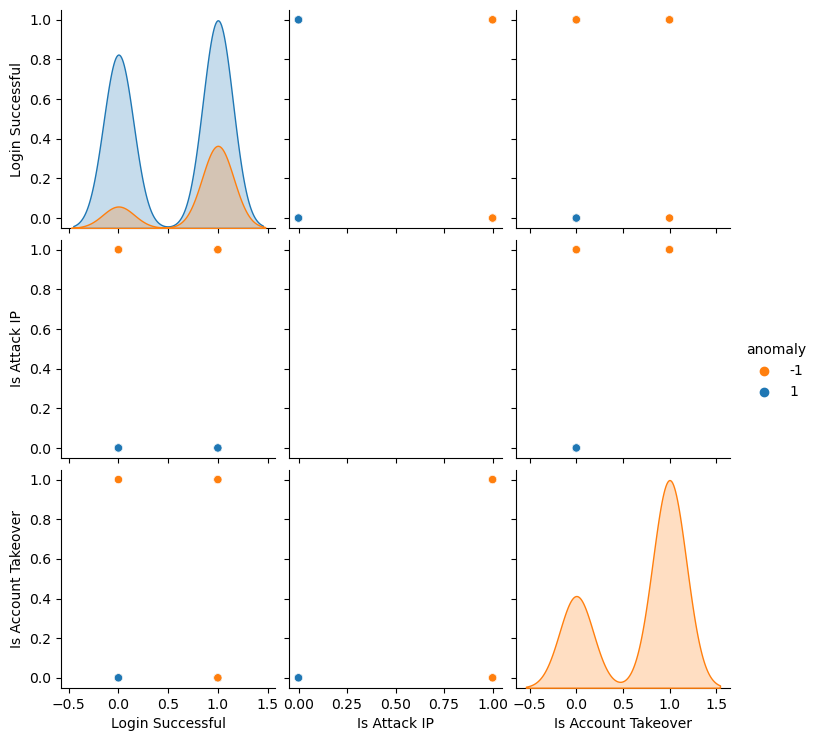

In [152]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(77, 11) (423, 11)
(500, 10)
(500,)
Isolation Forest: 113
Accuracy Score :
0.774
Classification Report :
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       423
        True       0.14      0.09      0.11        77

    accuracy                           0.77       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.74      0.77      0.75       500

Local Outlier Factor: 117
Accuracy Score :
0.766
Classification Report :
              precision    recall  f1-score   support

       False       0.84      0.89      0.87       423
        True       0.10      0.06      0.08        77

    accuracy                           0.77       500
   macro avg       0.47      0.48      0.47       500
weighted avg       0.73      0.77      0.74       500

Support Vector Machine: 343
Accuracy Score :
0.314
Classification Report :
              precision    recall  f1-score   support

       False       0.79      0.26     

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


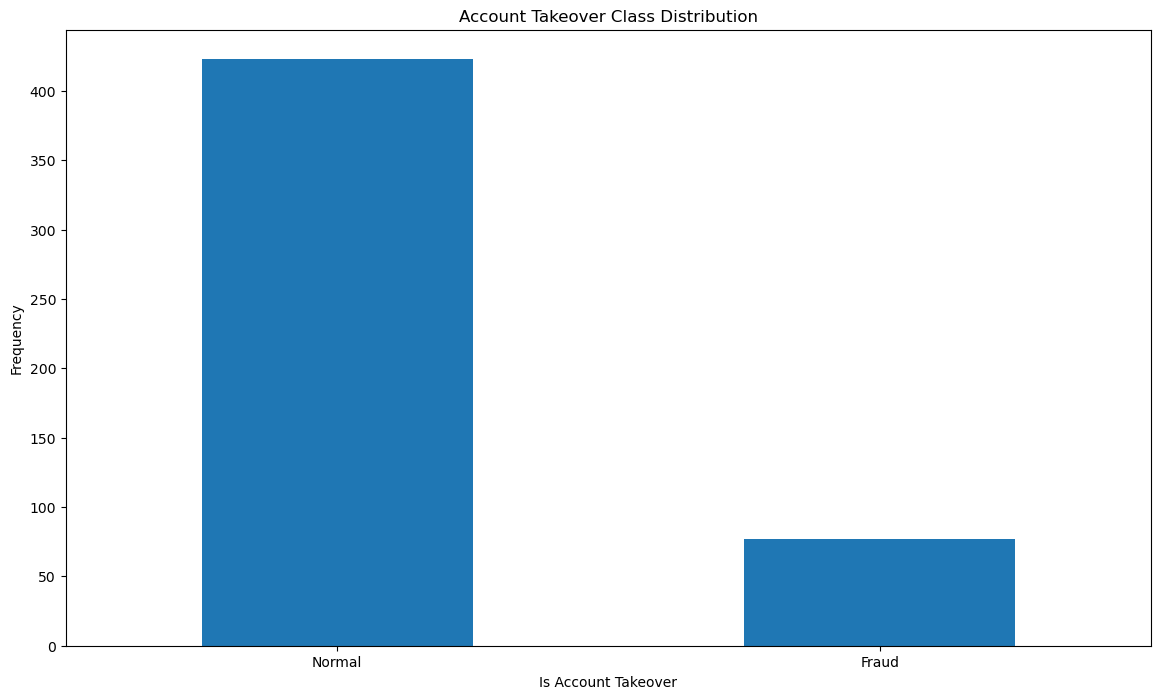

In [154]:
### iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding

In [155]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 942 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(936)
memory usage: 466.9 KB


User ID     ASN  Login Successful  Is Attack IP  \
0 -1861537202867857590   29695              True         False   
1  2373961011761384656    3280              True          True   
2 -4324475583306591935  393398             False         False   
3 -2877791067553018845  206801              True          True   
4 -5377627992963732557   38778              True         False   

   Is Account Takeover  Blacklisted  cntr_AR  cntr_AU  cntr_BD  cntr_BR  ...  \
0                False        False        0        0        0        0  ...   
1                 True        False        0        0        0        0  ...   
2                False         True        0        0        0        0  ...   
3                 True        False        0        0        0        0  ...   
4                False         True        0        0        0        0  ...   

   lgnt_2020-10-27 06:38:53.830  lgnt_2020-11-02 17:17:43.421  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2020-11-07 09:49:55.319  lgnt_2020-11-13 08:13:22.285  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2020-11-14 07:06:48.691  lgnt_2020-11-21 18:49:00.959  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   lgnt_2020-11-23 23:04:43.278  brw_C  brw_F  brw_O  
0                             0      1      0      0  
1                             0      1      0      0  
2                             0      0      0      1  
3                             0      1      0      0  
4                             0      1      0      0  

[5 rows x 942 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 941 entries, User ID to brw_O
dtypes: bool(3), int64(2), uint8(936)
memory usage: 466.4 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 99.39%
              precision    recall  f1-score   support

    

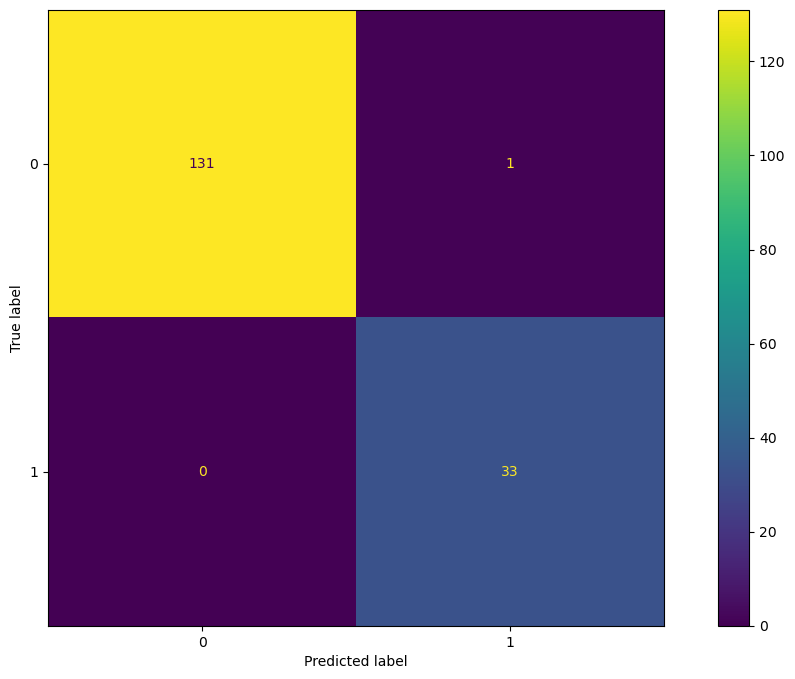

In [156]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:941]
Y = dataset.iloc[:,941]
X.info()

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 400
The number of records in the test dataset is 100
The training dataset has 339 records for the majority class and 61 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.16      1.00      0.28        16

    accuracy                           0.16       100
   macro avg       0.08      0.50      0.14       100
weighted avg       0.03      0.16      0.04       100

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.84      1.00      0.91        84
        True       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100

[[ 0 84]
 [ 0 16]]


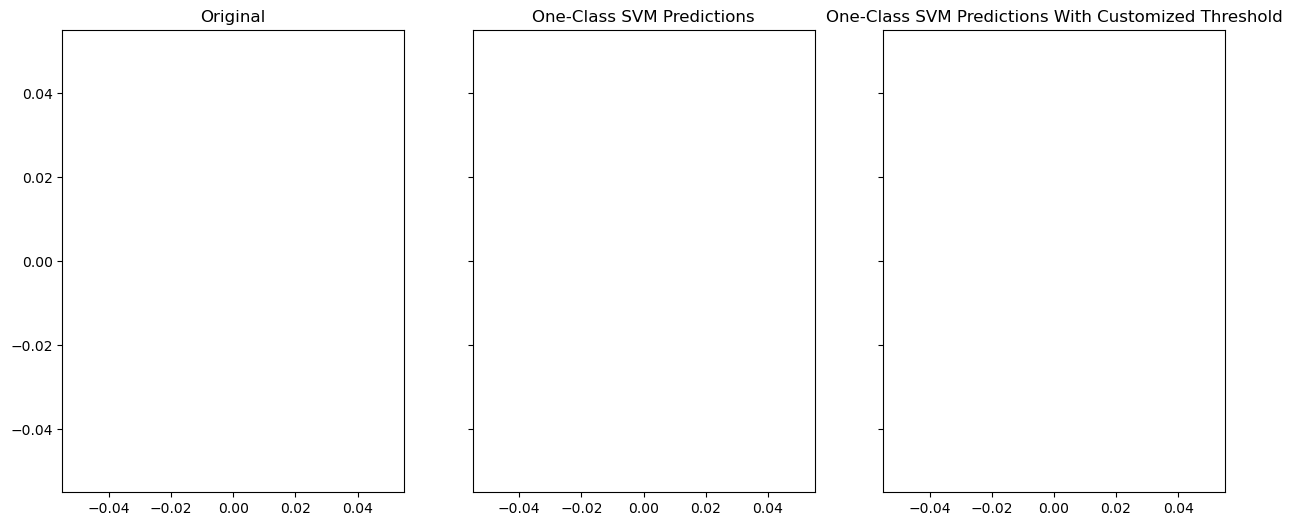

In [157]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:941]
Y = dataset.iloc[:,941]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 350
The number of records in the test dataset is 150
The training dataset has 291 records for the majority class and 59 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       132
        True       0.12      1.00      0.21        18

    accuracy                           0.12       150
   macro avg       0.06      0.50      0.11       150
weighted avg       0.01      0.12      0.03       150

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.88      1.00      0.94       132
        True       0.00      0.00      0.00        18

    accuracy                           0.88       150
   macro avg       0.44      0.50      0.47       150
weighted avg       0.77      0.88      0.82       150

[[  0 132]
 [  0  18]]


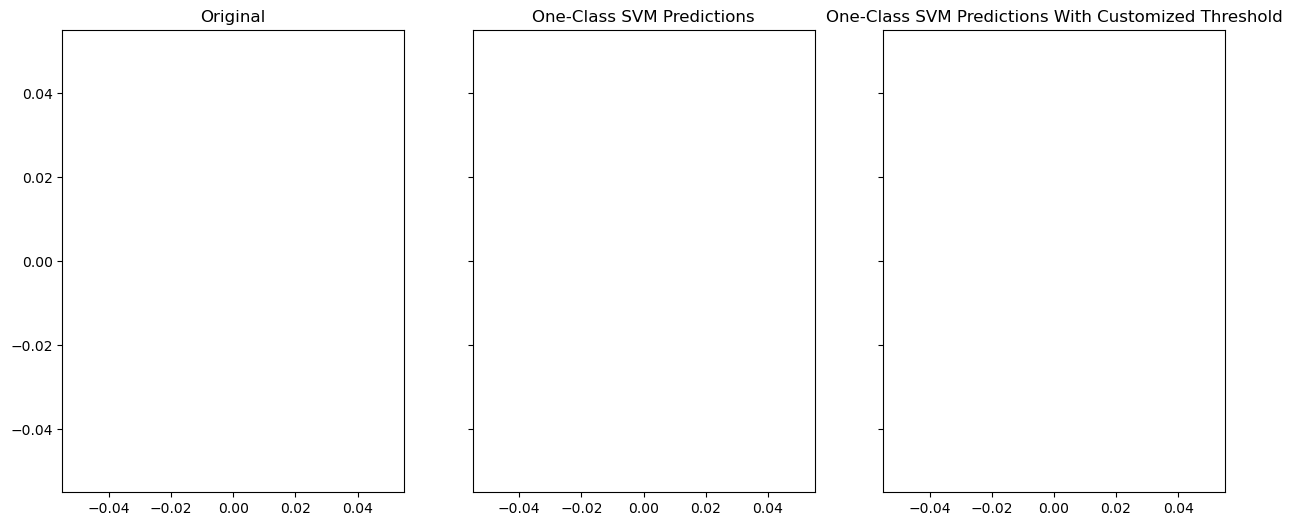

In [158]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:941]
Y = dataset.iloc[:,941]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

The number of records in the training dataset is 250
The number of records in the test dataset is 250
The training dataset has 206 records for the majority class and 44 records for the minority class.
              precision    recall  f1-score   support

       False       0.91      0.05      0.09       217
        True       0.13      0.97      0.24        33

    accuracy                           0.17       250
   macro avg       0.52      0.51      0.16       250
weighted avg       0.81      0.17      0.11       250

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.87      1.00      0.93       217
        True       0.00      0.00      0.00        33

    accuracy                           0.87       250
   macro avg       0.43      0.50      0.46       250
weighted avg       0.75      0.87      0.81       250

[[ 10 207]
 [  1  32]]


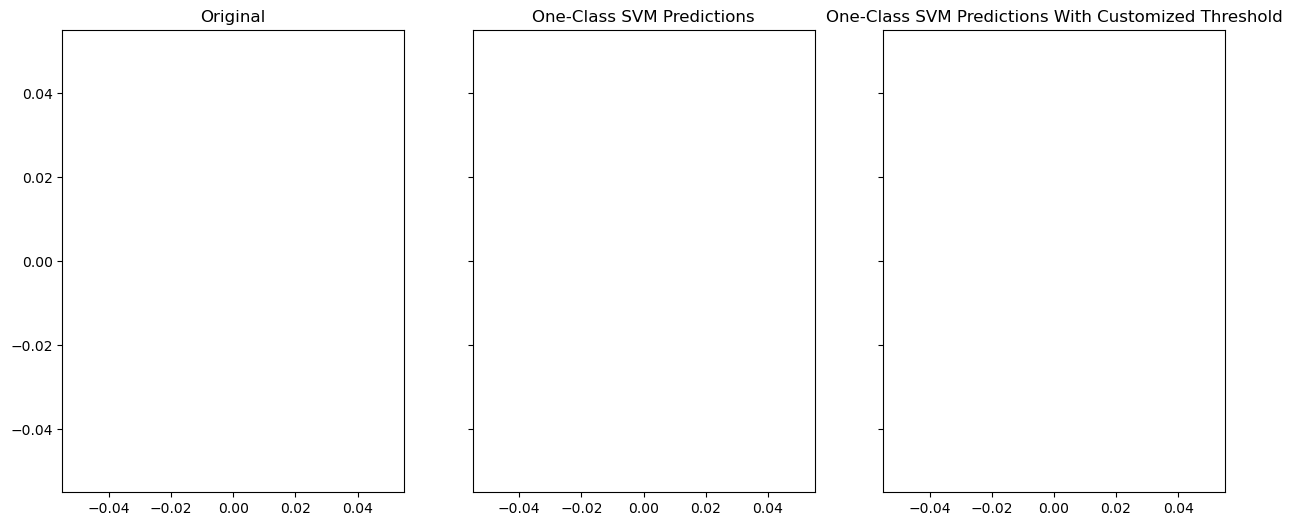

In [159]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:941]
Y = dataset.iloc[:,941]

# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 37
Number of non anomalous values  463
Total Number of Values: 500


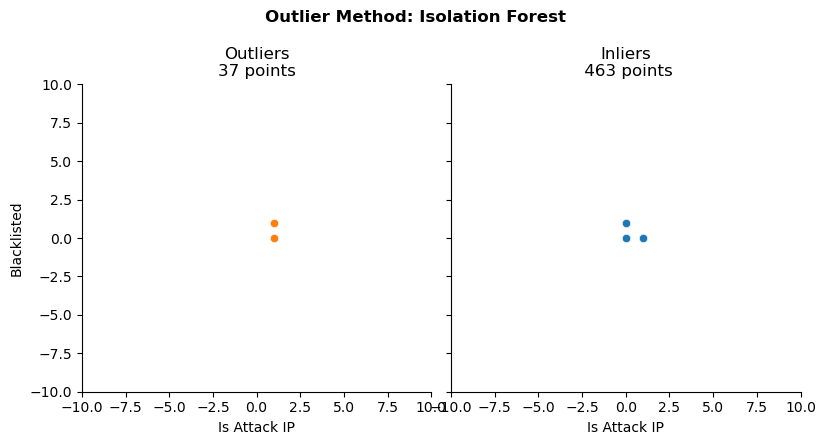

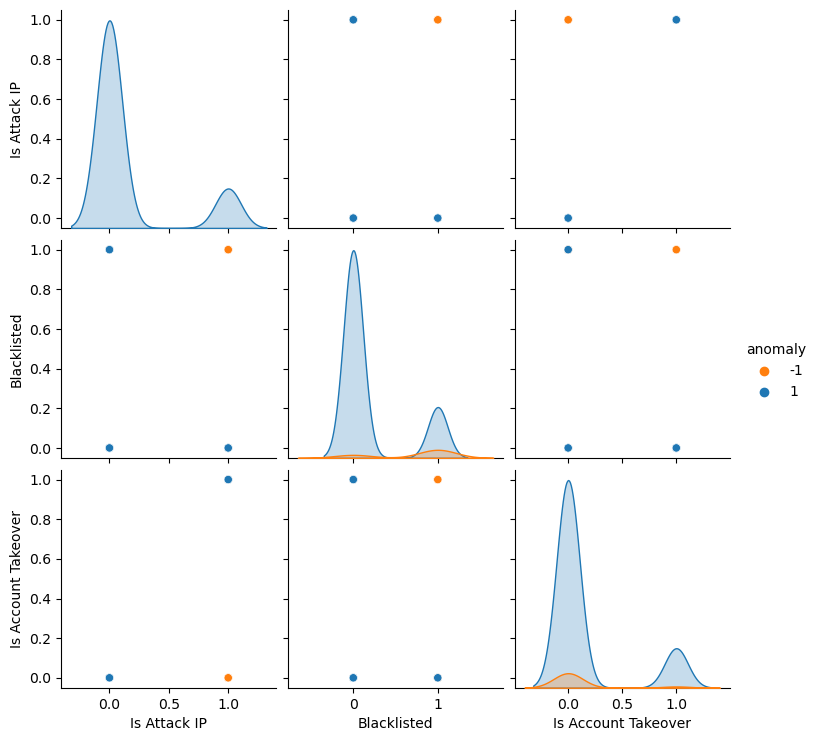

In [160]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


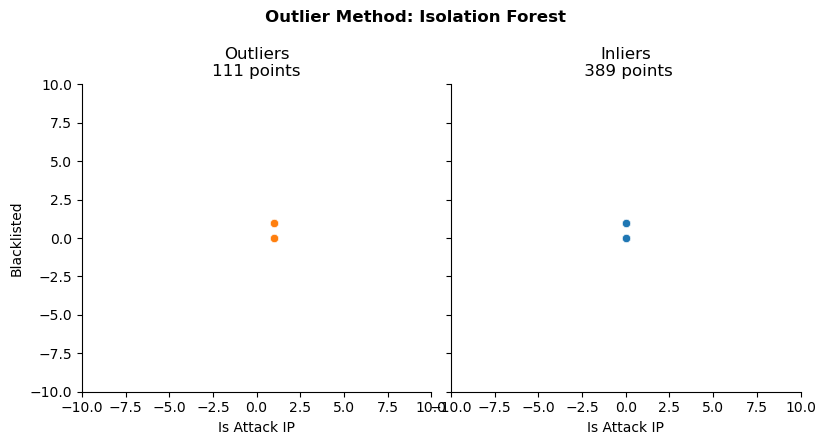

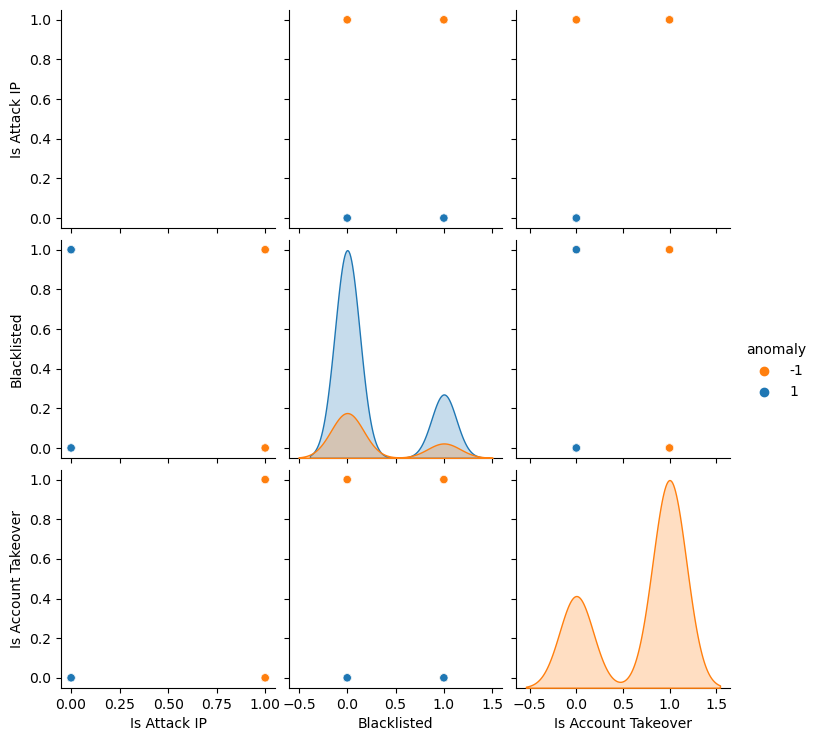

In [161]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 202
Number of non anomalous values  298
Total Number of Values: 500


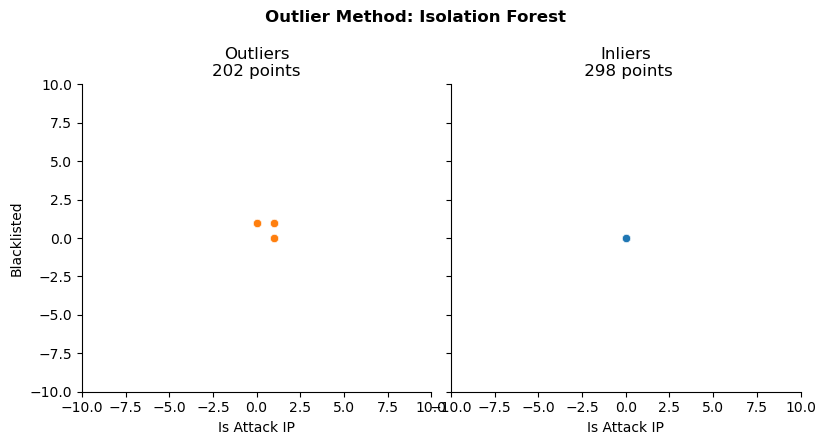

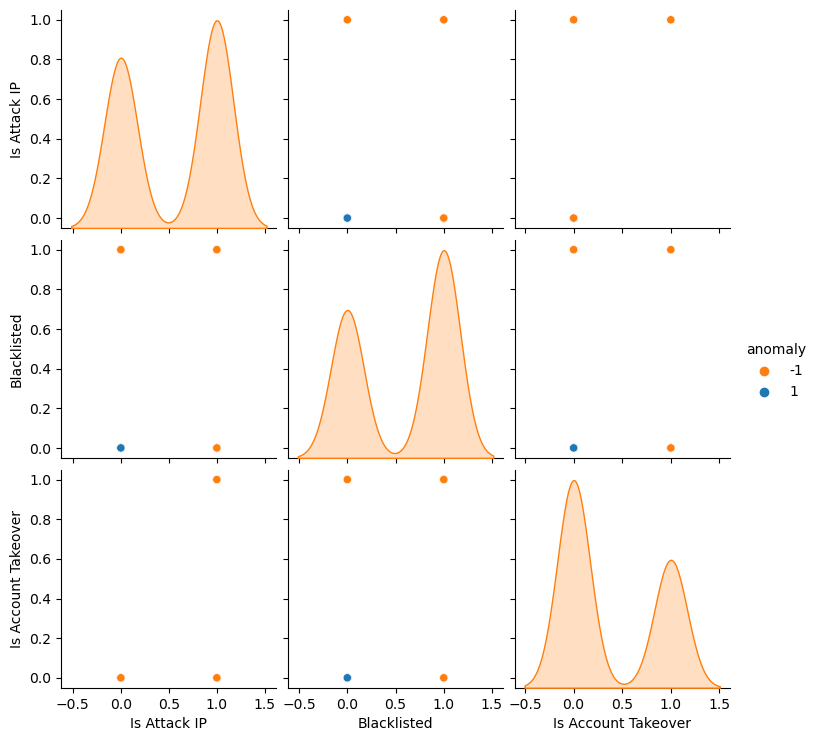

In [162]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 39
Number of non anomalous values  461
Total Number of Values: 500


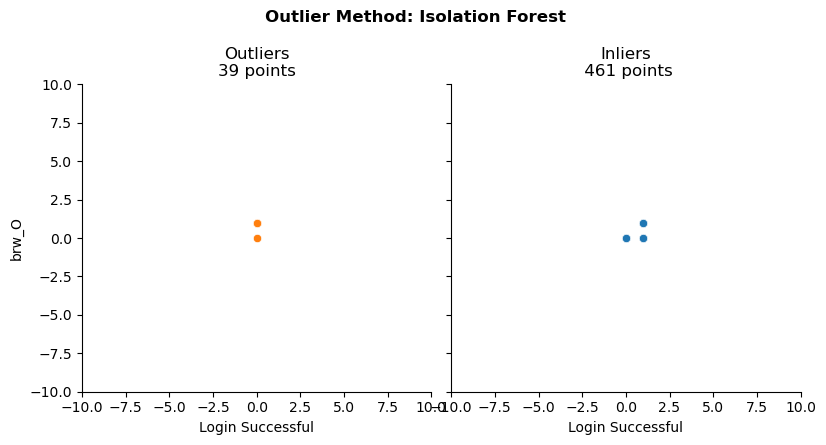

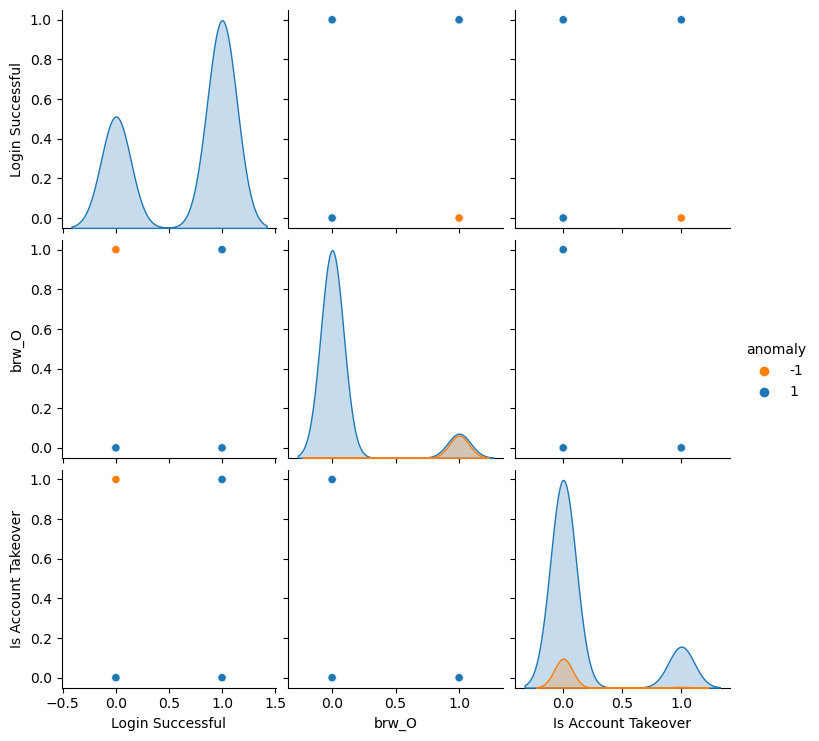

In [163]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'brw_O', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'brw_O','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 87
Number of non anomalous values  413
Total Number of Values: 500


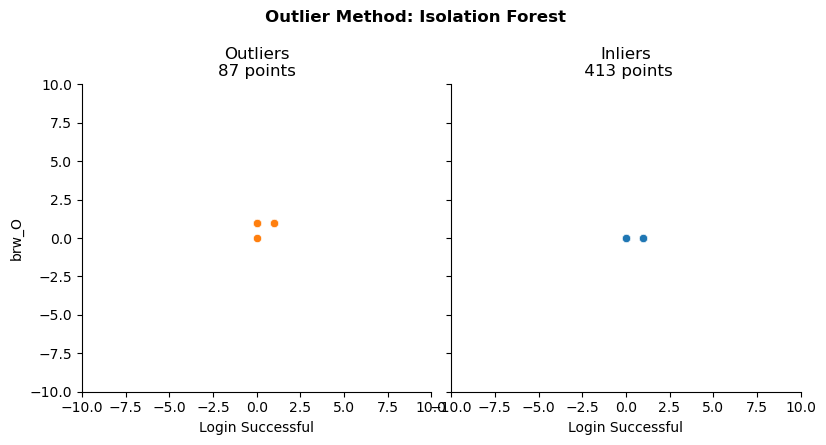

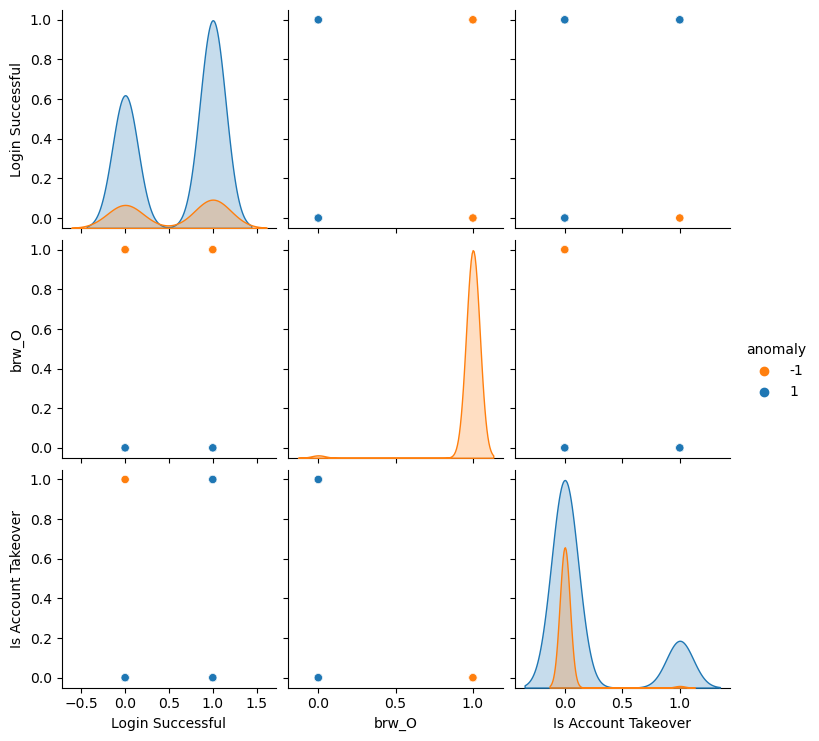

In [164]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 163
Number of non anomalous values  337
Total Number of Values: 500


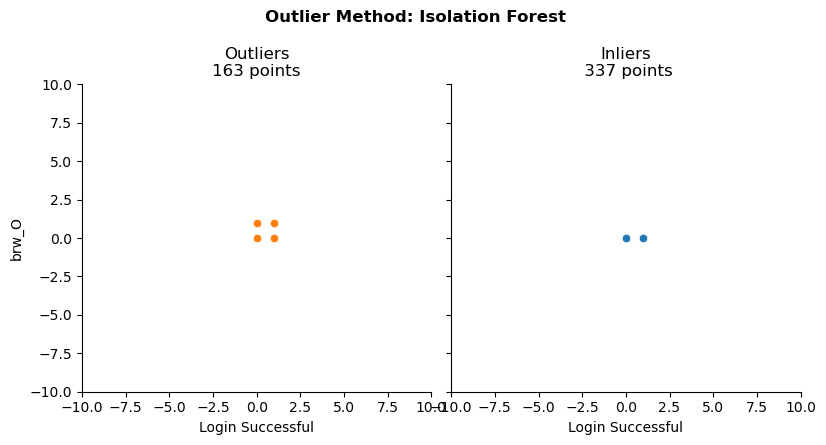

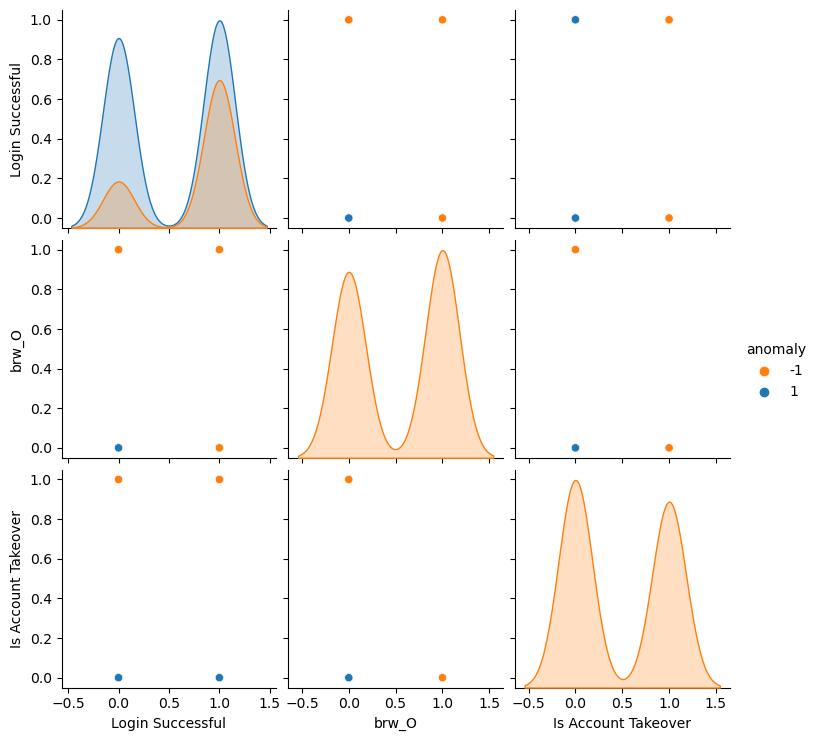

In [165]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'brw_O', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 35
Number of non anomalous values  465
Total Number of Values: 500


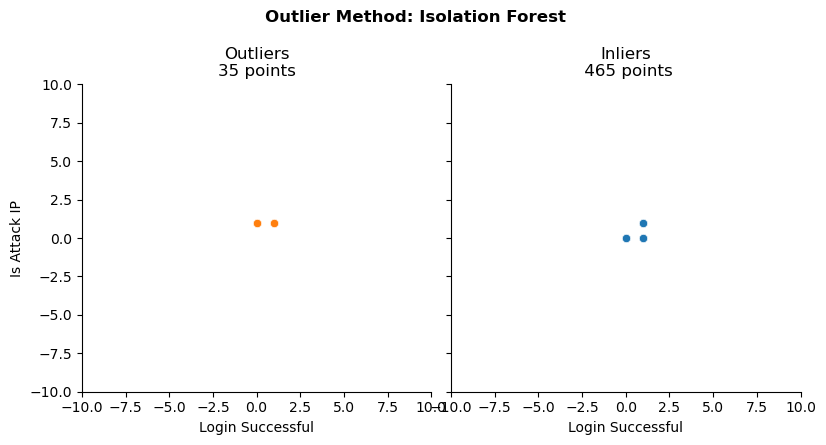

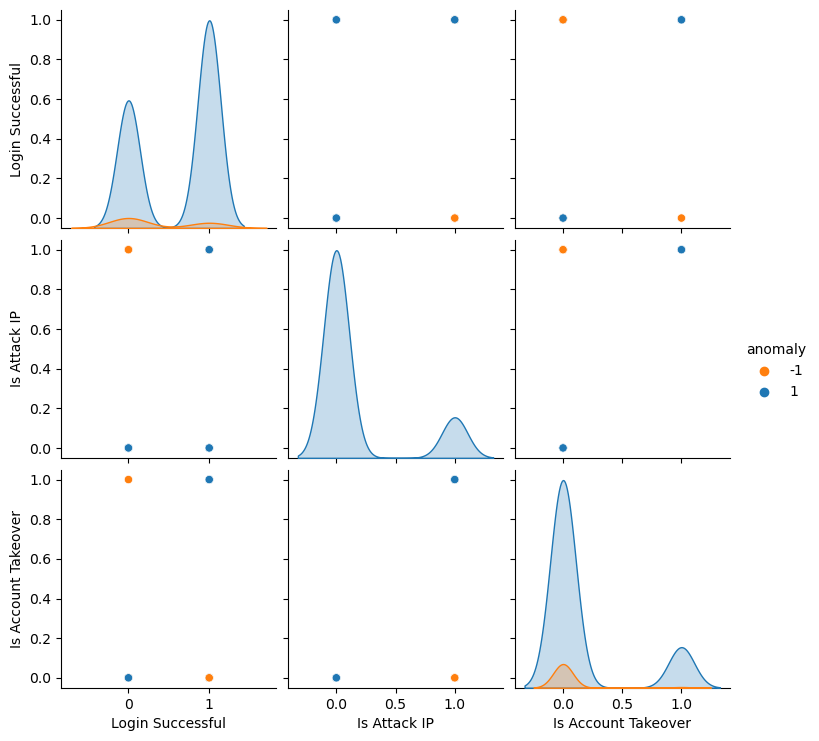

In [166]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


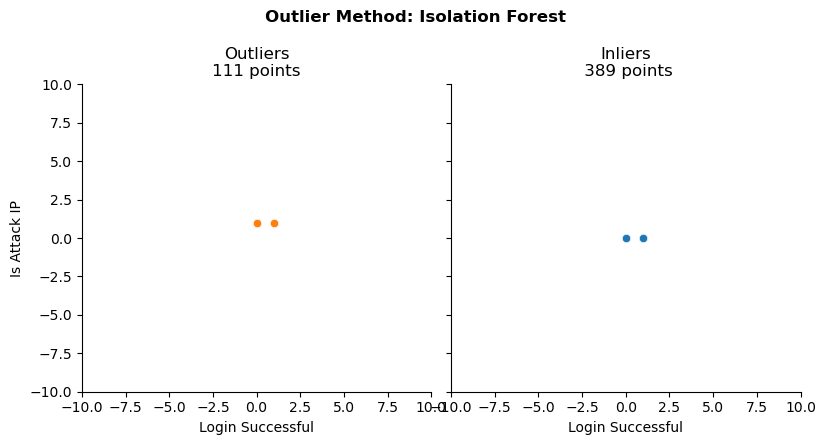

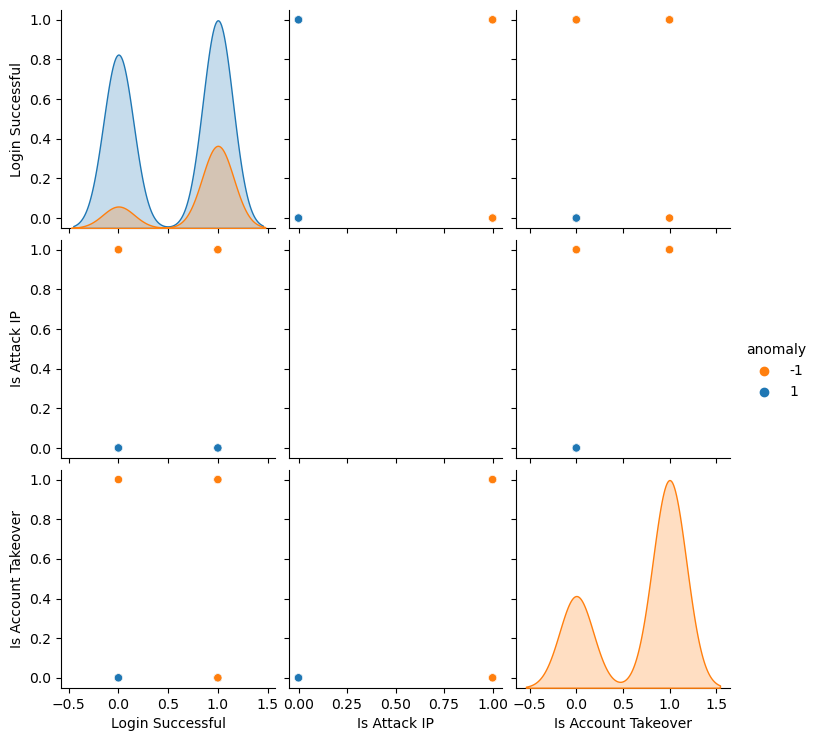

In [170]:
# Increasing contamination value to 0.3
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 111
Number of non anomalous values  389
Total Number of Values: 500


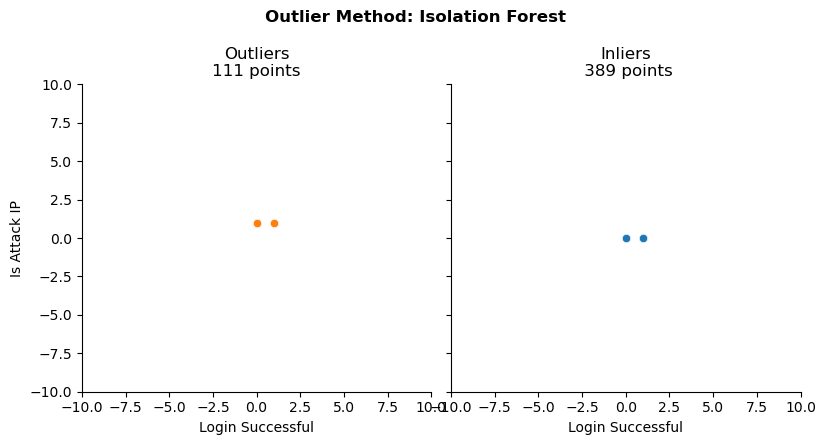

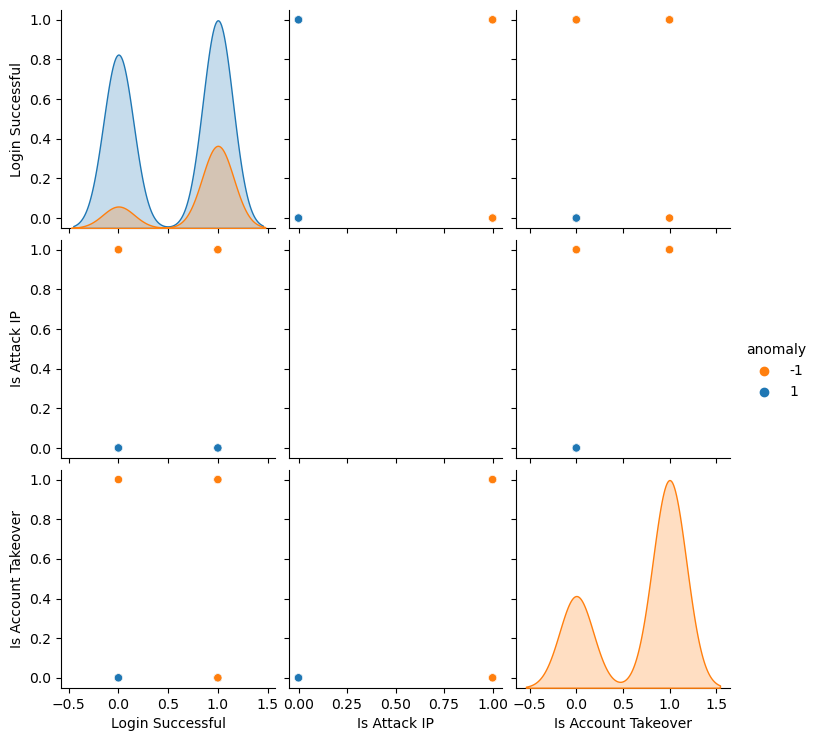

In [169]:
# Increasing contamination value to 0.5
model_IF = IsolationForest(contamination=float(0.5), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-10, 10], [-10, 10]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(77, 942) (423, 942)
(500, 941)
(500,)


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 107
Accuracy Score :
0.786
Classification Report :
              precision    recall  f1-score   support

       False       0.85      0.91      0.88       423
        True       0.20      0.13      0.16        77

    accuracy                           0.79       500
   macro avg       0.53      0.52      0.52       500
weighted avg       0.75      0.79      0.77       500

Local Outlier Factor: 111
Accuracy Score :
0.778
Classification Report :
              precision    recall  f1-score   support

       False       0.85      0.90      0.87       423
        True       0.16      0.10      0.13        77

    accuracy                           0.78       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.74      0.78      0.76       500

Support Vector Machine: 343
Accuracy Score :
0.314
Classification Report :
              precision    recall  f1-score   support

       False       0.79      0.26      0.39       423
        True       0

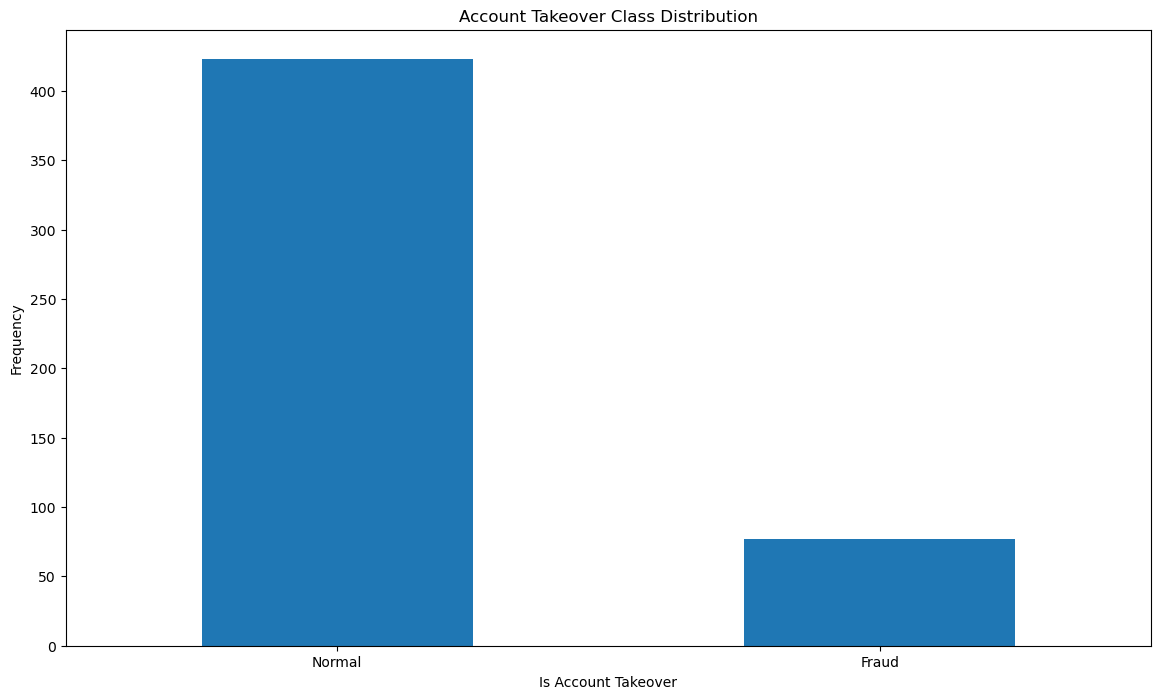

In [171]:
# iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Account Takeover Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))